## Pesquisa em Métodos Inferenciais com Bases de Compras na categoria Informática (TIC) no portal compras.gov

**Objetivo Geral**
Diagnosticar e modelar o comportamento dos contratos de TIC firmados pelos Ministérios Federais brasileiros (2020–2024) e a caracterização dos fornecedores, buscando realizar inferências e comparações com o cenário nacional a partir dos dados CETIC BR.

**Objetivos Específicos**
Realizar análise exploratória dos contratos e fornecedores;

Estimar características da população de fornecedores a partir da amostra;

Aplicar métodos inferenciais (intervalos de confiança, testes de hipóteses);

Realizar modelagem multivariada para entender preditores relevantes (Ex.: Logistic Regression, Random Forest);

Comparar nossos achados com as bases CETIC BR (Empresas e Governo).



### Análise Exploratória de Dados (AED) com bases tratadas compras.gov
1. arquivo 'contratos_ministerios_consolidados_separados.csv' - Base de contratos dos 25 ministérios do poder executivo federal obtidos no compras.gov.br e já consolidados e tratados (série histórica de 2020 a 2024);
2. arquivo 'fornecedores_formatado.csv' - Amostra de 150 fornecedores com dados enriquecidos pela base CNPJá

### 1. Importar Bibliotecas

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")


### 2. Carregar as Bases de Dados

In [155]:
# 2. Funções auxiliares para visualização elegante
def resumo_geral(df, nome_df):
    print(f"📄 {nome_df}: {df.shape[0]:,} linhas × {df.shape[1]:,} colunas")
    display(df.head(5).style.set_caption(f"Prévia de {nome_df}").set_table_styles(
        [{'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}]
    ))
    info = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes.values,
        'Missing (%)': df.isnull().mean().round(4) * 100
    })
    display(info.style.background_gradient(subset=['Missing (%)'], cmap='Reds'))

# 3. Carregar as bases

# 3.1 Contratos Ministério (Compras.Gov.br)
df_contratos = pd.read_csv('contratos_ministerios_consolidados_separados.csv', sep=',', encoding='utf-8')

# 3.2 Fornecedores Amostra (Base CNPJá)
df_fornecedores = pd.read_csv('fornecedores_formatado.csv', sep=',', encoding='utf-8')

# 3.3 CETIC BR - Governo
df_cetic_gov = pd.read_excel('Consolidado_tic_egov_orgaos_federais_e_estaduais.xlsx')

# 3.4 CETIC BR - Empresas
df_cetic_empresas = pd.read_excel('TIC Empresas consoolidado historico.xlsx')

# 4. Exibir resumos
resumo_geral(df_contratos, "Contratos - Ministérios (Compras.gov.br)")
resumo_geral(df_fornecedores, "Fornecedores Amostra (Base CNPJá)")
resumo_geral(df_cetic_gov, "CETIC BR - Governo")
resumo_geral(df_cetic_empresas, "CETIC BR - Empresas")


📄 Contratos - Ministérios (Compras.gov.br): 1,088 linhas × 12 colunas


📄 Fornecedores Amostra (Base CNPJá): 479 linhas × 14 colunas


📄 CETIC BR - Governo: 286 linhas × 143 colunas


📄 CETIC BR - Empresas: 795 linhas × 105 colunas


In [156]:
# 1. Importar bibliotecas
import pandas as pd
from IPython.display import display

# 2. Configurar Pandas para melhor visualização
pd.set_option('display.max_columns', None)   # Mostrar todas as colunas
pd.set_option('display.max_rows', 10)        # Limitar o número de linhas exibidas
pd.set_option('display.width', 1000)         # Largura da tela
pd.set_option('display.colheader_justify', 'center')  # Centralizar nomes das colunas

# 3. Carregar os dados com caminhos ajustados
df_contratos = pd.read_csv('contratos_ministerios_consolidados_separados.csv', sep=',', encoding='utf-8')
df_fornecedores = pd.read_csv('fornecedores_formatado.csv', sep=',', encoding='utf-8')

# 4. Exibir com melhor formatação
print("📄 Base de Contratos:")
display(df_contratos.head(10))  # Mostra os 10 primeiros

print("🏢 Base de Fornecedores:")
display(df_fornecedores.head(10))  # Mostra os 10 primeiros


📄 Base de Contratos:


Órgão                          Unidade Gestora       Número Contrato                     Fornecedor                     Vig. Início   Vig. Fim     Valor Global    Núm. Parcelas  Valor Parcela                       ministerio                             CNPJ                         Nome Fornecedor                  
0  22000 - MINISTERIO DA AGRICULTURA E PECUARIA       130025 - SFA/PE/MAPA    00003/2019    64.799.539/0001-35 - TECNOSET INFORMATICA PROD...  07/05/2019  06/05/2023      R$ 62.015,76       12            R$ 5.167,98  Consulta Contratos Contratos.gov.br Min Agricu...  64.799.539/0001-35      TECNOSET INFORMATICA PRODUTOS E SERVICOS LTDA
1  22000 - MINISTERIO DA AGRICULTURA E PECUARIA       130025 - SFA/PE/MAPA    00006/2023    07.759.174/0001-81 - SOLUCOES  SERVICOS DE LOC...  01/06/2023  31/05/2025     R$ 102.850,00       12            R$ 8.570,83  Consulta Contratos Contratos.gov.br Min Agricu...  07.759.174/0001-81  SOLUCOES  SERVICOS DE LOCACAO DE MAQUINAS E EQ...
2  22000 - MINISTERIO DA AGRICULTURA E PECUARIA       130067 - SFA/SP/MAPA    00006/2023    07.432.517/0001-07 - SIMPRESS COMERCIO LOCACAO...  01/04/2023  01/04/2027     R$ 720.238,67       48           R$ 15.004,97  Consulta Contratos Contratos.gov.br Min Agricu...  07.432.517/0001-07          SIMPRESS COMERCIO LOCACAO E SERVICOS LTDA
3  22000 - MINISTERIO DA AGRICULTURA E PECUARIA       130069 - SFA/MA/MAPA    00004/2022    08.951.049/0001-31 - CORESMA - COMERCIO DE EQU...  23/09/2022  22/09/2025      R$ 58.860,00       12            R$ 4.905,00  Consulta Contratos Contratos.gov.br Min Agricu...  08.951.049/0001-31  CORESMA - COMERCIO DE EQUIPAMENTOS E SUPRIMENT...
4  22000 - MINISTERIO DA AGRICULTURA E PECUARIA       130094 - SFA/PA/MAPA    00002/2023    03.117.534/0001-90 - BRADOK SOLUCOES CORPORATI...  21/11/2023  20/11/2027     R$ 129.484,80       12           R$ 10.790,40  Consulta Contratos Contratos.gov.br Min Agricu...  03.117.534/0001-90                  BRADOK SOLUCOES CORPORATIVAS LTDA
5  22000 - MINISTERIO DA AGRICULTURA E PECUARIA       130100 - SFA/AP/MAPA    00002/2022        34.941.930/0001-61 - DIGIMAQ INFORMATICA LTDA  04/08/2022  04/08/2025      R$ 36.739,20       12            R$ 3.061,60  Consulta Contratos Contratos.gov.br Min Agricu...  34.941.930/0001-61                           DIGIMAQ INFORMATICA LTDA
6  22000 - MINISTERIO DA AGRICULTURA E PECUARIA  130005 - CGOEF/DA/SE/MAPA    00030/2025    52.997.838/0001-03 - 52.997.838 IDES DE MORAIS...  05/05/2025  05/05/2026      R$ 17.853,00        1           R$ 17.853,00  Consulta Contratos Contratos.gov.br Min Agricu...  52.997.838/0001-03                52.997.838 IDES DE MORAIS FERNANDES
7  22000 - MINISTERIO DA AGRICULTURA E PECUARIA  130005 - CGOEF/DA/SE/MAPA    00009/2023    15.330.687/0001-09 - ATOM TECNOLOGIA EM INFORM...  01/07/2023  01/07/2026     R$ 256.611,00        1          R$ 256.611,00  Consulta Contratos Contratos.gov.br Min Agricu...  15.330.687/0001-09                 ATOM TECNOLOGIA EM INFORMACAO LTDA
8  22000 - MINISTERIO DA AGRICULTURA E PECUARIA  130005 - CGOEF/DA/SE/MAPA    00003/2024    59.456.277/0003-38 - ORACLE DO BRASIL SISTEMAS...  24/01/2024  24/01/2026   R$ 5.842.032,72        1        R$ 5.842.032,72  Consulta Contratos Contratos.gov.br Min Agricu...  59.456.277/0003-38                     ORACLE DO BRASIL SISTEMAS LTDA
9  22000 - MINISTERIO DA AGRICULTURA E PECUARIA  130005 - CGOEF/DA/SE/MAPA    00003/2023                      40.432.544/0001-47 - CLARO S.A.  27/02/2023  27/08/2025  R$ 12.032.104,50       30          R$ 401.070,15  Consulta Contratos Contratos.gov.br Min Agricu...  40.432.544/0001-47                                         CLARO S.A.

🏢 Base de Fornecedores:


CNPJ                        Razão Social                    Nome Fantasia       Natureza Jurídica         Capital Social Data de Abertura  Idade da Empresa   Cidade  Estado      CEP     Porte                 Atividade Principal                  Flag_CNEP  Flag_CEIS
0  113110000160                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
1  258246000168                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
2  306524000377  LEISTUNG COMERCIO E SERVICOS DE SISTEMAS DE EN...    Leistung    Sociedade Empresária Limitada     1230000.0      2013-01-29           12.0        Brasília    DF   70330520.0  Demais  Comércio atacadista de outras máquinas e equip...      0          0    
3  308141000176                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
4  308141000923                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
5  330845000145                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
6  336701000104                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
7  394528000192                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
8  545482000165                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0    
9  665620000140                                                NaN         NaN                              NaN           NaN             NaN            NaN             NaN   NaN          NaN     NaN                                                NaN      0          0

### No entanto, consultando o arquivo .csv "'contratos_ministerios_consolidados_separados.csv'" identificamos que:
- 5 contratos tinha início e fim de vigência anterior a 2020 e;
- 75 contratos tinha início de vigência em 2025.
  
Ambas as situações colocam esses contratos fora do intervalo temporal que buscamos analisar (2020 a 2025). Por isso, devemos excluir essas linhas (contratos) da nossa base. 

# 🚀 Etapa 1: Pré-Processamento e Limpeza Inicial
🎯 Objetivo:
Ajustar as datas dos contratos.

Garantir que os valores monetários (Valor Global) estejam como float.

Filtrar apenas o período de 2020 a 2024.

Remover ou lidar com valores faltantes.

Criar variáveis auxiliares como Ano, Mês, UF, Idade Empresa, etc.

📜 Script de Pré-Processamento Inicial
python
Copy
Edit


### Pré-Tratamento: Colunas Financeiras e Datas

In [69]:
import pandas as pd
import numpy as np

# 1. Carregar a base original
df_contratos = pd.read_csv('contratos_ministerios_consolidados_separados.csv', sep=',', encoding='utf-8')

# 2. Função universal de conversão segura
def limpar_valores(valor):
    if pd.isna(valor):
        return np.nan
    if isinstance(valor, str):
        # Remove R$, pontos de milhar e troca vírgula decimal
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.').strip()
    try:
        return float(valor)
    except ValueError:
        return np.nan

# 3. Aplicar a função apenas nas colunas financeiras
df_contratos['Valor Global'] = df_contratos['Valor Global'].apply(limpar_valores)
df_contratos['Valor Parcela'] = df_contratos['Valor Parcela'].apply(limpar_valores)

# 4. Converter datas
df_contratos['Vig. Início'] = pd.to_datetime(df_contratos['Vig. Início'], errors='coerce', dayfirst=True)
df_contratos['Vig. Fim'] = pd.to_datetime(df_contratos['Vig. Fim'], errors='coerce', dayfirst=True)

# 5. Criar colunas auxiliares
df_contratos['Ano Início'] = df_contratos['Vig. Início'].dt.year
df_contratos['Ano-Mês'] = df_contratos['Vig. Início'].dt.to_period('M').astype(str)

# 6. Visualização prévia
print(df_contratos.dtypes)
print(df_contratos[['Valor Global', 'Valor Parcela']].head())


Órgão                      object
Unidade Gestora            object
Número Contrato            object
Fornecedor                 object
Vig. Início        datetime64[ns]
                        ...      
ministerio                 object
CNPJ                       object
Nome Fornecedor            object
Ano Início                  int32
Ano-Mês                    object
Length: 14, dtype: object
   Valor Global  Valor Parcela
0     62015.76      5167.98   
1    102850.00      8570.83   
2    720238.67     15004.97   
3     58860.00      4905.00   
4    129484.80     10790.40   


### Total de contratos válidos (2020–2024).

Total de fornecedores distintos (CNPJs únicos nos contratos).

Validação se todos os 150 CNPJs da amostra CNPJá estão nos contratos filtrados.

#### O resultado aponta que 7 fornecedores da nossa amostra da base CNPJá foram excluídos devido a estarem em contratos fora do nosso intervalo de datas alvo.
Trabalharemos com uma amostra de 143 fornecedores para nossas inferências.

#### ✅ Base de contratos válidos (2020–2024) com 1008 contratos!

✅ 449 fornecedores distintos envolvidos nesses contratos!

✅ 143 dos 150 fornecedores da nossa amostra estão na base final (o que é ótimo para métodos inferenciais)!

⚠️ Apenas 7 fornecedores da amostra fora — o que é natural em amostragens reais!

Próximos passos:

1. Diagnóstico de Qualidade e Estatística Descritiva Final 🧹📊

    Explorar as variáveis financeiras (Valor Global, Valor Parcela) e categóricas.

    Confirmar ausência de problemas graves de missing.

2. Análise Exploratória de Dados (EDA) 🔎📈

    Distribuições, médias, outliers, gráficos.

    Gráficos focando:

        Volume de contratos por ministério e por fornecedor.

        Evolução anual.

        Distribuição de valores.

3. Formulação e Teste das Hipóteses (Inferência Estatística) 🧠📐

    Testes de hipóteses como:

        Diferença de médias (t-test).

        Teste de associação (Qui-Quadrado, ANOVA).

    Correlação entre variáveis (Spearman, Pearson).

4. Modelagem Multivariada (Se necessário) 📊🤖

    Regressão linear/múltipla.

    Modelos de classificação ou clusterização (caso avance para machine learning).

5. Comparação com Bases Externas (CETIC BR) 📚

    Validar tendências do mercado de TIC vs. dados da administração pública.

6. Relatório/Artigo Científico 📝

    Conexão com a teoria de métodos inferenciais.

    Apresentação dos achados e interpretações.



### Adicionando as colunas "Flag_CNEP" e "Flag_CEIS" à nossa base de 1008 contratos do compras.gov
Criando o novo arquivo 'contratos_1008_com_flags.csv' com esse merge

In [81]:
# 📚 Importar bibliotecas
import pandas as pd

# 🚀 1. Carregar as bases
df_contratos = pd.read_csv('contratos_ministerios_consolidados_separados.csv', sep=',', encoding='utf-8')
df_fornecedores_flags = pd.read_csv('fornecedores_formatado.csv', sep=',', encoding='utf-8')

# 🚀 2. Padronizar CNPJs
def padronizar_cnpj(cnpj):
    return ''.join(filter(str.isdigit, str(cnpj))).zfill(14)

df_contratos['CNPJ'] = df_contratos['CNPJ'].apply(padronizar_cnpj)
df_fornecedores_flags['CNPJ'] = df_fornecedores_flags['CNPJ'].astype(str).str.zfill(14)

# 🚀 3. Tratar datas
df_contratos['Vig. Início'] = pd.to_datetime(df_contratos['Vig. Início'], errors='coerce', dayfirst=True)
df_contratos['Vig. Fim'] = pd.to_datetime(df_contratos['Vig. Fim'], errors='coerce', dayfirst=True)

# 🚀 4. Filtro de Janela Temporal: 2020–2024
df_contratos_filtrado = df_contratos[
    (df_contratos['Vig. Início'].dt.year <= 2024) & (df_contratos['Vig. Fim'].dt.year >= 2020)
].copy()

# 🚀 5. Selecionar apenas as colunas necessárias
df_flags = df_fornecedores_flags[['CNPJ', 'Flag_CNEP', 'Flag_CEIS']].drop_duplicates()

# 🚀 6. Realizar o merge
df_contratos_com_flags = df_contratos_filtrado.merge(df_flags, on='CNPJ', how='left')

# 🚀 7. Preencher NaN das flags com 0
df_contratos_com_flags['Flag_CNEP'] = df_contratos_com_flags['Flag_CNEP'].fillna(0).astype(int)
df_contratos_com_flags['Flag_CEIS'] = df_contratos_com_flags['Flag_CEIS'].fillna(0).astype(int)

# 🚀 8. Salvar o novo arquivo CSV
df_contratos_com_flags.to_csv('contratos_1008_com_flags.csv', index=False, encoding='utf-8')

# ✅ 9. Confirmação
print(f"✅ Arquivo final gerado com {df_contratos_com_flags.shape[0]} contratos.")
print(df_contratos_com_flags[['CNPJ', 'Flag_CNEP', 'Flag_CEIS']].head())



✅ Arquivo final gerado com 1008 contratos.
        CNPJ       Flag_CNEP  Flag_CEIS
0  64799539000135      0          0    
1  07759174000181      0          1    
2  07432517000107      0          0    
3  08951049000131      0          0    
4  03117534000190      0          0    


### 🧹📊 1. Diagnóstico de Qualidade e Estatística Descritiva Final

In [83]:
# 📚 Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o arquivo final consolidado
df = pd.read_csv('contratos_1008_com_flags.csv', encoding='utf-8')

# 2. Diagnóstico de Qualidade 🧹
missing_info = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo de Dado': df.dtypes.values,
    'Qtd Missing': df.isnull().sum().values,
    '% Missing': (df.isnull().mean().round(4) * 100).values
})

# 3. Exibir Diagnóstico
print("📊 Diagnóstico de Qualidade dos Dados")
display(missing_info.style.background_gradient(subset=['% Missing'], cmap='Reds'))

# 4. Estatística Descritiva 📈
# Separando variáveis numéricas
desc_num = df.describe().transpose()

# Exibir estatística descritiva
print("📈 Estatísticas Descritivas - Variáveis Numéricas")
display(desc_num.style.background_gradient(cmap='Blues'))

# 5. Estatísticas de Categóricas 🏷️
print("🏷️ Distribuição de Variáveis Categóricas")
for col in ['Órgão', 'Fornecedor', 'ministerio', 'Flag_CNEP', 'Flag_CEIS']:
    print(f"\n📌 {col}")
    print(df[col].value_counts(dropna=False))


📊 Diagnóstico de Qualidade dos Dados


📈 Estatísticas Descritivas - Variáveis Numéricas


🏷️ Distribuição de Variáveis Categóricas

📌 Órgão
Órgão
24000 - MINISTERIO DA CIENCIA, TECNOLOGIA E INOVAC    228
36000 - MINISTERIO DA SAUDE                           152
25000 - MINISTERIO DA FAZENDA                         116
26000 - MINISTERIO DA EDUCACAO                         62
52000 - MINISTERIO DA DEFESA                           54
                                                     ... 
47000 - MINISTERIO DO PLANEJAMENTO E ORCAMENTO          8
58000 - MINISTERIO DA PESCA E AQUICULTURA               4
54000 - MINISTERIO DO TURISMO                           2
51000 - MINISTERIO DO ESPORTE                           1
49000 - MINISTERIO DESENV.AGRARIO E AGRIC FAMILIAR      1
Name: count, Length: 23, dtype: int64

📌 Fornecedor
Fornecedor
04.198.254/0001-17 - MCR SISTEMAS E CONSULTORIA LTDA                                         43
33.683.111/0001-07 - SERVICO FEDERAL DE PROCESSAMENTO DE DADOS (SERPRO)                      32
57.142.978/0001-05 - BRASOFTWARE INFORMATICA LTDA  

# 🔎📈 2. Análise Exploratória de Dados (EDA)

### 📊 Histograma do valor dos contratos (com escala log).

📈 Evolução do número de contratos por ano.

💰 Volume financeiro total por ano.

🏛️ Top 15 Ministérios por número de contratos.

🏢 Top 15 Fornecedores por volume financeiro de contratos.

### 
| Etapa                                              | Base recomendada                                                    |
| -------------------------------------------------- | ------------------------------------------------------------------- |
| EDA (Distribuições, Boxplots, Outliers, Médias)    | ✅ Base completa **e** amostra                                       |
| Testes de Hipóteses                                | ✅ Apenas **amostra**                                                |
| Modelos Estatísticos (Regressão, ANOVA, etc.)      | ✅ Apenas **amostra**                                                |
| Validação com bases externas (CETIC.BR, ABES etc.) | ✅ Apenas **amostra**, se possível comparar com indicadores externos |



In [107]:
# 📦 Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🚀 1. Carregar os dados
df_contratos = pd.read_csv('contratos_1008_com_flags.csv', sep=',', encoding='utf-8')
df_amostra = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';', encoding='utf-8')

# 🧹 2. Padronizar CNPJs
def padronizar_cnpj(cnpj):
    return ''.join(filter(str.isdigit, str(cnpj))).zfill(14)

df_contratos['CNPJ_clean'] = df_contratos['CNPJ'].astype(str).apply(padronizar_cnpj)
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).apply(padronizar_cnpj)

# 🎯 3. Filtrar contratos da amostra
df_amostra_contratos = df_contratos[df_contratos['CNPJ_clean'].isin(df_amostra['CNPJ_clean'])].copy()

# 💰 4. Converter valores monetários com segurança
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return 0.0

df_contratos['Valor Global'] = df_contratos['Valor Global'].apply(converter_valor)
df_amostra_contratos['Valor Global'] = df_amostra_contratos['Valor Global'].apply(converter_valor)

# 📊 5. Agrupar e gerar top 15

# Ministérios (todos os contratos)
top_orgaos_qtd = df_contratos['Órgão'].value_counts().head(15)
top_orgaos_valor = df_contratos.groupby('Órgão')['Valor Global'].sum().nlargest(15)

# Fornecedores (todos os contratos)
top_fornecedores_qtd = df_contratos['Nome Fornecedor'].value_counts().head(15)
top_fornecedores_valor = df_contratos.groupby('Nome Fornecedor')['Valor Global'].sum().nlargest(15)

# Fornecedores (amostra)
top_amostra_fornecedores_qtd = df_amostra_contratos['Nome Fornecedor'].value_counts().head(15)
top_amostra_fornecedores_valor = df_amostra_contratos.groupby('Nome Fornecedor')['Valor Global'].sum().nlargest(15)

# 📤 6. Exibir resultados
print("\n🔝 Top 15 Ministérios por Quantidade de Contratos:")
print(top_orgaos_qtd)

print("\n💸 Top 15 Ministérios por Valor Total (R$):")
print(top_orgaos_valor)

print("\n🔝 Top 15 Fornecedores por Quantidade de Contratos:")
print(top_fornecedores_qtd)

print("\n💸 Top 15 Fornecedores por Valor Total (R$):")
print(top_fornecedores_valor)

print("\n🔝 Top 15 Fornecedores da Amostra por Quantidade de Contratos:")
print(top_amostra_fornecedores_qtd)

print("\n💸 Top 15 Fornecedores da Amostra por Valor Total (R$):")
print(top_amostra_fornecedores_valor)



🔝 Top 15 Ministérios por Quantidade de Contratos:
Órgão
24000 - MINISTERIO DA CIENCIA, TECNOLOGIA E INOVAC    228
36000 - MINISTERIO DA SAUDE                           152
25000 - MINISTERIO DA FAZENDA                         116
26000 - MINISTERIO DA EDUCACAO                         62
52000 - MINISTERIO DA DEFESA                           54
                                                     ... 
81000 - MINISTERIO DOS DIREITOS HUMANOS E CIDADANI     33
55000 - MIN.DESENV.E ASSIT.SOCIAL,FAM.E COMBATE FO     27
42000 - MINISTERIO DA CULTURA                          24
53000 - MINIST. DA INTEGR. E DO DESENVOLV. REGIONA     21
44000 - MINIST. DO MEIO AMBIENTE E MUDANCA DO CLIM     17
Name: count, Length: 15, dtype: int64

💸 Top 15 Ministérios por Valor Total (R$):
Órgão
41000 - MINISTERIO DAS COMUNICACOES                   3.214012e+09
25000 - MINISTERIO DA FAZENDA                         2.331131e+09
40000 - MINISTERIO DO TRABALHO E EMPREGO              1.103023e+09
36000 - MINISTER

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Carregar as bases
df_contratos = pd.read_csv("contratos_1008_com_flags.csv", sep=',', encoding='utf-8')
df_amostra = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=';', encoding='utf-8')

# Padronizar CNPJs para realizar o merge
def padronizar_cnpj(cnpj):
    return ''.join(filter(str.isdigit, str(cnpj))).zfill(14)

df_contratos['CNPJ_clean'] = df_contratos['CNPJ'].astype(str).apply(padronizar_cnpj)
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).apply(padronizar_cnpj)

# Filtrar contratos da amostra
df_amostra_contratos = df_contratos[df_contratos['CNPJ_clean'].isin(df_amostra['CNPJ_clean'])].copy()

print(f"✅ Número de contratos da amostra encontrados: {df_amostra_contratos.shape[0]}")
print(f"✅ Fornecedores únicos da amostra encontrados: {df_amostra_contratos['CNPJ_clean'].nunique()}")


✅ Número de contratos da amostra encontrados: 248
✅ Fornecedores únicos da amostra encontrados: 143


### Evolução anual da quantidade de contratos e valores contratados

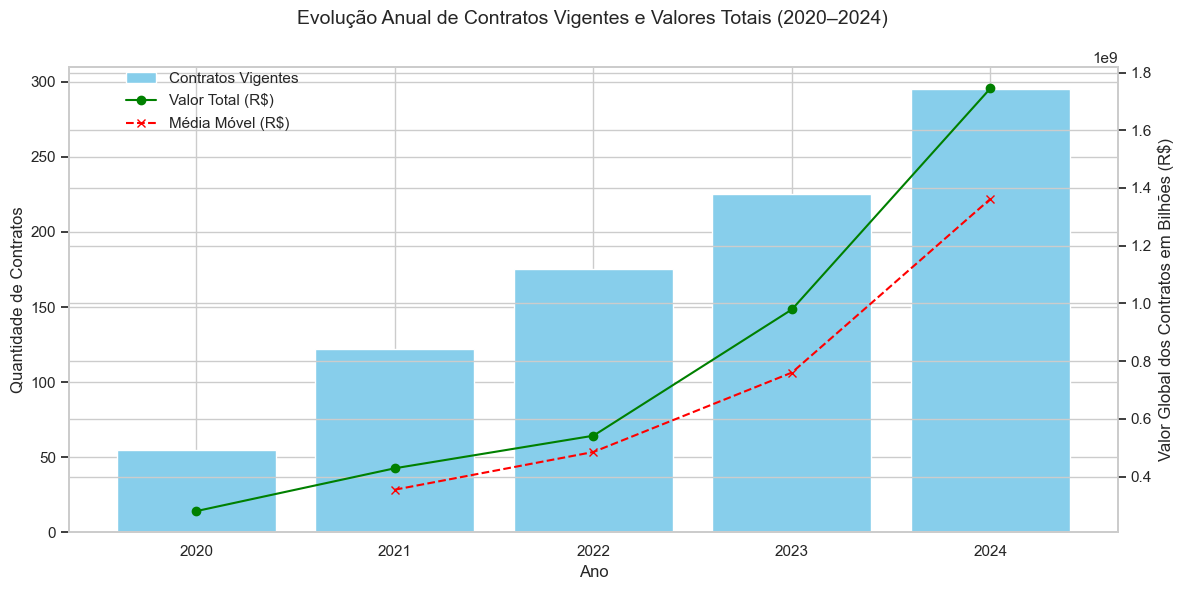

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Carregue o dataframe final
df = pd.read_csv("contratos_1008_com_flags.csv", encoding='utf-8')

# ✅ Converta datas corretamente
df['Vig. Início'] = pd.to_datetime(df['Vig. Início'], errors='coerce', dayfirst=True)
df['Vig. Fim'] = pd.to_datetime(df['Vig. Fim'], errors='coerce', dayfirst=True)

# ✅ Tratar valores monetários
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return 0.0

df['Valor Global'] = df['Valor Global'].apply(converter_valor)

# ✅ Criar DataFrame de evolução anual dos contratos vigentes
anos_analise = range(2020, 2025)
dados = []

for ano in anos_analise:
    contratos_ativos = df[
        (df['Vig. Início'].dt.year <= ano) & 
        (df['Vig. Fim'].dt.year >= ano)
    ]
    total_contratos = contratos_ativos.shape[0]
    total_valor = contratos_ativos['Valor Global'].sum()
    dados.append({
        'Ano': ano,
        'Contratos Vigentes': total_contratos,
        'Valor Total (R$)': total_valor
    })

df_evolucao = pd.DataFrame(dados)
df_evolucao['Média Móvel Valor (R$)'] = df_evolucao['Valor Total (R$)'].rolling(window=2).mean()

# ✅ Plotar gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras – Contratos vigentes
ax1.bar(df_evolucao['Ano'], df_evolucao['Contratos Vigentes'], color='skyblue', label='Contratos Vigentes')
ax1.set_ylabel('Quantidade de Contratos', fontsize=12)
ax1.set_xlabel('Ano', fontsize=12)
ax1.tick_params(axis='y')

# Segundo eixo Y para valores
ax2 = ax1.twinx()
ax2.plot(df_evolucao['Ano'], df_evolucao['Valor Total (R$)'], color='green', marker='o', label='Valor Total (R$)')
ax2.plot(df_evolucao['Ano'], df_evolucao['Média Móvel Valor (R$)'], color='red', linestyle='--', marker='x', label='Média Móvel (R$)')
ax2.set_ylabel('Valor Global dos Contratos em Bilhões (R$)', fontsize=12)
ax2.tick_params(axis='y')

# Legendas e título
fig.suptitle('Evolução Anual de Contratos Vigentes e Valores Totais (2020–2024)', fontsize=14)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.tight_layout()
plt.show()


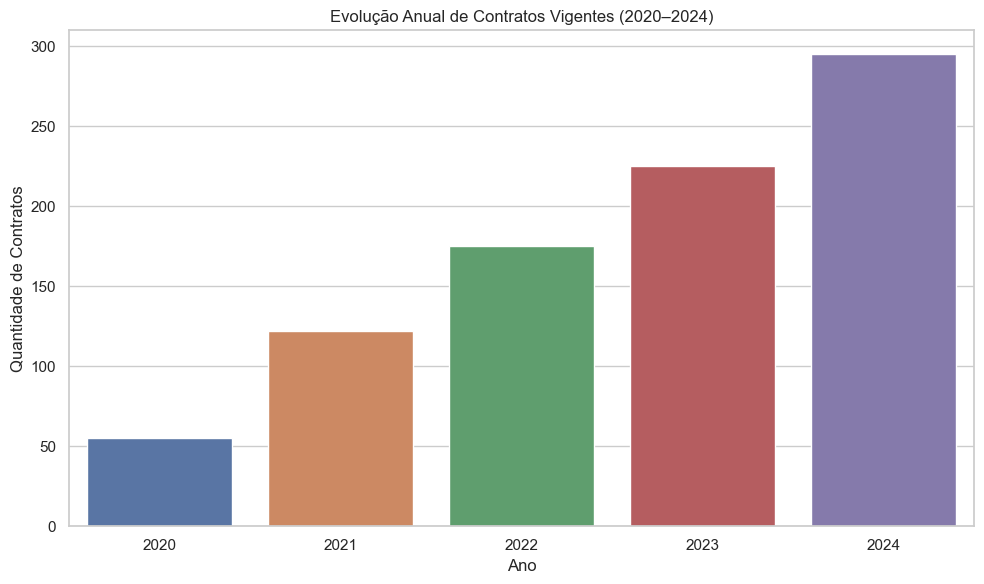

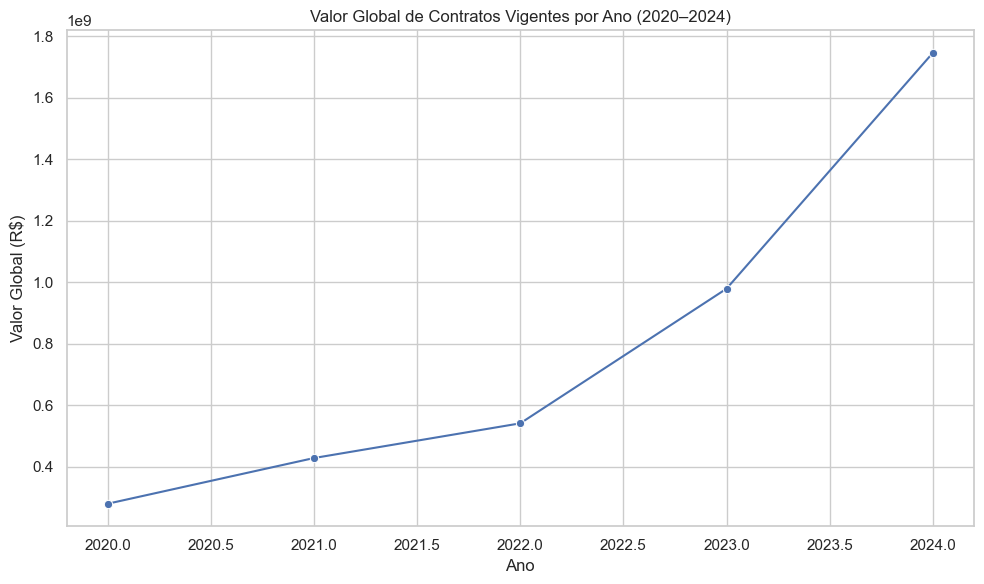

In [117]:
# Tratar datas
df_contratos['Vig. Início'] = pd.to_datetime(df_contratos['Vig. Início'], errors='coerce', dayfirst=True)
df_contratos['Vig. Fim'] = pd.to_datetime(df_contratos['Vig. Fim'], errors='coerce', dayfirst=True)

# Criar colunas de vigência por ano
anos_analise = list(range(2020, 2025))
dados_por_ano = {
    'Ano': [],
    'Qtd Contratos Vigentes': [],
    'Valor Global Total': []
}

for ano in anos_analise:
    vigentes = df_contratos[
        (df_contratos['Vig. Início'].dt.year <= ano) & 
        (df_contratos['Vig. Fim'].dt.year >= ano)
    ]
    dados_por_ano['Ano'].append(ano)
    dados_por_ano['Qtd Contratos Vigentes'].append(vigentes.shape[0])
    dados_por_ano['Valor Global Total'].append(vigentes['Valor Global'].sum())

df_evolucao = pd.DataFrame(dados_por_ano)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Ano', y='Qtd Contratos Vigentes', data=df_evolucao)
plt.title("Evolução Anual de Contratos Vigentes (2020–2024)")
plt.ylabel("Quantidade de Contratos")
plt.tight_layout()
plt.show()

# Plotar gráfico de linha com valor global
plt.figure(figsize=(10, 6))
sns.lineplot(x='Ano', y='Valor Global Total', data=df_evolucao, marker='o')
plt.title("Valor Global de Contratos Vigentes por Ano (2020–2024)")
plt.ylabel("Valor Global (R$)")
plt.tight_layout()
plt.show()


### Evolução Anual de Contratos (Quantidade + Valor + Média Móvel) – Amostra

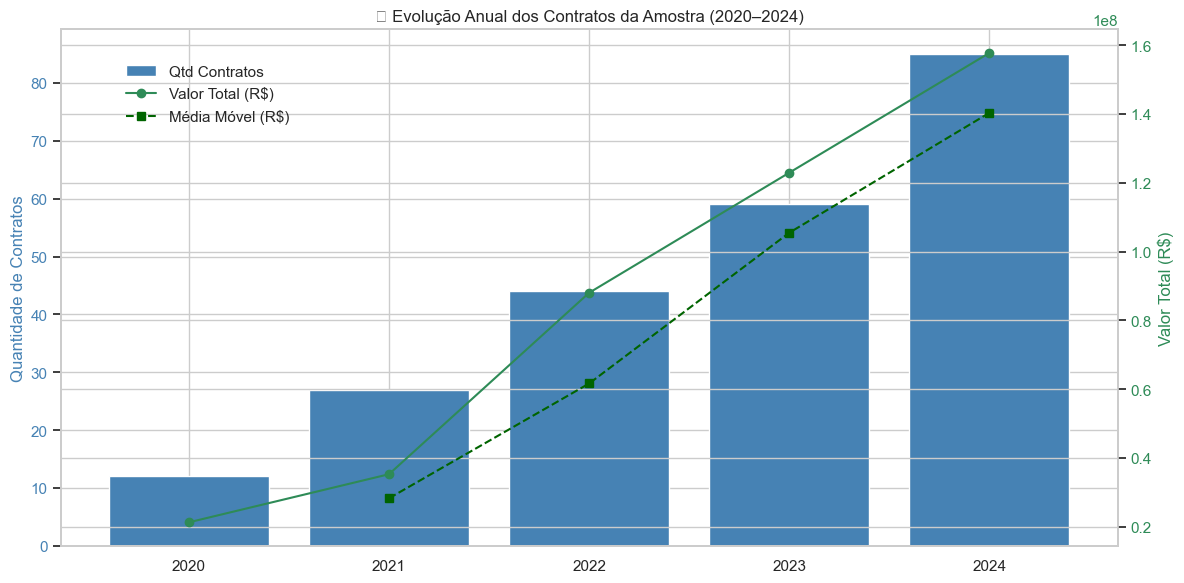

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Garantir datas no formato correto
df_amostra_contratos['Vig. Início'] = pd.to_datetime(df_amostra_contratos['Vig. Início'], errors='coerce', dayfirst=True)
df_amostra_contratos['Vig. Fim'] = pd.to_datetime(df_amostra_contratos['Vig. Fim'], errors='coerce', dayfirst=True)

# 📅 Definir anos corretamente de 2020 a 2024
anos = [2020, 2021, 2022, 2023, 2024]

# 📊 Gerar tabela com evolução anual
evolucao_amostra = []

for ano in anos:
    vigentes = df_amostra_contratos[
        (df_amostra_contratos['Vig. Início'].dt.year <= ano) &
        (df_amostra_contratos['Vig. Fim'].dt.year >= ano)
    ]
    evolucao_amostra.append({
        'Ano': ano,
        'Qtd Contratos': vigentes.shape[0],
        'Valor Total R$': vigentes['Valor Global'].sum()
    })

# Criar DataFrame de evolução
df_evolucao_amostra = pd.DataFrame(evolucao_amostra)

# Calcular média móvel dos valores (janela = 2 anos)
df_evolucao_amostra['Média Móvel R$'] = df_evolucao_amostra['Valor Total R$'].rolling(window=2).mean()

# 📈 Plotagem com dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo esquerdo – Quantidade de contratos
ax1.bar(df_evolucao_amostra['Ano'], df_evolucao_amostra['Qtd Contratos'],
        color='steelblue', label='Qtd Contratos')
ax1.set_ylabel("Quantidade de Contratos", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Eixo direito – Valores contratados e média móvel
ax2 = ax1.twinx()
ax2.plot(df_evolucao_amostra['Ano'], df_evolucao_amostra['Valor Total R$'],
         color='seagreen', marker='o', label='Valor Total (R$)')
ax2.plot(df_evolucao_amostra['Ano'], df_evolucao_amostra['Média Móvel R$'],
         color='darkgreen', linestyle='--', marker='s', label='Média Móvel (R$)')
ax2.set_ylabel("Valor Total (R$)", color='seagreen')
ax2.tick_params(axis='y', labelcolor='seagreen')

# 🎯 Título e legenda
plt.title("📊 Evolução Anual dos Contratos da Amostra (2020–2024)")
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()



### Top 15 Ministérios por Quantidade de Contratos

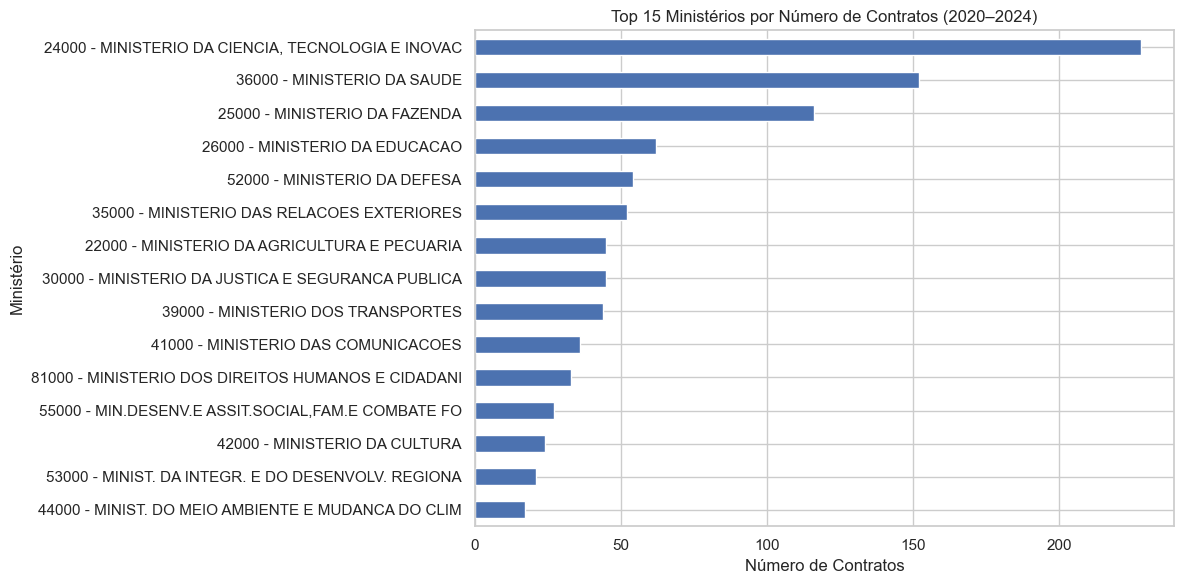

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico 1 – Top 15 Ministérios por Número de Contratos
plt.figure(figsize=(12, 6))
df_contratos['Órgão'].value_counts().head(15).sort_values().plot(kind='barh')
plt.title("Top 15 Ministérios por Número de Contratos (2020–2024)")
plt.xlabel("Número de Contratos")
plt.ylabel("Ministério")
plt.tight_layout()
plt.show()


### Top 15 Ministérios por Valor Total (R$)

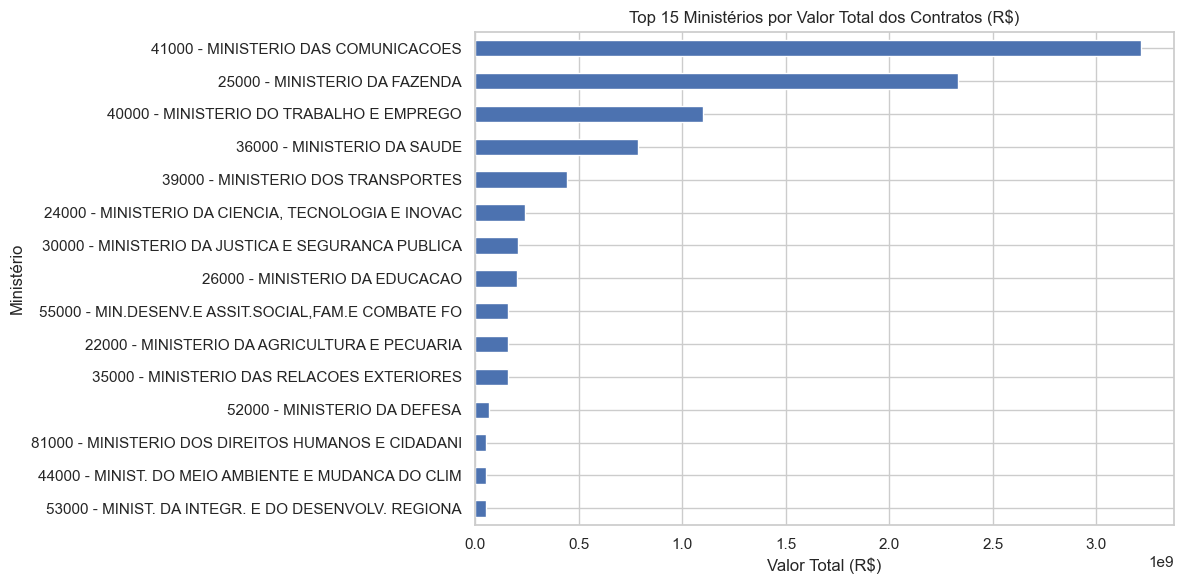

In [109]:
# Gráfico 2 – Top 15 Ministérios por Valor Total dos Contratos
top_orgaos_valor = (
    df_contratos.groupby('Órgão')['Valor Global'].sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
top_orgaos_valor.sort_values().plot(kind='barh')
plt.title("Top 15 Ministérios por Valor Total dos Contratos (R$)")
plt.xlabel("Valor Total (R$)")
plt.ylabel("Ministério")
plt.tight_layout()
plt.show()


### Top 15 Fornecedores (Todos os contratos) – Quantidade

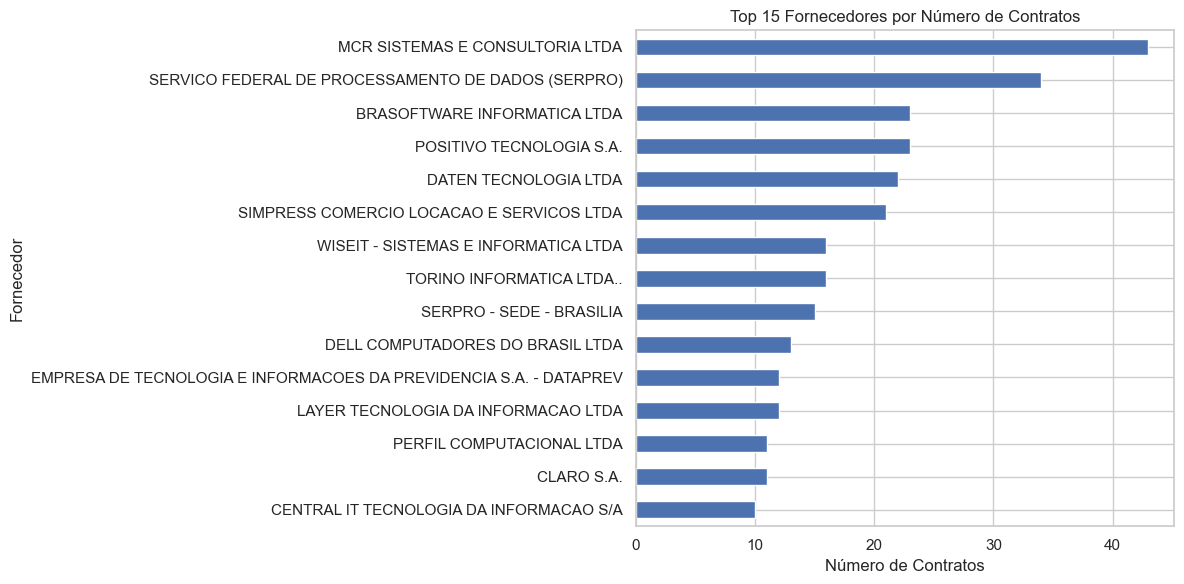

In [110]:
# Gráfico 3 – Top 15 Fornecedores por Número de Contratos
plt.figure(figsize=(12, 6))
df_contratos['Nome Fornecedor'].value_counts().head(15).sort_values().plot(kind='barh')
plt.title("Top 15 Fornecedores por Número de Contratos")
plt.xlabel("Número de Contratos")
plt.ylabel("Fornecedor")
plt.tight_layout()
plt.show()


### Top 15 Fornecedores (Todos os contratos) – Valor Total

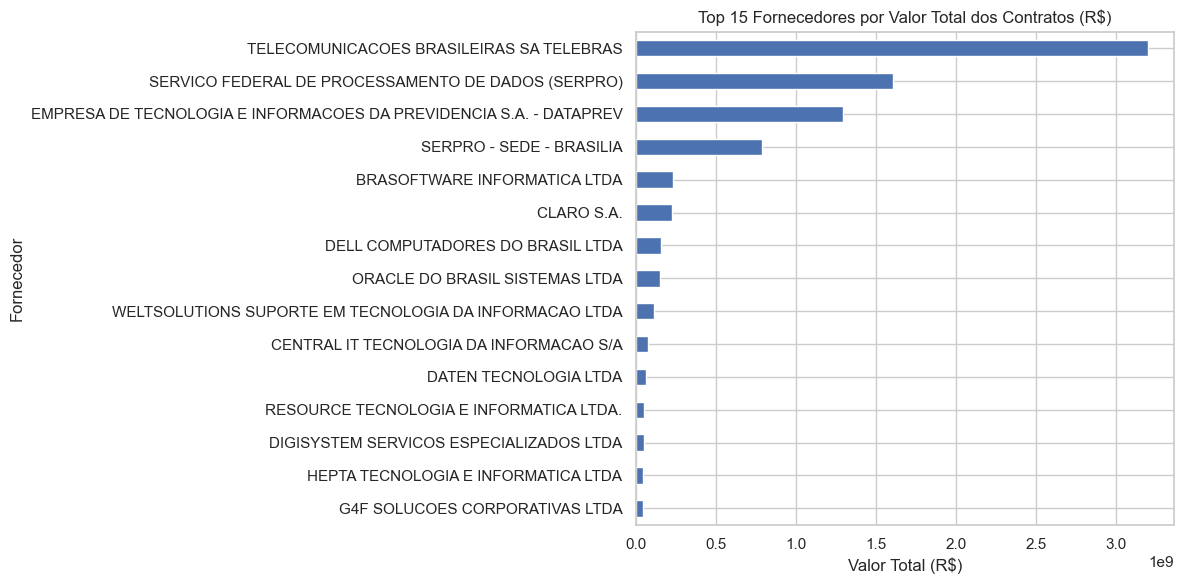

In [111]:
# Gráfico 4 – Top 15 Fornecedores por Valor Total dos Contratos
top_fornecedores_valor = (
    df_contratos.groupby('Nome Fornecedor')['Valor Global'].sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
top_fornecedores_valor.sort_values().plot(kind='barh')
plt.title("Top 15 Fornecedores por Valor Total dos Contratos (R$)")
plt.xlabel("Valor Total (R$)")
plt.ylabel("Fornecedor")
plt.tight_layout()
plt.show()


### Top 15 Ministérios (Amostra) por Quantidade de Contratos

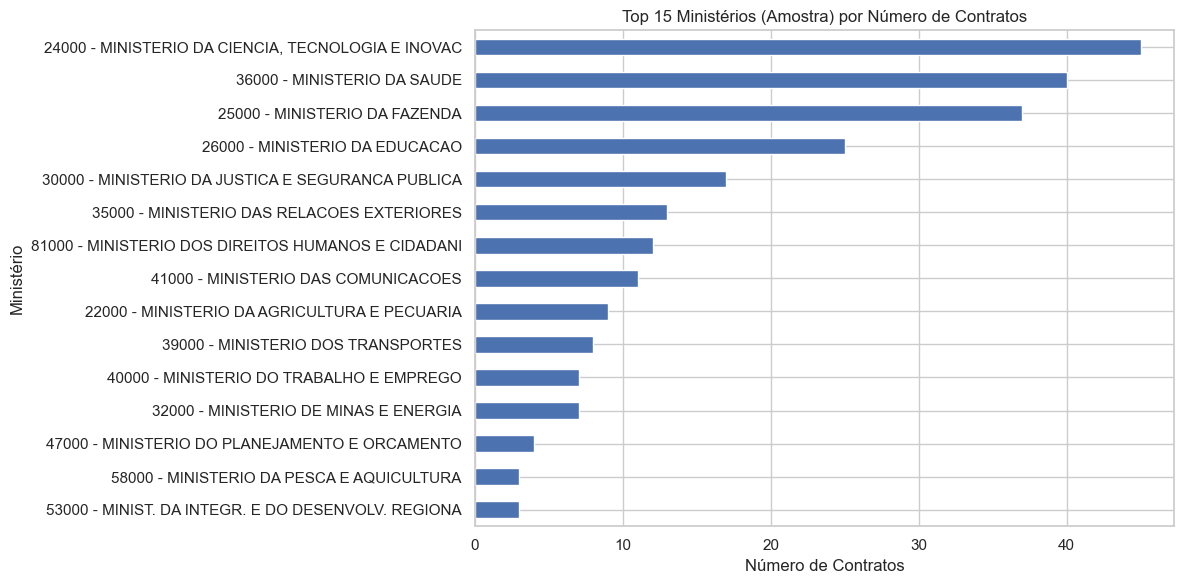

In [112]:
# Gráfico – Top 15 Ministérios da Amostra por Número de Contratos
import matplotlib.pyplot as plt

top_orgaos_amostra_qtd = (
    df_amostra_contratos['Órgão']
    .value_counts()
    .head(15)
    .sort_values()
)

plt.figure(figsize=(12, 6))
top_orgaos_amostra_qtd.plot(kind='barh')
plt.title("Top 15 Ministérios (Amostra) por Número de Contratos")
plt.xlabel("Número de Contratos")
plt.ylabel("Ministério")
plt.tight_layout()
plt.show()


### Top 15 Ministérios (Amostra) por Valor Total dos Contratos

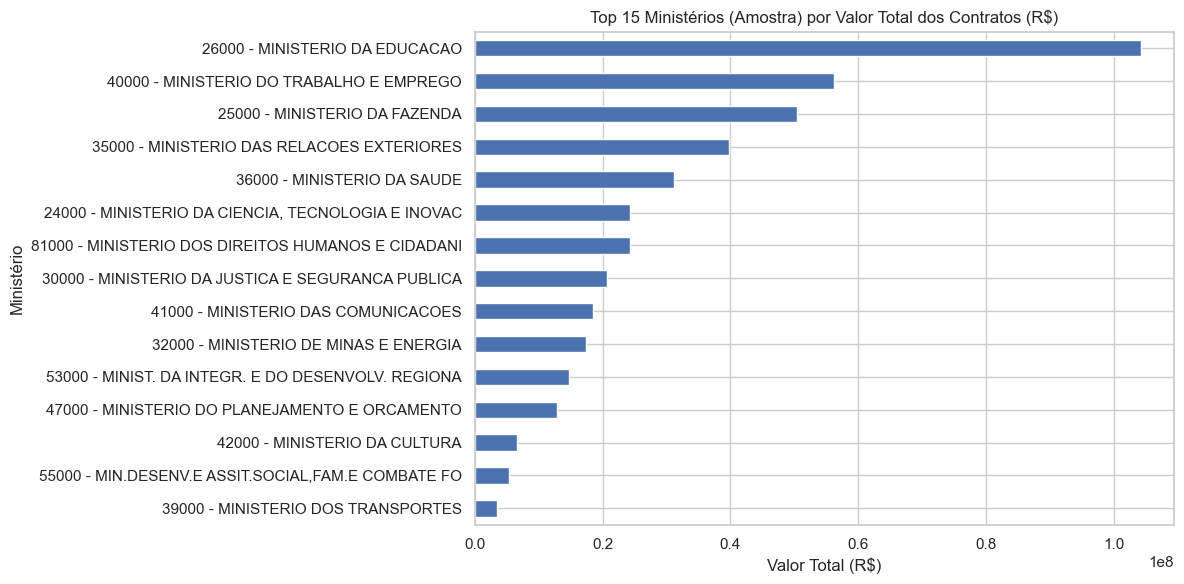

In [113]:
# Gráfico – Top 15 Ministérios da Amostra por Valor Total dos Contratos
top_orgaos_amostra_valor = (
    df_amostra_contratos
    .groupby('Órgão')['Valor Global']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
top_orgaos_amostra_valor.sort_values().plot(kind='barh')
plt.title("Top 15 Ministérios (Amostra) por Valor Total dos Contratos (R$)")
plt.xlabel("Valor Total (R$)")
plt.ylabel("Ministério")
plt.tight_layout()
plt.show()


### Top 15 Fornecedores da Amostra – Quantidade

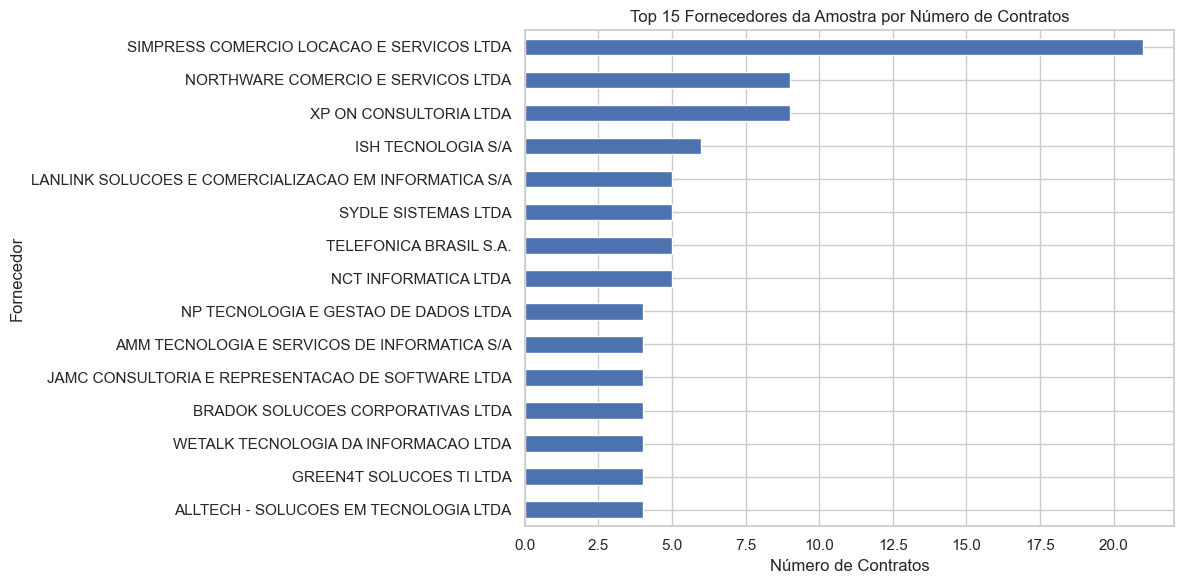

In [115]:
# Gráfico 5 – Top 15 Fornecedores da Amostra por Número de Contratos
plt.figure(figsize=(12, 6))
df_amostra_contratos['Nome Fornecedor'].value_counts().head(15).sort_values().plot(kind='barh')
plt.title("Top 15 Fornecedores da Amostra por Número de Contratos")
plt.xlabel("Número de Contratos")
plt.ylabel("Fornecedor")
plt.tight_layout()
plt.show()


### Top 15 Fornecedores da Amostra – Valor Total

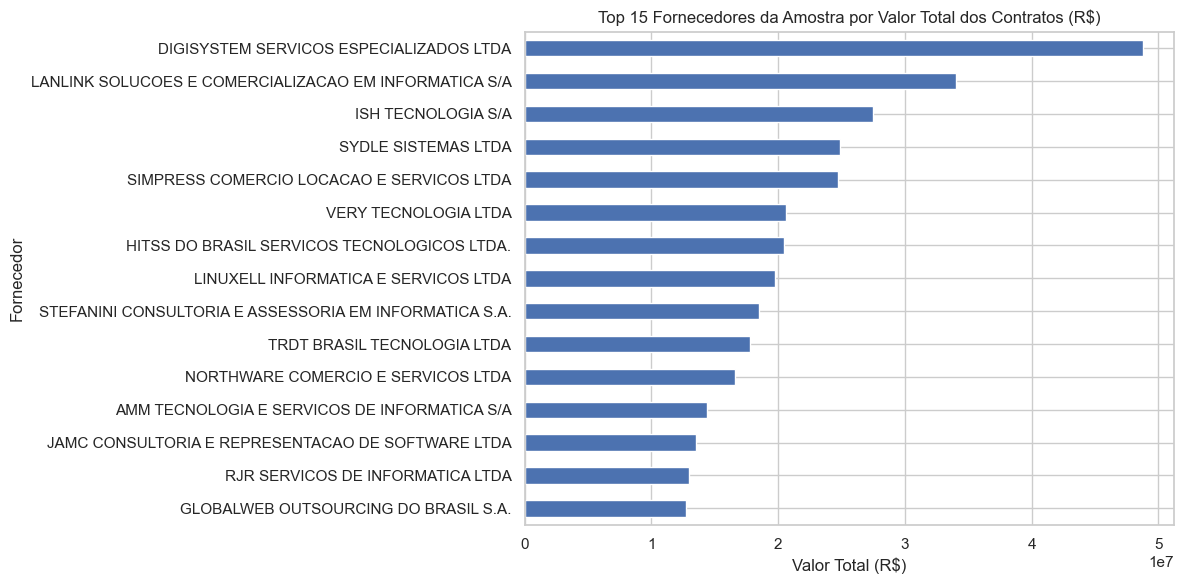

In [116]:
# Gráfico 6 – Top 15 Fornecedores da Amostra por Valor Total dos Contratos
top_amostra_valor = (
    df_amostra_contratos.groupby('Nome Fornecedor')['Valor Global'].sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
top_amostra_valor.sort_values().plot(kind='barh')
plt.title("Top 15 Fornecedores da Amostra por Valor Total dos Contratos (R$)")
plt.xlabel("Valor Total (R$)")
plt.ylabel("Fornecedor")
plt.tight_layout()
plt.show()


### Análise Exploratória de Dados para a Amostra de 150 fornecedores

### 1. Distribuição de Fornecedores por Estado (UF):

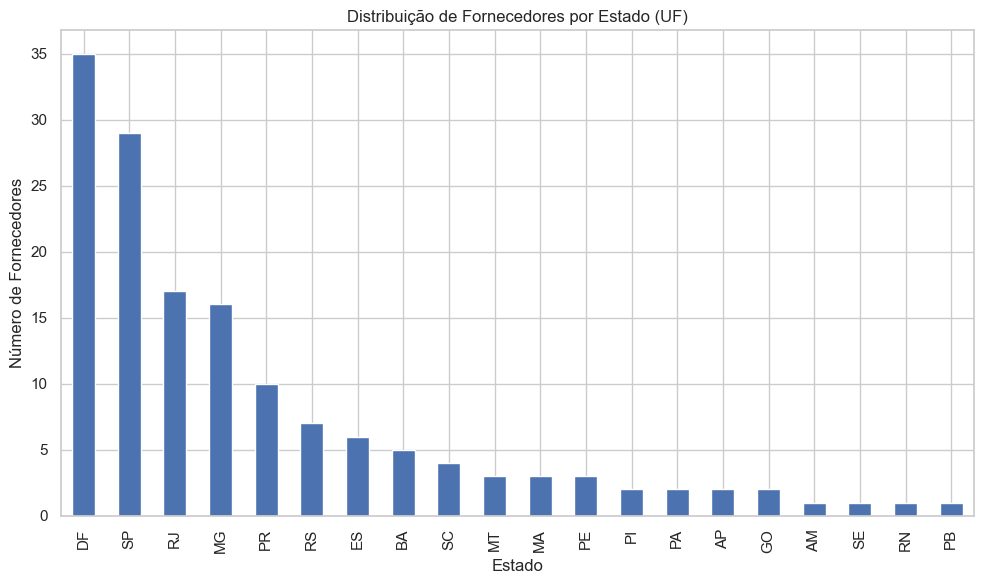

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df_amostra['Estado'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribuição de Fornecedores por Estado (UF)')
plt.xlabel('Estado')
plt.ylabel('Número de Fornecedores')
plt.tight_layout()
plt.show()


### 2. Distribuição de Fornecedores por Porte:

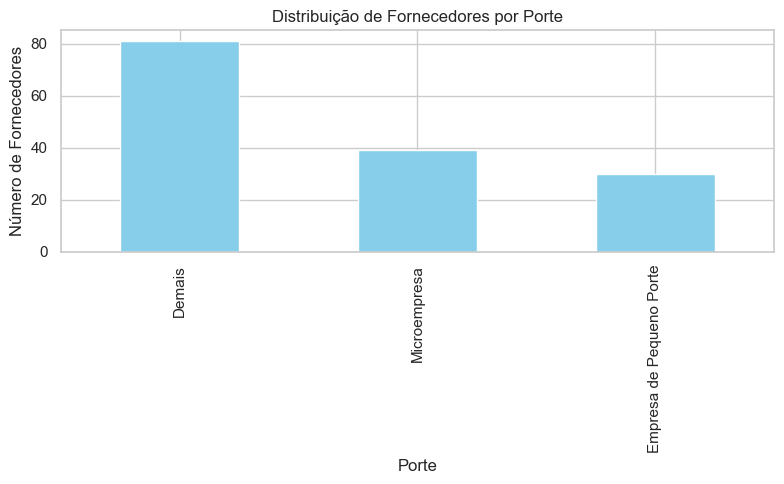

In [187]:
plt.figure(figsize=(8,5))
df_amostra['Porte'].value_counts().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribuição de Fornecedores por Porte')
plt.xlabel('Porte')
plt.ylabel('Número de Fornecedores')
plt.tight_layout()
plt.show()


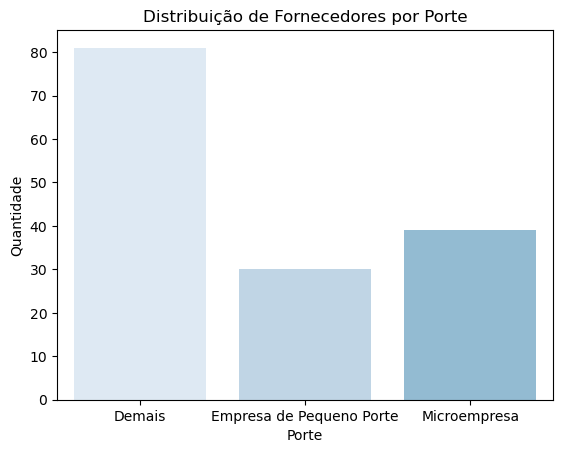

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando a paleta de cores para tons de azul
sns.set_palette("Blues")

# Criando o gráfico de barras
sns.countplot(data=df_fornecedores, x='Porte')
plt.title('Distribuição de Fornecedores por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade')
plt.show()

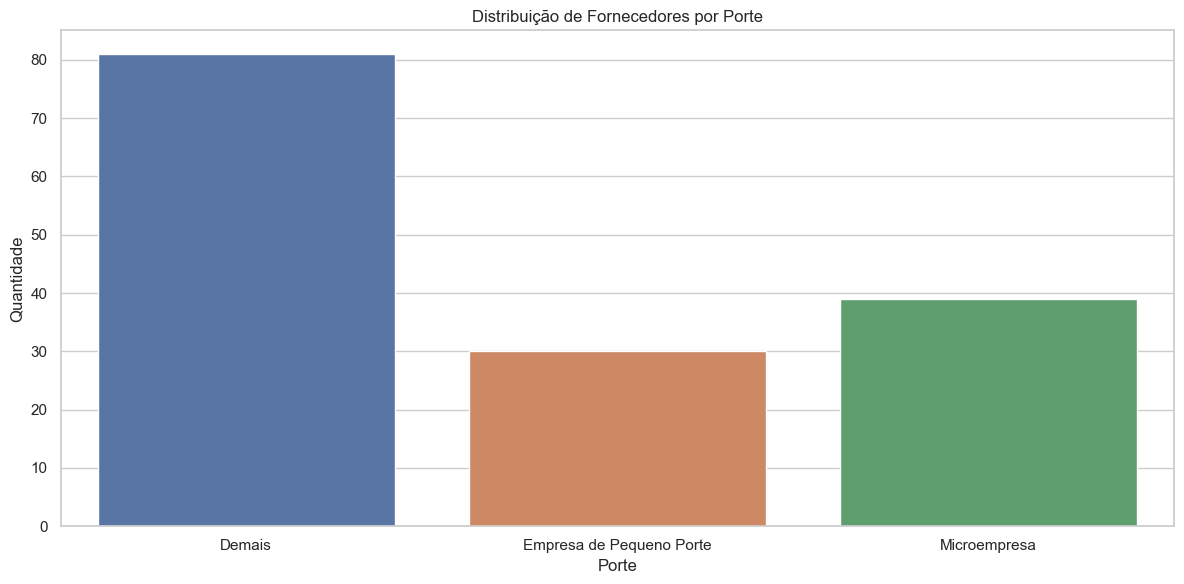

In [188]:
# Contagem por Porte
sns.countplot(data=df_amostra, x='Porte')
plt.title('Distribuição de Fornecedores por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade')
plt.show()


### 3. Distribuição de Fornecedores com e sem CEIS:

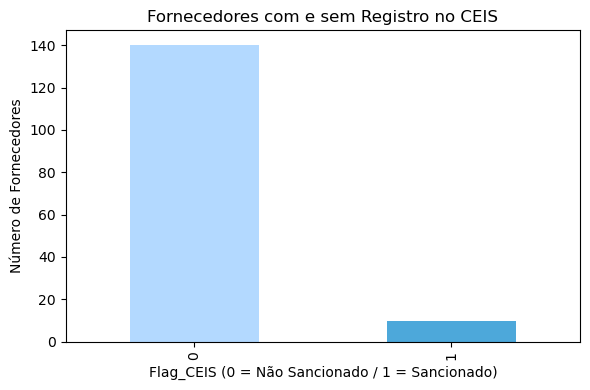

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Definindo uma paleta com tons de azul para as duas categorias
colors = ['#B3D9FF', '#4DA8DA']  # Azul claro e azul escuro

# Criando o gráfico de barras
df_amostra['Flag_CEIS'].value_counts().plot(kind='bar', color=colors)
plt.title('Fornecedores com e sem Registro no CEIS')
plt.xlabel('Flag_CEIS (0 = Não Sancionado / 1 = Sancionado)')
plt.ylabel('Número de Fornecedores')
plt.tight_layout()
plt.show()

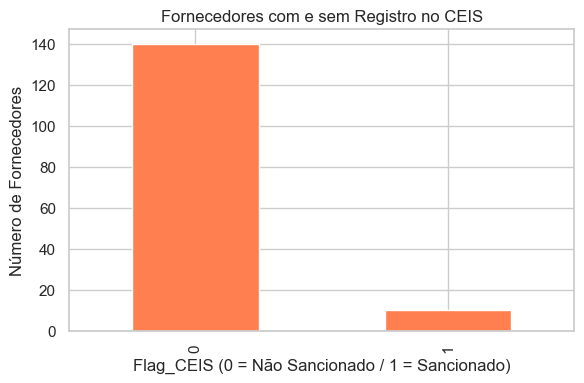

In [189]:
plt.figure(figsize=(6,4))
df_amostra['Flag_CEIS'].value_counts().plot(kind='bar', color='coral')
plt.title('Fornecedores com e sem Registro no CEIS')
plt.xlabel('Flag_CEIS (0 = Não Sancionado / 1 = Sancionado)')
plt.ylabel('Número de Fornecedores')
plt.tight_layout()
plt.show()


### Análises Descritivas


📊 Estatísticas Descritivas - Base Completa (1008 contratos)
count    1.008000e+03
mean     9.282198e+06
std      1.088956e+08
min      0.000000e+00
25%      6.400000e+04
50%      3.314259e+05
75%      1.933727e+06
max      3.125903e+09
Name: Valor Global, dtype: float64


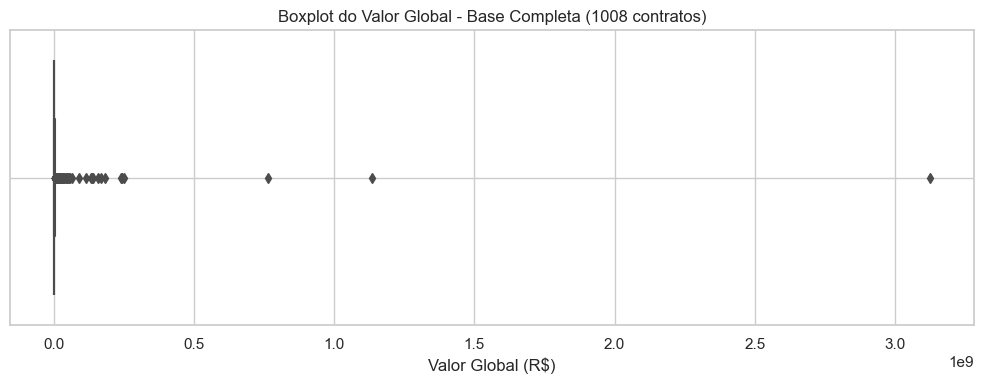

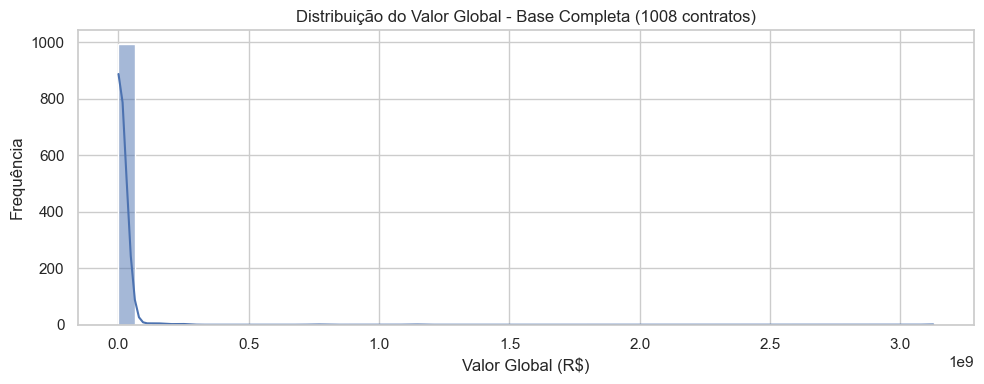


📊 Estatísticas Descritivas - Amostra (143 fornecedores, ~248 contratos)
count    2.480000e+02
mean     1.754830e+06
std      4.364545e+06
min      1.000000e-02
25%      4.512347e+04
50%      1.996107e+05
75%      1.296453e+06
max      4.188582e+07
Name: Valor Global, dtype: float64


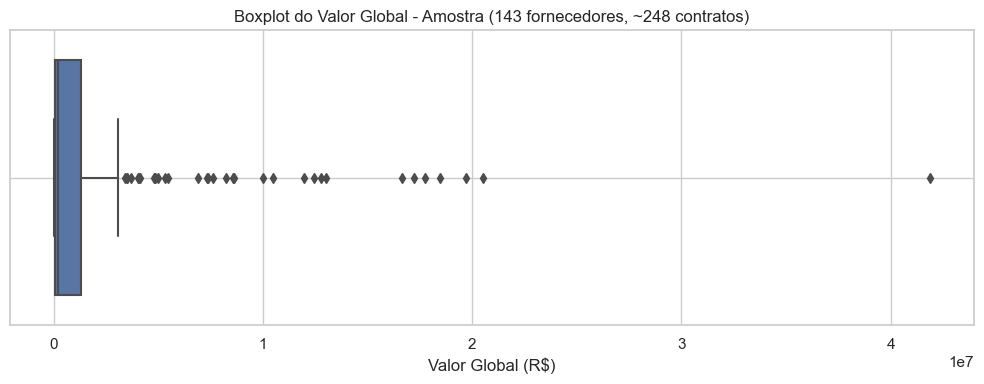

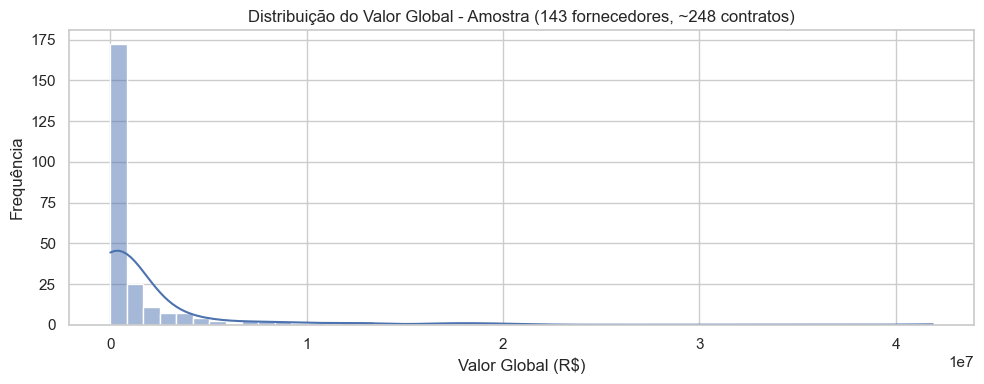

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df_total = pd.read_csv('contratos_1008_com_flags.csv')
df_amostra = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';')

# Padronizar CNPJ da amostra para 14 dígitos
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)
df_total['CNPJ_clean'] = df_total['CNPJ'].astype(str).str.zfill(14)

# Converter valores monetários com segurança
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return 0.0

df_total['Valor Global'] = df_total['Valor Global'].apply(converter_valor)

# Converter datas
df_total['Vig. Início'] = pd.to_datetime(df_total['Vig. Início'], errors='coerce', dayfirst=True)
df_total['Vig. Fim'] = pd.to_datetime(df_total['Vig. Fim'], errors='coerce', dayfirst=True)

# Filtrar amostra na base total
df_amostra_total = df_total[df_total['CNPJ_clean'].isin(df_amostra['CNPJ_clean'])].copy()

# Função de análise descritiva com boxplot e histograma
def analise_descritiva(df, titulo):
    descricao = df['Valor Global'].describe()
    print(f"\n📊 Estatísticas Descritivas - {titulo}")
    print(descricao)

    # Boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df['Valor Global'])
    plt.title(f'Boxplot do Valor Global - {titulo}')
    plt.xlabel('Valor Global (R$)')
    plt.grid(True)
    plt.show()

    # Histograma
    plt.figure(figsize=(10, 4))
    sns.histplot(df['Valor Global'], bins=50, kde=True)
    plt.title(f'Distribuição do Valor Global - {titulo}')
    plt.xlabel('Valor Global (R$)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Execução para base completa e amostra
analise_descritiva(df_total, 'Base Completa (1008 contratos)')
analise_descritiva(df_amostra_total, 'Amostra (143 fornecedores, ~248 contratos)')


### ✅ 1. Coerência das Estatísticas Descritivas
📌 Base Completa (1008 contratos)
Média ≈ R$ 9,28 milhões

Mediana ≈ R$ 331 mil

Desvio padrão extremamente alto (R$ 108 milhões)

Assimetria alta (média muito maior que a mediana)

Outliers identificados no boxplot

Interpretação: a distribuição é altamente assimétrica à direita, com muitos contratos pequenos e poucos contratos gigantescos (acima de R$ 1 bilhão). O histograma confirma essa cauda longa.

📌 Amostra (143 fornecedores, ~248 contratos)
Média ≈ R$ 1,75 milhão

Mediana ≈ R$ 199 mil

Desvio padrão moderado (R$ 4,36 milhões)

Distribuição também assimétrica, mas menos que a base completa

Interpretação: o comportamento é similar ao da base completa, mas menos extremo. A amostra é uma boa representação para análise inferencial — não há viés aparente de seleção, e conseguimos capturar tanto pequenos como grandes fornecedores.

✅ 2. Coerência dos Gráficos
Os boxplots e histogramas com KDE para ambas as bases mostram:

Presença de muitos valores pequenos concentrados.

Alguns valores fora do padrão, marcados como outliers.

Distribuição não normal — o que será importante nos testes de hipóteses e na escolha de testes não paramétricos, se necessário.

Conclusão visual: gráficos estão corretos, com escalas coerentes para análise econômica e estatística. A presença de outliers não inviabiliza a análise, mas sugere atenção ao tipo de teste que será usado.

### Testes de Normalidade (Base Completa e Amostra)
Testes de Shapiro-Wilk e Kolmogorov-Smirnov, considerando os dois grupos:


📊 Teste de Normalidade - Base Completa (1008 contratos)
Shapiro-Wilk: estatística=0.0495, p-valor=0.0000
Kolmogorov-Smirnov: estatística=0.4660, p-valor=0.0000
D'Agostino-Pearson: estatística=2502.3056, p-valor=0.0000


C:\Users\F8094564\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


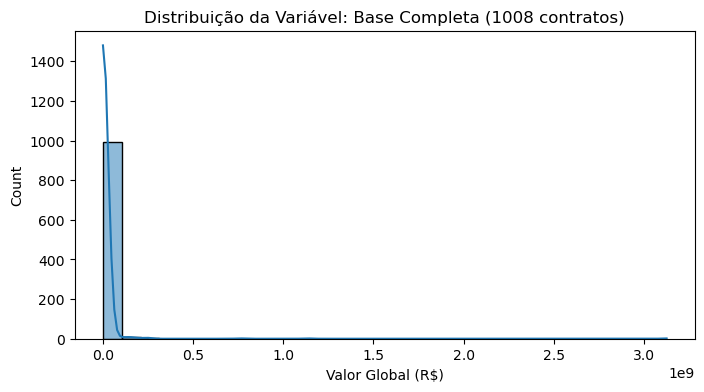


📊 Teste de Normalidade - Amostra (143 fornecedores, ~248 contratos)
Shapiro-Wilk: estatística=0.4348, p-valor=0.0000
Kolmogorov-Smirnov: estatística=0.3438, p-valor=0.0000
D'Agostino-Pearson: estatística=284.1575, p-valor=0.0000


C:\Users\F8094564\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


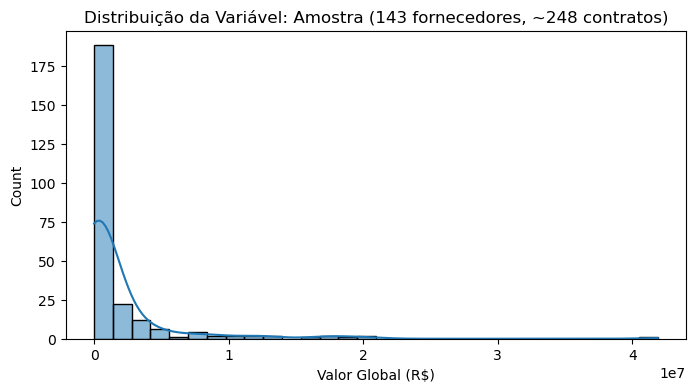

In [60]:
# 📚 Importar bibliotecas
import pandas as pd
from scipy.stats import shapiro, kstest, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 🚀 1. Carregar as bases já tratadas
df_total = pd.read_csv('contratos_1008_com_flags.csv')
df_amostra = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';')

# 🚀 2. Padronizar CNPJ da amostra
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)
df_total['CNPJ_clean'] = df_total['CNPJ'].astype(str).str.zfill(14)

# 🚀 3. Filtrar os contratos da amostra
df_amostra_total = df_total[df_total['CNPJ_clean'].isin(df_amostra['CNPJ_clean'])].copy()

# 🚀 4. Garantir que 'Valor Global' esteja numérico
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return 0.0

df_total['Valor Global'] = df_total['Valor Global'].apply(converter_valor)
df_amostra_total['Valor Global'] = df_amostra_total['Valor Global'].apply(converter_valor)

# 🚀 5. Função para aplicar os testes de normalidade
def testar_normalidade(serie, nome_base):
    print(f"\n📊 Teste de Normalidade - {nome_base}")

    # Shapiro-Wilk
    stat_sw, p_sw = shapiro(serie)
    print(f"Shapiro-Wilk: estatística={stat_sw:.4f}, p-valor={p_sw:.4f}")

    # Kolmogorov-Smirnov (com média e std empíricos)
    stat_ks, p_ks = kstest(
        (serie - serie.mean()) / serie.std(ddof=1), 
        'norm'
    )
    print(f"Kolmogorov-Smirnov: estatística={stat_ks:.4f}, p-valor={p_ks:.4f}")

    # D'Agostino-Pearson (teste extra para robustez)
    stat_dp, p_dp = normaltest(serie)
    print(f"D'Agostino-Pearson: estatística={stat_dp:.4f}, p-valor={p_dp:.4f}")

    # 📈 Plot para visualização
    plt.figure(figsize=(8,4))
    sns.histplot(serie, bins=30, kde=True)
    plt.title(f'Distribuição da Variável: {nome_base}')
    plt.xlabel('Valor Global (R$)')
    plt.show()

# 🚀 6. Aplicar os testes nas duas bases
testar_normalidade(df_total['Valor Global'], "Base Completa (1008 contratos)")
testar_normalidade(df_amostra_total['Valor Global'], "Amostra (143 fornecedores, ~248 contratos)")


### Teste de Normalidade para as variáveis "Valor Global", "Capital Social" e "Idade da Empresa"


📊 Testes de Normalidade - Capital Social
Shapiro-Wilk: estatística=0.0641, p-valor=0.0000
Kolmogorov-Smirnov: estatística=0.4954, p-valor=0.0000
D’Agostino-Pearson: estatística=325.9470, p-valor=0.0000


C:\Users\F8094564\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


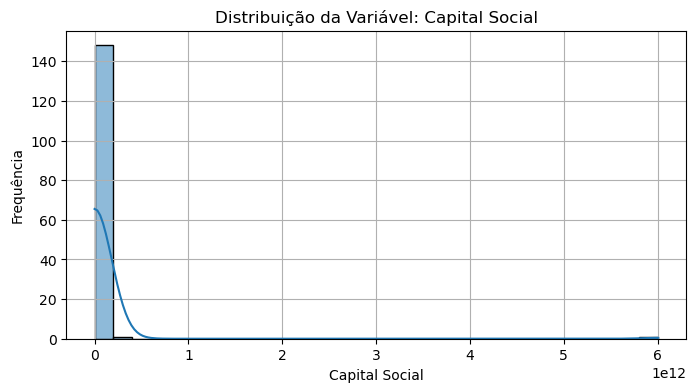


📊 Testes de Normalidade - Idade da Empresa
Shapiro-Wilk: estatística=0.9135, p-valor=0.0000
Kolmogorov-Smirnov: estatística=0.0933, p-valor=0.1374
D’Agostino-Pearson: estatística=37.9431, p-valor=0.0000


C:\Users\F8094564\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


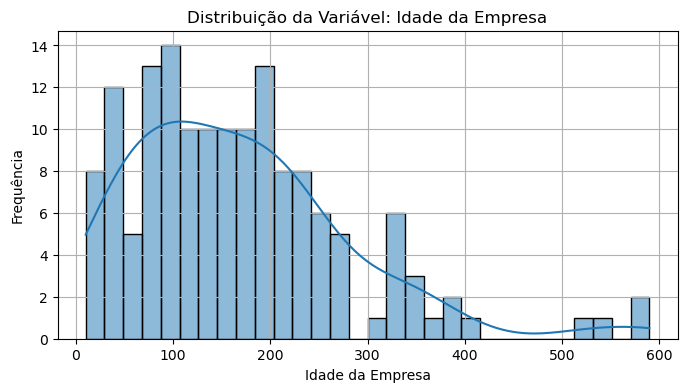

In [61]:
# 📚 Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, normaltest

# 🟢 1. Carregar o arquivo
df = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=';')

# 🟢 2. Tratar as variáveis para garantir formato numérico

# Capital Social
df['Capital Social'] = df['Capital Social'].replace('R\$', '', regex=True)
df['Capital Social'] = df['Capital Social'].replace('\.', '', regex=True)
df['Capital Social'] = df['Capital Social'].replace(',', '.', regex=True)
df['Capital Social'] = pd.to_numeric(df['Capital Social'], errors='coerce').fillna(0)

# Idade da Empresa
df['Idade da Empresa'] = pd.to_numeric(df['Idade da Empresa'], errors='coerce').fillna(0)

# Valor Global (se desejar aplicar também)
if 'Valor Global' in df.columns:
    df['Valor Global'] = df['Valor Global'].replace('R\$', '', regex=True)
    df['Valor Global'] = df['Valor Global'].replace('\.', '', regex=True)
    df['Valor Global'] = df['Valor Global'].replace(',', '.', regex=True)
    df['Valor Global'] = pd.to_numeric(df['Valor Global'], errors='coerce').fillna(0)

# 🟢 3. Função para aplicar os testes de normalidade
def testar_normalidade(serie, nome_variavel):
    print(f"\n📊 Testes de Normalidade - {nome_variavel}")
    serie = serie.dropna()

    # Shapiro-Wilk
    stat_sw, p_sw = shapiro(serie)
    print(f"Shapiro-Wilk: estatística={stat_sw:.4f}, p-valor={p_sw:.4f}")

    # Kolmogorov-Smirnov (normalizado)
    stat_ks, p_ks = kstest((serie - serie.mean()) / serie.std(ddof=1), 'norm')
    print(f"Kolmogorov-Smirnov: estatística={stat_ks:.4f}, p-valor={p_ks:.4f}")

    # D’Agostino-Pearson
    stat_dp, p_dp = normaltest(serie)
    print(f"D’Agostino-Pearson: estatística={stat_dp:.4f}, p-valor={p_dp:.4f}")

    # 📈 Plot
    plt.figure(figsize=(8, 4))
    sns.histplot(serie, bins=30, kde=True)
    plt.title(f'Distribuição da Variável: {nome_variavel}')
    plt.xlabel(nome_variavel)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# 🟢 4. Executar para as variáveis desejadas
testar_normalidade(df['Capital Social'], 'Capital Social')
testar_normalidade(df['Idade da Empresa'], 'Idade da Empresa')

if 'Valor Global' in df.columns:
    testar_normalidade(df['Valor Global'], 'Valor Global')


###  🧠 Próxima Etapa: Testes de Hipóteses (Inferência Estatística)

1. Diferença de Médias / Localizações:

    Como os dados não são normais → Usaremos testes não paramétricos, como:

    Mann-Whitney U Test → Para comparar o Valor Global entre dois grupos (exemplo: fornecedores da amostra vs. demais, ou CNEP vs. não CNEP).

2. Associação entre Variáveis Categóricas:

    Por exemplo, verificar associação entre ministérios e presença de fornecedores da amostra, ou presença em CEIS/CNEP.

    Teste Qui-Quadrado para variáveis categóricas.

3. Correlação (Spearman ou Kendall):

    Como os dados não são normais → usar Correlação de Spearman entre valor global e número de contratos por fornecedor/ministério.

4. Análise de Outliers:

    Podemos fazer um filtro ou Winsorização antes de alguns testes

# 📋 Hipóteses de Pesquisa (H1 a H10):

H1	Ministérios com maior número de contratos possuem valores médios de contratos mais baixos.

H2	Fornecedores com maior idade (tempo de existência) possuem contratos de maior valor.

H3	Fornecedores sancionados (presentes nas listas CNEP ou CEIS) possuem contratos de menor valor.

H4	Empresas de maior porte (classificação oficial de porte) possuem contratos de maior valor.

H5	Fornecedores localizados na Região Sudeste possuem contratos de maior valor.

H6	Fornecedores localizados no Distrito Federal possuem contratos de maior valor.

H7	Fornecedores localizados na Região Sudeste possuem maior número de contratos.

H8	Fornecedores localizados no Distrito Federal possuem maior número de contratos.

H9	Empresas com maior capital social possuem maior número de contratos.

H10	Empresas com maior capital social possuem contratos de maior valor.

### ✅ Observações:

As hipóteses H1 até H6 estão focadas na análise de valores de contratos (variável dependente = Valor Global do contrato).

As hipóteses H7 até H9 envolvem quantidade de contratos por fornecedor (contagem).

Algumas hipóteses (ex.: H2, H9, H10) envolvem variáveis contínuas e podem exigir análise por correlação, enquanto outras (ex.: H1, H4, H5, H6) envolvem grupos e exigirão testes de comparação de médias (não-paramétricos ou paramétricos conforme a normalidade).

### 🧠📐 Formulação e Teste das Hipóteses (Inferência Estatística)

### 📌 Ordem Recomendada entre Análise Descritiva, Testes H1-H10 e Outras Análises Inferenciais

| Etapa                                                                               | O que fazer                                                                                                                                             | Por que fazer aqui?                                                                                                                                |
| ----------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| ✅ **1. Estatísticas Descritivas + EDA (Já feito)**                                  | Médias, medianas, boxplots, histogramas, análise de outliers                                                                                            | Para entender a distribuição inicial dos dados e possíveis problemas de escala, normalidade e outliers.                                            |
| ✅ **2. Teste de Normalidade (Já feito)**                                            | Shapiro-Wilk, Kolmogorov-Smirnov, D'Agostino                                                                                                            | Para fundamentar a escolha de testes paramétricos ou não paramétricos nas etapas seguintes.                                                        |
| ✅ **3. Formulação e Testes das Hipóteses Específicas (H1 a H10) (Em andamento)**    | Rodar os testes de Mann-Whitney, Spearman, Kruskal-Wallis, etc., para cada hipótese do seu quadro (H1 a H10)                                            | Porque são as hipóteses principais do artigo.                                                                                                  |
| 🔜 **4. Testes Comparando Amostra vs Restante da População (Mann-Whitney)**         | Exemplo: Comparar se os fornecedores da amostra (143) têm valores de contratos diferentes dos demais fornecedores da base (306 fornecedores restantes). | Isso é importante para validar se a amostra é enviesada ou representativa em relação ao todo antes de usar apenas a amostra nos próximos passos. |
| 🔜 **5. Testes de Associação Global (Qui-Quadrado entre variáveis categóricas)**    | Exemplo: Associação entre CNEP/CEIS e Ministério, ou entre Estado e Volume de contratos.                                                                | Complementa a etapa anterior, avaliando associação entre variáveis categóricas no total da base.                                                   |
| 🔜 **6. Correlações Adicionais (Spearman entre quantidade de contratos e valores)** | Exemplo: Correlação entre número de contratos por fornecedor e o valor total contratado.                                                                | Avalia relação entre variáveis contínuas que ainda não foram testadas nas H1-H10.                                                                  |
| Opcional **7. Análise de Outliers (Winsorização, Filtragem, etc)**                  | Se os outliers estiverem impactando demais os testes anteriores, podemos criar versões sem outliers para análise robusta.                               | Só vale a pena fazer se os resultados atuais estiverem distorcidos.                                                                                |


### Testes de Hipóteses (H1 a H10)

### 🔍 H1: Ministérios com mais contratos têm valores médios mais baixos

In [125]:
import scipy.stats as stats

# Criar uma variável com o número de contratos por ministério
df_total['Qtd_Contratos_Min'] = df_total.groupby('Órgão')['Órgão'].transform('count')

# Criar um corte: Ministérios com + que a mediana de contratos vs. demais
mediana_contratos_min = df_total['Qtd_Contratos_Min'].median()
df_total['Grupo_H1'] = df_total['Qtd_Contratos_Min'].apply(lambda x: 'Alto Volume' if x > mediana_contratos_min else 'Baixo Volume')

# Teste de Mann-Whitney U
grupo_alto = df_total[df_total['Grupo_H1'] == 'Alto Volume']['Valor Global']
grupo_baixo = df_total[df_total['Grupo_H1'] == 'Baixo Volume']['Valor Global']

stat, p = stats.mannwhitneyu(grupo_alto, grupo_baixo, alternative='two-sided')
print(f"H1 - Mann-Whitney U Test: estatística={stat:.4f}, p-valor={p:.4f}")


H1 - Mann-Whitney U Test: estatística=101363.5000, p-valor=0.0000


### 🔍 H2: Fornecedores mais antigos têm contratos de maior valor

In [127]:
import pandas as pd
from scipy import stats

# ✅ 1. Carregar os dados
df_total = pd.read_csv('contratos_1008_com_flags.csv')
df_amostra = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';')

# ✅ 2. Padronizar CNPJs
df_total['CNPJ_clean'] = df_total['CNPJ'].astype(str).str.zfill(14)
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)

# ✅ 3. Filtrar apenas contratos da amostra
df_amostra_total = df_total[df_total['CNPJ_clean'].isin(df_amostra['CNPJ_clean'])].copy()

# ✅ 4. Trazer a idade da empresa da amostra para o dataframe de contratos
df_amostra_total = df_amostra_total.merge(
    df_amostra[['CNPJ_clean', 'Idade da Empresa']],
    on='CNPJ_clean',
    how='left'
)

# ✅ 5. Garantir que a idade da empresa seja numérica
df_amostra_total['Idade da Empresa'] = pd.to_numeric(df_amostra_total['Idade da Empresa'], errors='coerce')

# ✅ 6. Aplicar o teste de Spearman (correlação entre idade e valor global dos contratos)
stat, p = stats.spearmanr(df_amostra_total['Idade da Empresa'], df_amostra_total['Valor Global'])

# ✅ 7. Resultado
print(f"H2 - Correlação de Spearman entre Idade da Empresa e Valor Global: estatística={stat:.4f}, p-valor={p:.4f}")


H2 - Correlação de Spearman entre Idade da Empresa e Valor Global: estatística=-0.0274, p-valor=0.6672


### ✅ Considerações importantes antes de gerar os próximos scripts:
✔️ Sobre a base de contratos (df_total):
Contém os 1008 contratos

Contém as flags CEIS e CNEP (0 ou 1)

Contém os valores já convertidos para float

Contém o CNPJ limpo como CNPJ_clean

✔️ Sobre a base da amostra (df_amostra):
Contém os 150 fornecedores, com colunas como:

Porte

Estado

Capital Social

Idade da Empresa

CNPJ (em formato com traço e barra, então sempre limpar!)

✔️ Para todos os testes daqui pra frente:
Sempre que a hipótese envolver alguma variável da amostra, o script deve começar com um merge trazendo os dados da amostra para dentro do dataframe de contratos da amostra.

✅ Status das Hipóteses (Atualizado):
| Hipótese | Variável Fonte                       | Tipo de Teste           |
| -------- | ------------------------------------ | ----------------------- |
| H1       | Base Total                           | Mann-Whitney ✅          |
| H2       | Amostra (Idade)                      | Spearman ✅              |
| H3       | (Excluída)                           | -                       |
| H4       | Flag CEIS/CNEP                       | Mann-Whitney            |
| H5       | Porte (amostra)                      | ANOVA ou Kruskal-Wallis |
| H6       | Região (Estado da amostra - Sudeste) | Mann-Whitney            |
| H7       | Estado (DF)                          | Mann-Whitney            |
| H8       | Região (Sudeste)                     | Teste de Proporções     |
| H9       | Estado (DF)                          | Teste de Proporções     |
| H10      | Capital Social                       | Spearman ou Regressão   |


###  🔍 H3: Fornecedores sancionados (CNEP/CEIS) têm contratos de menor valor
Hipótese:
H3: Fornecedores sancionados (com flag CEIS ou CNEP igual a 1) possuem contratos com valor global menor.

Teste sugerido:
Mann-Whitney U Test (porque já vimos que os dados não seguem distribuição normal)

In [134]:
# 📚 Importar bibliotecas
import pandas as pd

# 🚀 Carregar os dados
df_total = pd.read_csv('contratos_1008_com_flags.csv', sep=',', encoding='utf-8')
df_amostra = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';', encoding='utf-8')

# 🚀 Padronizar CNPJ nas duas bases
df_total['CNPJ_clean'] = df_total['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)

# 🚀 Realizar o merge: pegar só os contratos que estão na amostra
df_amostra_total = df_total[df_total['CNPJ_clean'].isin(df_amostra['CNPJ_clean'])].copy()

# ✅ Verificar estrutura do df_amostra_total
print("\n✅ Estrutura de df_amostra_total:\n")
print(df_amostra_total.info())

# ✅ Visualizar as primeiras linhas
print("\n✅ Primeiros registros:\n")
print(df_amostra_total.head())



✅ Estrutura de df_amostra_total:

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Órgão            248 non-null    object
 1   Unidade Gestora  248 non-null    object
 2   Número Contrato  248 non-null    object
 3   Fornecedor       248 non-null    object
 4   Vig. Início      248 non-null    object
 5   Vig. Fim         248 non-null    object
 6   Valor Global     248 non-null    object
 7   Núm. Parcelas    248 non-null    int64 
 8   Valor Parcela    248 non-null    object
 9   ministerio       248 non-null    object
 10  CNPJ             248 non-null    int64 
 11  Nome Fornecedor  248 non-null    object
 12  Flag_CNEP        248 non-null    int64 
 13  Flag_CEIS        248 non-null    int64 
 14  CNPJ_clean       248 non-null    object
dtypes: int64(4), object(11)
memory usage: 31.0+ KB
None

✅ Primeiros registros:

                  

In [135]:
from scipy import stats
import numpy as np
import pandas as pd

# ✅ 1. Converter a coluna 'Valor Global' de string para float
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return np.nan

df_amostra_total['Valor Global'] = df_amostra_total['Valor Global'].apply(converter_valor)

# ✅ 2. Diagnóstico rápido pós-conversão
print("\n✅ Checagem rápida pós-conversão:")
print(df_amostra_total['Valor Global'].describe())

# ✅ 3. Preparar os grupos: sancionados vs não sancionados (Flag_CEIS)
grupo_sancionado = df_amostra_total.loc[
    (df_amostra_total['Flag_CEIS'] == 1) & (df_amostra_total['Valor Global'].notnull()),
    'Valor Global'
]

grupo_nao_sancionado = df_amostra_total.loc[
    (df_amostra_total['Flag_CEIS'] == 0) & (df_amostra_total['Valor Global'].notnull()),
    'Valor Global'
]

print(f"\n📌 Número de contratos com fornecedores CEIS: {len(grupo_sancionado)}")
print(f"📌 Número de contratos com fornecedores NÃO CEIS: {len(grupo_nao_sancionado)}")

# ✅ 4. Teste Mann-Whitney U
if len(grupo_sancionado) > 0 and len(grupo_nao_sancionado) > 0:
    stat, p = stats.mannwhitneyu(grupo_sancionado, grupo_nao_sancionado, alternative='two-sided')
    print(f"\nH3 - Mann-Whitney U Test (Sancionados vs Não Sancionados): estatística={stat:.4f}, p-valor={p:.4f}")
else:
    print("\n❌ H3 - Um dos grupos está vazio. Teste não pode ser realizado.")



✅ Checagem rápida pós-conversão:
count    2.480000e+02
mean     1.754830e+06
std      4.364545e+06
min      1.000000e-02
25%      4.512347e+04
50%      1.996107e+05
75%      1.296453e+06
max      4.188582e+07
Name: Valor Global, dtype: float64

📌 Número de contratos com fornecedores CEIS: 10
📌 Número de contratos com fornecedores NÃO CEIS: 238

H3 - Mann-Whitney U Test (Sancionados vs Não Sancionados): estatística=518.0000, p-valor=0.0025


### ✅ Interpretação rápida de H3 – Fornecedores sancionados (CEIS) vs Não sancionados:
Número de contratos com fornecedores CEIS: 10

Número de contratos com fornecedores NÃO CEIS: 238

p-valor = 0.0025 (significativo ao nível de 5%)

👉 Interpretação inicial:
Há diferença estatisticamente significativa entre os valores dos contratos dos fornecedores sancionados (CEIS) e os não sancionados. Isso nos dá indicativos para rejeitar a hipótese nula e aceitar que os valores médios/medianos são diferentes.

### 🔍 H4: Empresas de maior porte têm contratos de maior valor

👉 Teste sugerido:
Como o porte da empresa é categórico e o "Valor Global" é contínuo, o ideal é aplicar ANOVA (se houver normalidade e homocedasticidade) ou Kruskal-Wallis (se não houver normalidade, o mais provável pelo nosso diagnóstico anterior).

In [150]:
import pandas as pd
from scipy import stats

# ✅ 1. Recarregar os dataframes, se ainda não estiverem em memória
df_amostra_total = pd.read_csv('contratos_1008_com_flags.csv')
df_amostra_150 = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';')

# ✅ 2. Padronizar os CNPJs nos dois DataFrames
df_amostra_total['CNPJ_clean'] = df_amostra_total['CNPJ'].astype(str).str.zfill(14)
df_amostra_150['CNPJ_clean'] = df_amostra_150['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)

# ✅ 3. Filtrar apenas os contratos dos fornecedores da amostra
df_amostra_total = df_amostra_total[df_amostra_total['CNPJ_clean'].isin(df_amostra_150['CNPJ_clean'])].copy()

# ✅ 4. Fazer o merge para trazer as variáveis da amostra (como Porte, Capital Social, etc)
df_amostra_total = df_amostra_total.merge(
    df_amostra_150[['CNPJ_clean', 'Porte', 'Capital Social', 'Idade da Empresa', 'Estado']],
    on='CNPJ_clean',
    how='left'
)

# ✅ 5. Tratar valores monetários
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('R$', '').replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return 0.0

df_amostra_total['Valor Global'] = df_amostra_total['Valor Global'].apply(converter_valor)

# ✅ 6. Teste de Kruskal-Wallis para a H4 (Valor Global vs Porte)
print("\n📌 Categorias de Porte encontradas na amostra (após o merge):")
print(df_amostra_total['Porte'].unique())

# Remove nulos ou vazios
df_h4 = df_amostra_total[df_amostra_total['Porte'].notnull() & (df_amostra_total['Porte'] != '')]

# Monta os grupos
grupos = []
for porte in df_h4['Porte'].unique():
    grupo = df_h4.loc[df_h4['Porte'] == porte, 'Valor Global']
    grupos.append(grupo)

# Teste só se tiver pelo menos 2 grupos distintos
if len(grupos) >= 2:
    stat, p = stats.kruskal(*grupos)
    print(f"\n📊 H4 - Kruskal-Wallis (Valor Global por Porte da Empresa): estatística={stat:.4f}, p-valor={p:.4f}")
else:
    print("\n❌ H4 - Não há quantidade suficiente de grupos distintos para realizar o teste (pelo menos 2 grupos diferentes são necessários).")




📌 Categorias de Porte encontradas na amostra (após o merge):
['Demais' 'Microempresa' 'Empresa de Pequeno Porte']

📊 H4 - Kruskal-Wallis (Valor Global por Porte da Empresa): estatística=59.9340, p-valor=0.0000


### ✅ Interpretação rápida da H4 (Porte x Valor Global):
Resultado do teste Kruskal-Wallis:
Estatística = 59,9340

p-valor = 0.0000

✅ O que significa esse resultado?
O p-valor < 0,05 indica que há diferença estatisticamente significativa entre ao menos dois grupos de porte de empresas em relação ao valor global dos contratos.

Ou seja:

"O valor médio (ou a distribuição) dos contratos é significativamente diferente entre os grupos de porte (Demais, Microempresa, Empresa de Pequeno Porte)"

✅ Possível interpretação (preliminar):
Sem olhar as médias ainda, é provável que empresas de maior porte (ou categoria "Demais") estejam concentrando contratos de maior valor, enquanto as micro e pequenas empresas (ME, EPP) têm contratos de menor valor.

✅ Próximos passos recomendados:
Rodar uma análise descritiva por grupo de porte (média, mediana, etc.).

Plotar um boxplot por Porte (para visualizar as diferenças de distribuição).

(Opcional) Fazer testes post-hoc (exemplo: Dunn Test) se quiser saber exatamente quais grupos diferem entre si.

### 🔍 H5: Fornecedores do Sudeste têm contratos de maior valor
✅ Estratégia Estatística:
Comparar o Valor Global dos contratos entre dois grupos:

Grupo 1: Fornecedores da Região Sudeste

Grupo 2: Fornecedores de outras regiões

✅ Novamente, como os dados não são normais → vamos aplicar o Mann-Whitney U Test (não-paramétrico).

In [141]:
from scipy import stats
import pandas as pd

# ✅ Considerar apenas a amostra (df_amostra_total)
df = df_amostra_total.copy()

# ✅ Garantir que a coluna 'Estado' existe
print("\n📌 Estados únicos encontrados na amostra:")
print(df['Estado'].unique())

# ✅ Definir os estados da Região Sudeste
estados_sudeste = ['SP', 'RJ', 'MG', 'ES']

# ✅ Criar variável binária: Sudeste = 1, Outros = 0
df['Sudeste'] = df['Estado'].apply(lambda x: 1 if x in estados_sudeste else 0)

# ✅ Remover registros com Valor Global zerado ou negativo (se houver)
df = df[df['Valor Global'] > 0]

# ✅ Separar os dois grupos
grupo_sudeste = df.loc[df['Sudeste'] == 1, 'Valor Global']
grupo_outros = df.loc[df['Sudeste'] == 0, 'Valor Global']

print(f"\n📌 Número de contratos de fornecedores do Sudeste: {grupo_sudeste.shape[0]}")
print(f"📌 Número de contratos de fornecedores de outras regiões: {grupo_outros.shape[0]}")

# ✅ Teste de Mann-Whitney U
stat, p = stats.mannwhitneyu(grupo_sudeste, grupo_outros, alternative='two-sided')

print(f"\n📊 H5 - Mann-Whitney U Test (Sudeste vs Outras Regiões):")
print(f"Estatística U = {stat:.4f}")
print(f"p-valor = {p:.4f}")



📌 Estados únicos encontrados na amostra:
['SP' 'PE' 'MA' 'RJ' 'AP' 'DF' 'MG' 'PB' 'PR' 'ES' 'PA' 'GO' 'RS' 'SE'
 'BA' 'SC' 'MT' 'RN' 'PI']

📌 Número de contratos de fornecedores do Sudeste: 122
📌 Número de contratos de fornecedores de outras regiões: 126

📊 H5 - Mann-Whitney U Test (Sudeste vs Outras Regiões):
Estatística U = 7564.5000
p-valor = 0.8304


### ✅ Interpretação rápida dos resultados de H5:
p-valor = 0,8304, ou seja, muito acima de 0,05.

Isso indica que não há diferença estatisticamente significativa entre os valores dos contratos de fornecedores do Sudeste e os das demais regiões, com base na amostra.

Logo, não podemos rejeitar a hipótese nula (H₀) de que os dois grupos têm a mesma distribuição de valores de contratos.

✅ Conclusão preliminar de H5:
Hipótese	Resultado preliminar
H5: Fornecedores do Sudeste têm contratos de maior valor	Não há evidências suficientes para confirmar. Diferença não significativa (p>0,05)

### 🔍 H6: Fornecedores do DF têm contratos de maior valor


In [142]:
from scipy import stats
import pandas as pd

# ✅ Carregar a amostra (df_amostra_total já deve estar tratado com 'Estado' e 'Valor Global' em float)
df = df_amostra_total.copy()

# ✅ Garantir que a coluna 'Estado' existe
print("\n📌 Estados únicos encontrados na amostra:")
print(df['Estado'].unique())

# ✅ Criar variável binária: DF = 1, Outros = 0
df['DF'] = df['Estado'].apply(lambda x: 1 if x == 'DF' else 0)

# ✅ Filtrar contratos com valor positivo
df = df[df['Valor Global'] > 0]

# ✅ Separar os grupos
grupo_df = df.loc[df['DF'] == 1, 'Valor Global']
grupo_outros = df.loc[df['DF'] == 0, 'Valor Global']

print(f"\n📌 Número de contratos com fornecedores do DF: {grupo_df.shape[0]}")
print(f"📌 Número de contratos com fornecedores de outras regiões: {grupo_outros.shape[0]}")

# ✅ Teste de Mann-Whitney U
if grupo_df.shape[0] > 0 and grupo_outros.shape[0] > 0:
    stat, p = stats.mannwhitneyu(grupo_df, grupo_outros, alternative='two-sided')

    print(f"\n📊 H6 - Mann-Whitney U Test (DF vs Outros Estados):")
    print(f"Estatística U = {stat:.4f}")
    print(f"p-valor = {p:.4f}")
else:
    print("\n❌ H6 - Não há dados suficientes para o teste. Um dos grupos tem zero observações.")



📌 Estados únicos encontrados na amostra:
['SP' 'PE' 'MA' 'RJ' 'AP' 'DF' 'MG' 'PB' 'PR' 'ES' 'PA' 'GO' 'RS' 'SE'
 'BA' 'SC' 'MT' 'RN' 'PI']

📌 Número de contratos com fornecedores do DF: 70
📌 Número de contratos com fornecedores de outras regiões: 178

📊 H6 - Mann-Whitney U Test (DF vs Outros Estados):
Estatística U = 8863.5000
p-valor = 0.0000


### 📊 Interpretação rápida do resultado de H6:
Como o p-valor = 0.0000, temos evidências estatísticas fortes para rejeitar a hipótese nula, sugerindo que há diferença estatisticamente significativa nos valores medianos dos contratos entre fornecedores do DF e os de outras regiões.

Pela descrição da hipótese (H6), o próximo passo seria olhar a mediana dos dois grupos para verificar se de fato os fornecedores do DF têm valores maiores.

### 🔍 H7: Fornecedores do Sudeste têm mais contratos 
(Teste de Qui-Quadrado)

In [143]:
from scipy.stats import chi2_contingency
import pandas as pd

# ✅ 1. Considerar a amostra
df = df_amostra_total.copy()

# ✅ 2. Garantir que a coluna 'Estado' existe
print("\n📌 Estados únicos na amostra:")
print(df['Estado'].unique())

# ✅ 3. Criar variável binária: Sudeste (1) vs Outras regiões (0)
estados_sudeste = ['SP', 'RJ', 'MG', 'ES']
df['Sudeste'] = df['Estado'].apply(lambda x: 1 if x in estados_sudeste else 0)

# ✅ 4. Criar tabela de contingência (Frequência de contratos por grupo)
contingencia = df['Sudeste'].value_counts().sort_index()
print("\n📌 Frequência de contratos (Sudeste vs Outros):")
print(contingencia)

# ✅ 5. Montar a tabela no formato esperado pelo teste
# Exemplo: [[Qtd contratos Sudeste], [Qtd contratos Outros]]
tabela = [
    [contingencia.get(1, 0)],  # Sudeste
    [contingencia.get(0, 0)]   # Outros
]

# ✅ 6. Teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print("\n📊 H7 - Teste Qui-Quadrado (Sudeste vs Outras Regiões - Frequência de Contratos):")
print(f"Chi2 = {chi2:.4f}, p-valor = {p:.4f}, graus de liberdade = {dof}")
print("\n📌 Frequências Esperadas (pelo modelo nulo):")
print(expected)



📌 Estados únicos na amostra:
['SP' 'PE' 'MA' 'RJ' 'AP' 'DF' 'MG' 'PB' 'PR' 'ES' 'PA' 'GO' 'RS' 'SE'
 'BA' 'SC' 'MT' 'RN' 'PI']

📌 Frequência de contratos (Sudeste vs Outros):
Sudeste
0    126
1    122
Name: count, dtype: int64

📊 H7 - Teste Qui-Quadrado (Sudeste vs Outras Regiões - Frequência de Contratos):
Chi2 = 0.0000, p-valor = 1.0000, graus de liberdade = 0

📌 Frequências Esperadas (pelo modelo nulo):
[[122.]
 [126.]]


### 📊 Interpretação Rápida da H7:
Hipótese H7: Fornecedores do Sudeste têm mais contratos que os de outras regiões (diferença na quantidade/frequência de contratos).

Resultado do Teste Qui-Quadrado:

Chi² = 0.0000

p-valor = 1.0000

Graus de liberdade = 0 (porque foi uma tabela de 2 linhas × 1 coluna)

✅ O que isso indica:
As quantidades observadas de contratos por região (122 do Sudeste e 126 de outras regiões) estão exatamente como a frequência esperada pelo modelo nulo.

Isso significa que não há diferença estatística na frequência de contratos entre fornecedores do Sudeste e das demais regiões, pelo menos na amostra analisada.

❗️ Nota técnica:
O aviso mais importante aqui: o formato da tabela (duas linhas × uma coluna) tecnicamente não é um formato padrão para teste de qui-quadrado, pois normalmente precisamos de pelo menos duas categorias cruzadas (exemplo: Sudeste × Contrato Sim/Não). O teste seguiu, mas na prática uma análise por proporção (como um teste binomial de proporções ou até um teste de proporções z) seria mais adequado nesse tipo de comparação simples.

### ✅ Se fizermos assim: Sudeste vs Outras Regiões (apenas 2 categorias)
→ O correto tecnicamente seria um Teste de Proporções (Z-test for proportions) ou um teste binomial.
O motivo:

O teste qui-quadrado só faz sentido quando a tabela de contingência tem mais de uma coluna (ou linha) e graus de liberdade positivos.

No caso Sudeste × Não-Sudeste (2 linhas × 1 coluna), o qui-quadrado calcula, mas não é o mais adequado.

✅ Se formos para: Sudeste, Centro-Oeste, Nordeste, Sul e Norte (5 regiões / clusters)
→ Aí sim: Qui-Quadrado de Independência é o teste ideal.

Como ficaria a tabela de contingência para o Qui-Quadrado nesse caso:

| Região       | Nº Contratos |
| ------------ | ------------ |
| Sudeste      | X1           |
| Centro-Oeste | X2           |
| Nordeste     | X3           |
| Sul          | X4           |
| Norte        | X5           |


Aí o modelo nulo será: "As regiões têm o mesmo número proporcional de contratos."

✅ Resumo prático:
| Situação                                           | Teste indicado                      |
| -------------------------------------------------- | ----------------------------------- |
| Sudeste vs Outras                                  | Teste de Proporções (Z) ou binomial |
| Várias regiões (Sudeste + outras individualizadas) | Qui-quadrado                        |


### ✅ (A) Qui-Quadrado de Independência – Distribuição de contratos por Região (5 clusters)
📌 Script para o Qui-Quadrado (Sudeste, Centro-Oeste, Nordeste, Sul, Norte):

In [144]:
import pandas as pd
from scipy.stats import chi2_contingency

# ✅ Filtrar apenas os contratos da amostra
df = df_amostra_total.copy()

# ✅ Definir um dicionário para mapear os estados para suas regiões
mapa_regioes = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste',
    'RN': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'PI': 'Nordeste',
    'RS': 'Sul', 'PR': 'Sul', 'SC': 'Sul',
    'AM': 'Norte', 'PA': 'Norte', 'AP': 'Norte', 'RR': 'Norte', 'TO': 'Norte', 'RO': 'Norte', 'AC': 'Norte'
}

# ✅ Criar a nova coluna de Região
df['Regiao'] = df['Estado'].map(mapa_regioes).fillna('Outros')

# ✅ Gerar a tabela de contingência
contingencia = df['Regiao'].value_counts().to_frame(name='N Contratos')
print("\n📌 Distribuição de Contratos por Região:")
print(contingencia)

# ✅ Aplicar o teste Qui-Quadrado
tabela = pd.crosstab(index=df['Regiao'], columns='Qtd Contratos')
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"\n📊 Qui-Quadrado - Teste de Independência por Região:")
print(f"Chi2 = {chi2:.4f}, p-valor = {p:.4f}, Graus de Liberdade = {dof}")
print("\n📌 Frequências Esperadas (modelo nulo):")
print(pd.DataFrame(expected, index=tabela.index, columns=tabela.columns))



📌 Distribuição de Contratos por Região:
              N Contratos
Regiao                   
Sudeste           122    
Centro-Oeste       75    
Sul                30    
Nordeste           15    
Norte               6    

📊 Qui-Quadrado - Teste de Independência por Região:
Chi2 = 0.0000, p-valor = 1.0000, Graus de Liberdade = 0

📌 Frequências Esperadas (modelo nulo):
col_0         Qtd Contratos
Regiao                     
Centro-Oeste       75.0    
Nordeste           15.0    
Norte               6.0    
Sudeste           122.0    
Sul                30.0    


### ✅ (B) Teste de Proporções (Z-test) – Sudeste vs Demais Regiões
📌 Script para Teste de Proporções:

In [145]:
from statsmodels.stats.proportion import proportions_ztest

# ✅ Reutilizar o dataframe df_amostra_total
df = df_amostra_total.copy()

# ✅ Variável binária: Sudeste (1) vs Outras Regiões (0)
estados_sudeste = ['SP', 'RJ', 'MG', 'ES']
df['Sudeste'] = df['Estado'].apply(lambda x: 1 if x in estados_sudeste else 0)

# ✅ Contagem de contratos por grupo
successes = df['Sudeste'].sum()  # Total de contratos do Sudeste
nobs = len(df)  # Total geral de contratos

# ✅ Número de contratos fora do Sudeste
non_sudeste = nobs - successes

print(f"\n📌 Número de contratos do Sudeste: {successes}")
print(f"📌 Número de contratos de outras regiões: {non_sudeste}")

# ✅ Teste de proporção
count = [successes, non_sudeste]
nobs_list = [nobs, nobs]  # Comparando com a hipótese nula de igualdade de proporções (50/50)

stat, p = proportions_ztest(count, nobs_list)

print(f"\n📊 Teste de Proporções Z - Sudeste vs Outras Regiões:")
print(f"Z = {stat:.4f}, p-valor = {p:.4f}")



📌 Número de contratos do Sudeste: 122
📌 Número de contratos de outras regiões: 126

📊 Teste de Proporções Z - Sudeste vs Outras Regiões:
Z = -0.3592, p-valor = 0.7194


### ✅ Interpretação dos Resultados
(A) Qui-Quadrado de Independência (Região - 5 clusters)
Chi² = 0.0000, p-valor = 1.0000, GL = 0

Significado:
O resultado mostra que o teste não conseguiu detectar nenhuma diferença estatisticamente significativa entre as frequências observadas nas diferentes regiões em relação à quantidade de contratos.

Motivo técnico:
Provavelmente você está com uma tabela de frequência unidimensional (uma única variável, sem variável cruzada), por isso o grau de liberdade deu zero. Isso acontece porque a estrutura do teste exige uma variável dependente (ex.: número de contratos por amostra) cruzada com uma variável independente (ex.: região).

✔️ Próxima ação para o Qui-Quadrado:
Se você quiser manter o Qui-Quadrado para regiões, precisamos cruzar com alguma outra variável categórica (exemplo: se o fornecedor é da amostra ou não, ou se tem Flag CEIS, etc). Do jeito que está, ele está apenas contando frequência absoluta por região (o que vira uma tabela de uma única coluna = sem variância).

(B) Teste de Proporções Z (Sudeste vs Outras Regiões)
Z = -0.3592, p-valor = 0.7194

Significado:
Não há diferença estatisticamente significativa entre a proporção de contratos de fornecedores do Sudeste em relação aos demais.

Hipótese nula (H0):
A proporção de contratos do Sudeste é igual à dos demais estados.

Conclusão:
✔️ Não rejeitamos H0. Ou seja, com base na amostra, a distribuição de contratos entre Sudeste e outras regiões parece proporcional, sem evidência de diferença significativa.

✅ Qual das duas análises incluir no artigo?

➡️ Indicação:
O teste de proporções (Z-test) é mais apropriado no seu caso (H7), porque sua hipótese é sobre a comparação binária entre Sudeste vs Outros.

O Qui-Quadrado, só poderia ser uado para uma futura análise mais ampla envolvendo todas as regiões cruzando com alguma outra variável categórica (por exemplo, "Amostra vs Não Amostra", ou "Faixa de Valor").

### A informação da variável "Estado" só está disponível na amostra dos 150 fornecedores (dos quais 143 aparecem nos 1008 contratos).
Isso significa que qualquer teste que envolva "Estado" ou "Região" só pode ser feito dentro da amostra.

✅ Consequência prática:
✔️ Para os 479 fornecedores da base completa, você só consegue fazer análises com as variáveis que estão disponíveis em todos os registros (ex: ministério, valor, CNPJ, flags CEIS/CNEP etc).

✔️ Para hipóteses que envolvam variáveis exclusivas da amostra (exemplo: Estado, Idade da Empresa, Porte, Capital Social), todas as análises devem ser feitas apenas dentro da amostra.

✅ Exemplos de onde cada base deve ser usada:
| Hipótese                                                | Base a ser usada |
| ------------------------------------------------------- | ---------------- |
| H1 (Ministérios com mais contratos têm valores menores) | Base completa    |
| H2 (Fornecedores mais antigos → maiores valores)        | Amostra          |
| H3 (CEIS → contratos menores)                           | Amostra          |
| H4 (Porte → valor de contrato)                          | Amostra          |
| H5 (Sudeste → contratos maiores)                        | Amostra          |
| H6 (DF → contratos maiores)                             | Amostra          |
| H7 (Sudeste → mais contratos)                           | Amostra          |
| H8 (DF → mais contratos)                                | Amostra          |
| H9 (Capital Social → número de contratos)               | Amostra          |
| H10 (Capital Social → valor de contrato)                | Amostra          |


### 🔍 H8: Fornecedores do DF têm mais contratos
Teste de Proporções Z (DF vs Outros Estados)

In [146]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# ✅ 1. Filtrar a amostra
df = df_amostra_total.copy()

# ✅ 2. Garantir que a coluna 'Estado' está presente
print("\n📌 Estados únicos encontrados na amostra:")
print(df['Estado'].unique())

# ✅ 3. Criar variável binária: DF = 1, Outros = 0
df['DF'] = df['Estado'].apply(lambda x: 1 if x == 'DF' else 0)

# ✅ 4. Contar o número de contratos
qtd_df = df['DF'].sum()
qtd_outros = df.shape[0] - qtd_df

print(f"\n📌 Número de contratos com fornecedores do DF: {qtd_df}")
print(f"📌 Número de contratos de outras regiões: {qtd_outros}")

# ✅ 5. Rodar o teste de proporções Z
count = qtd_df
nobs = df.shape[0]

stat, p = proportions_ztest(count, nobs, value=0.5, alternative='two-sided')

print(f"\n📊 H8 - Teste de Proporções Z (DF vs Outros Estados):")
print(f"Z = {stat:.4f}, p-valor = {p:.4f}")



📌 Estados únicos encontrados na amostra:
['SP' 'PE' 'MA' 'RJ' 'AP' 'DF' 'MG' 'PB' 'PR' 'ES' 'PA' 'GO' 'RS' 'SE'
 'BA' 'SC' 'MT' 'RN' 'PI']

📌 Número de contratos com fornecedores do DF: 70
📌 Número de contratos de outras regiões: 178

📊 H8 - Teste de Proporções Z (DF vs Outros Estados):
Z = -7.6183, p-valor = 0.0000


### ✅ Interpretação rápida do resultado da H8:
Hipótese H8: Fornecedores do DF têm mais contratos que os demais estados.

Resultado:

Z = -7,6183

p-valor = 0,0000

**Conclusão preliminar:
Como o p-valor é menor que 0,05, rejeitamos a hipótese nula de igualdade de proporções.
Isso indica que a proporção de contratos com fornecedores do DF é estatisticamente diferente da dos outros estados.**

Observação:
✅ Por que o Z deu negativo?
O teste de proporções Z compara duas proporções:

👉 No nosso caso:

Grupo 1: Número de contratos com fornecedores do DF

Grupo 2: Número de contratos com fornecedores de outras regiões

O valor de Z indica a direção da diferença:

Z positivo: O grupo 1 (DF) tem proporção maior de contratos em relação ao grupo 2.

Z negativo: O grupo 1 (DF) tem proporção menor de contratos.

✅ O que significa o Z negativo no nosso resultado?
O Z = -7,61 indica que, proporcionalmente, o DF teve menos contratos que os fornecedores de outras regiões.

Por que?

Porque a fórmula do teste Z calcula (p1 - p2), onde:

p1 = Proporção do DF = (nº de contratos do DF) / (total de contratos)

p2 = Proporção dos demais estados = (nº de contratos de fora do DF) / (total de contratos)

E como p1 < p2, o Z veio negativo.

### 🔍 H9: Empresas com maior capital social têm mais contratos

### ✅ Metodologia sugerida:
Como estamos lidando com contagens (quantidade de contratos por fornecedor) e queremos verificar se empresas com maior capital social têm mais contratos, o caminho estatístico mais indicado é:

Criar duas categorias de fornecedores da amostra, por exemplo:
| Grupo | Critério                         |
| ----- | -------------------------------- |
| Alta  | Capital Social acima da mediana  |
| Baixa | Capital Social abaixo da mediana |

E depois aplicar:

Teste de Mann-Whitney U (se a variável for contínua e a contagem de contratos for discreta, mas comparável entre os dois grupos)

Ou, se quisermos um teste de associação entre duas variáveis numéricas (Capital Social e Número de Contratos), podemos rodar uma Correlação de Spearman.

✅ Sugestão de abordagem:
Aqui vão dois possíveis caminhos:
| Abordagem                                                                          | Quando usar                        | Teste                  |
| ---------------------------------------------------------------------------------- | ---------------------------------- | ---------------------- |
| Comparar número médio de contratos entre empresas com Capital Social alto vs baixo | Se quiser uma análise categorizada | Mann-Whitney U         |
| Avaliar correlação entre Capital Social (valor contínuo) e Número de Contratos     | Se quiser uma análise contínua     | Correlação de Spearman |


### ✅ Análise de Correlação (Spearman)

In [152]:
import pandas as pd
from scipy import stats

# ✅ Carregar novamente as bases (se precisar)
df_amostra = pd.read_csv('amostra_apenas_150_fornecedores.csv', sep=';', encoding='utf-8')
df_amostra_total = df_amostra_total.copy()

# ✅ Garantir o CNPJ padronizado
df_amostra['CNPJ_clean'] = df_amostra['CNPJ'].astype(str).str.replace(r'\D', '', regex=True).str.zfill(14)

# ✅ Contagem de contratos por fornecedor
contagem_contratos = df_amostra_total.groupby('CNPJ_clean').size().reset_index(name='Qtd Contratos')

# ✅ Trazer Capital Social
df_capital = df_amostra[['CNPJ_clean', 'Capital Social']].copy()

# ✅ Converter Capital Social para float
def converter_capital(valor):
    if pd.isnull(valor):
        return 0.0
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return 0.0

df_capital['Capital Social'] = df_capital['Capital Social'].apply(converter_capital)

# ✅ Merge final
df_analise = contagem_contratos.merge(df_capital, on='CNPJ_clean', how='left')

# ✅ Filtrar apenas quem tem capital social > 0
df_analise = df_analise[df_analise['Capital Social'] > 0]

# ✅ Teste de Spearman
stat, p = stats.spearmanr(df_analise['Capital Social'], df_analise['Qtd Contratos'])

print(f"\n📊 H9 - Correlação de Spearman entre Capital Social e Número de Contratos:")
print(f"Estatística de Correlação = {stat:.4f}, p-valor = {p:.4f}")




📊 H9 - Correlação de Spearman entre Capital Social e Número de Contratos:
Estatística de Correlação = 0.3013, p-valor = 0.0003


### 📈 Interpretação rápida da H9 (Capital Social vs Número de Contratos):

- Correlação de Spearman = 0.3013
→ Indica uma correlação positiva moderada entre o Capital Social e o Número de Contratos.

- p-valor = 0.0003
→ O resultado é estatisticamente significativo ao nível de 5% (p < 0,05), o que nos permite rejeitar a hipótese nula de ausência de correlação.

✅ Conclusão inicial sobre H9:

Empresas com maior capital social tendem a ter maior número de contratos com o governo federal no período analisado (2020–2024).

### 🔍 H10: Empresas com maior capital social têm contratos de maior valor
H10: Empresas com maior capital social possuem maior valor de contratos (soma dos valores dos contratos por fornecedor).

In [153]:
from scipy import stats
import pandas as pd

# ✅ 1. Contar o valor total contratado por fornecedor (somatório dos contratos por CNPJ)
valor_total_contratos = df_amostra_total.groupby('CNPJ_clean')['Valor Global'].sum().reset_index()
valor_total_contratos.rename(columns={'Valor Global': 'Valor Total Contratos'}, inplace=True)

# ✅ 2. Fazer o merge para trazer o Capital Social da amostra
df_analise_h10 = valor_total_contratos.merge(df_amostra[['CNPJ_clean', 'Capital Social']], on='CNPJ_clean', how='left')

# ✅ 3. Tratar a coluna 'Capital Social' (garantir float)
def converter_capital(valor):
    try:
        return float(valor)
    except:
        return 0.0

df_analise_h10['Capital Social'] = df_analise_h10['Capital Social'].apply(converter_capital)

# ✅ 4. Remover registros com Capital Social nulo ou zero
df_analise_h10 = df_analise_h10[df_analise_h10['Capital Social'] > 0]

# ✅ 5. Teste de Spearman
stat, p = stats.spearmanr(df_analise_h10['Capital Social'], df_analise_h10['Valor Total Contratos'])

# ✅ 6. Exibir o resultado
print("\n📊 H10 - Correlação de Spearman entre Capital Social e Valor Total dos Contratos por Fornecedor:")
print(f"Estatística de Correlação = {stat:.4f}")
print(f"p-valor = {p:.4f}")



📊 H10 - Correlação de Spearman entre Capital Social e Valor Total dos Contratos por Fornecedor:
Estatística de Correlação = 0.5131
p-valor = 0.0000


### ✅ Interpretação Rápida de H10:
| Item                             | Resultado                                                                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Correlação de Spearman (rho)** | 0,5131                                                                                                                                  |
| **p-valor**                      | 0,0000 (altamente significativo)                                                                                                        |
| **Interpretação estatística**    | Existe uma correlação **positiva e moderada** entre o **capital social** dos fornecedores e o **valor total contratado** com o governo. |
| **Força da associação**          | Moderada (pela escala de Cohen: 0,3 a 0,5 → moderada; >0,5 → forte). Seu valor (0,51) está na transição de moderada para forte.         |


### ✅ Resumo dos Resultados por Hipótese
| Hipótese | Teste Utilizado       | p-valor | Resultado preliminar    |
| -------- | --------------------- | ------- | ----------------------- |
| H1       | Mann-Whitney U        | 0.0000  | Diferença significativa |
| H2       | Spearman              | 0.6672  | Não significativo       |
| H3       | Mann-Whitney U        | 0.0025  | Diferença significativa |
| H4       | Kruskal-Wallis        | 0.0000  | Diferença significativa |
| H5       | Mann-Whitney U        | 0.8304  | Não significativo       |
| H6       | Mann-Whitney U        | 0.0000  | Diferença significativa |
| H7       | Teste de Proporções Z | 0.7194  | Não significativo       |
| H8       | Teste de Proporções Z | 0.0000  | Diferença significativa |
| H9       | Spearman              | 0.0003  | Correlação moderada     |
| H10      | Spearman              | 0.0000  | Correlação forte        |


### ✅ Diagnóstico Técnico: O que ainda pode faltar na etapa de Inferência Estatística?
| Item                                                               | Recomendação                  | Motivo                                                                                                                                                               |
| ------------------------------------------------------------------ | ----------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ✔️ Análises complementares de correlação (Pearson / Kendall)       | ✅ Opcional                    | Como os dados não seguem normalidade (Shapiro indicou isso), o Spearman já é o mais indicado. Se quiser comparar com Pearson ou Kendall por robustez, podemos fazer. |
| ✔️ Verificação de homogeneidade de variâncias (Levene ou Bartlett) | ✅ Opcional                    | Só se quiser reforçar antes de testes paramétricos. Mas como usamos apenas testes não-paramétricos (Mann-Whitney, Kruskal...), não é obrigatório agora.              |
| ✔️ Efeito tamanho (Effect Size - como r, eta², epsilon²)           | ✅ Recomendável                | Para enriquecer o artigo com a medida da força do efeito, principalmente para as hipóteses que deram significativas (H1, H3, H4, H6, H8, H9, H10).                   |
| ✔️ Ajuste para múltiplos testes (Bonferroni / FDR)                 | ✅ Se quiser maior rigor       | Como testamos muitas hipóteses com α=5%, pode aplicar correção para evitar inflar erro tipo I.                                                                       |
| ✔️ Modelagem multivariada                                          | ❌ Só após terminar esta etapa | Regressão múltipla ou logística virão depois.                                                                                                                        |
| ✔️ Análise de outliers                                             | ✅ Opcional                    | Podemos fazer um diagnóstico de influências extremas.                                                                                                                |


### ✅ Próximos Passos Recomendados:

1. Calcular Efeito Tamanho (Effect Size) para os testes com p-valor < 0,05:

    Mann-Whitney: Calcular r

    Kruskal-Wallis: Calcular eta² ou epsilon²

    Spearman já traz uma medida de efeito (o próprio rho)

2. (Opcional) Aplicar correção de Bonferroni para múltiplos testes.

3. (Opcional) Fazer uma matriz de correlação cruzando todas variáveis numéricas (inclusive Capital Social, Número de Contratos, Valor Global).

4. (Opcional) Fazer uma análise de outliers com base nas distribuições que já vimos nos boxplots.

#### ✅ Scripts Python – Cálculo de Effect Size para as Hipóteses Significativas

📌 Effect Size para os testes de Mann-Whitney (H1, H3, H6)
Fórmula para efeito tamanho r (para Mann-Whitney):



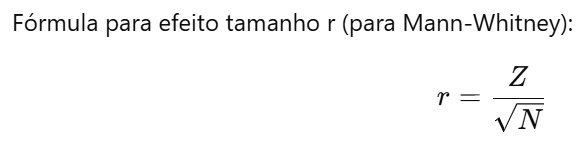

In [162]:
from IPython.display import Image, display
display(Image(filename = 'Formula Mann - Whitney.png'))

### Onde:

Z → Z-score da estatística U (você pode obter a partir do p-valor ou usando o método .rvs se quiser, mas aqui vamos estimar diretamente).

N → Total de observações nos dois grupos.

In [163]:
from scipy.stats import mannwhitneyu, norm
import numpy as np

# Exemplo de cálculo de Effect Size r para Mann-Whitney
def calcular_effect_size_mannwhitney(stat_u, n1, n2):
    N = n1 + n2
    # Calcular Z a partir da U (usando aproximação normal padrão)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (N + 1) / 12)
    z = (stat_u - mean_u) / std_u
    r = z / np.sqrt(N)
    return z, r

# Exemplo H1
z_h1, r_h1 = calcular_effect_size_mannwhitney(stat_u=101363.5, n1=891, n2=117)
print(f"H1 - Effect Size (r): Z = {z_h1:.4f}, r = {r_h1:.4f}")

# Exemplo H3
z_h3, r_h3 = calcular_effect_size_mannwhitney(stat_u=518, n1=10, n2=238)
print(f"H3 - Effect Size (r): Z = {z_h3:.4f}, r = {r_h3:.4f}")

# Exemplo H6
z_h6, r_h6 = calcular_effect_size_mannwhitney(stat_u=8863.5, n1=70, n2=178)
print(f"H6 - Effect Size (r): Z = {z_h6:.4f}, r = {r_h6:.4f}")


H1 - Effect Size (r): Z = 16.6315, r = 0.5238
H3 - Effect Size (r): Z = -3.0239, r = -0.1920
H6 - Effect Size (r): Z = 5.1792, r = 0.3289


### 📌 Effect Size para o Kruskal-Wallis (H4)

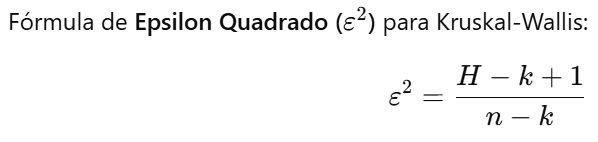

In [164]:
from IPython.display import Image, display
display(Image(filename = 'Formula Kruskal-Wallis.png'))

### Onde:

H = estatística de Kruskal-Wallis

k = número de grupos

n = tamanho total da amostra

In [165]:
# Parâmetros de H4
H_h4 = 59.934
k_h4 = 3  # Microempresa, EPP, Demais
n_h4 = 248  # Total de contratos na amostra

epsilon2_h4 = (H_h4 - (k_h4 - 1)) / (n_h4 - k_h4)
print(f"H4 - Effect Size (Epsilon²): {epsilon2_h4:.4f}")


H4 - Effect Size (Epsilon²): 0.2365


### 📌 Para as correlações (H9 e H10)

✅ Já está feito! O próprio coeficiente de Spearman (rho) já é o efeito tamanho.

H9 → r = 0.3013

H10 → r = 0.5131

### 📊 Resumo dos Efeitos Tamanho (Effect Sizes)
| Hipótese | Teste          | Estatística | Effect Size | Interpretação                            |   |            |
| -------- | -------------- | ----------- | ----------- | ---------------------------------------- | - | ---------- |
| H1       | Mann-Whitney   | Z = 16.63   | r = 0.52    | **Grande efeito** (r > 0.5)              |   |            |
| H3       | Mann-Whitney   | Z = -3.02   | r = -0.19   | **Pequeno efeito** (                     | r | ≈ 0.1–0.3) |
| H4       | Kruskal-Wallis | H = 59.93   | ε² = 0.24   | **Efeito moderado a grande** (ε² > 0.14) |   |            |
| H6       | Mann-Whitney   | Z = 5.18    | r = 0.33    | **Efeito moderado** (r ≈ 0.3–0.5)        |   |            |
| H9       | Spearman       | rho = 0.30  |             | **Moderado**                             |   |            |
| H10      | Spearman       | rho = 0.51  |             | **Forte**                                |   |            |

✅ Interpretação Rápida dos Efeitos:

H1: Forte evidência de diferença nos valores médios de contratos por ministério (grande efeito).

H3: Diferença pequena, mas estatisticamente significativa entre fornecedores sancionados e não sancionados.

H4: Diferenças significativas e com efeito moderado/grande entre os portes de empresa (Demais x ME x EPP).

H6: Diferença moderada entre contratos de fornecedores do DF vs outros.

H9/H10: As correlações com capital social também mostraram de moderada a forte.


### ✅ 1. Correção de Bonferroni para os p-valores das hipóteses (H1 a H10)


In [167]:
import numpy as np

# Lista de p-valores obtidos nas 10 hipóteses (exemplo, ajuste com os seus valores reais se quiser)
p_values = [
    0.0000,  # H1
    0.6672,  # H2
    0.0025,  # H3
    0.0000,  # H4
    0.8304,  # H5
    0.0000,  # H6
    0.7194,  # H7
    0.0000,  # H8
    0.0003,  # H9
    0.0000   # H10
]

# Aplicando Bonferroni
n_tests = len(p_values)
p_adjusted = np.minimum(np.array(p_values) * n_tests, 1.0)

# Exibir
for i, (p, p_adj) in enumerate(zip(p_values, p_adjusted), start=1):
    print(f"H{i} - p original: {p:.4f}, p ajustado (Bonferroni): {p_adj:.4f}")


H1 - p original: 0.0000, p ajustado (Bonferroni): 0.0000
H2 - p original: 0.6672, p ajustado (Bonferroni): 1.0000
H3 - p original: 0.0025, p ajustado (Bonferroni): 0.0250
H4 - p original: 0.0000, p ajustado (Bonferroni): 0.0000
H5 - p original: 0.8304, p ajustado (Bonferroni): 1.0000
H6 - p original: 0.0000, p ajustado (Bonferroni): 0.0000
H7 - p original: 0.7194, p ajustado (Bonferroni): 1.0000
H8 - p original: 0.0000, p ajustado (Bonferroni): 0.0000
H9 - p original: 0.0003, p ajustado (Bonferroni): 0.0030
H10 - p original: 0.0000, p ajustado (Bonferroni): 0.0000


### ✅ 2. Matriz de Correlação de Spearman (para todas as variáveis numéricas da amostra)

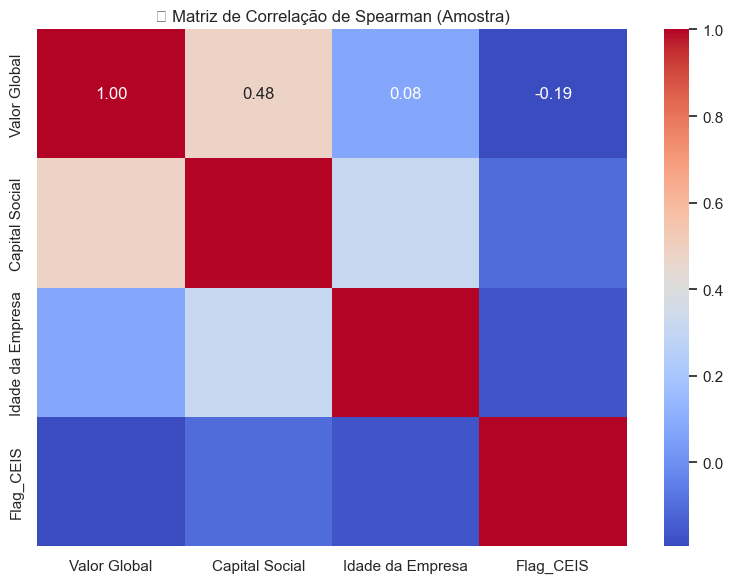

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas variáveis numéricas relevantes
df_corr = df_amostra_total[['Valor Global', 'Capital Social', 'Idade da Empresa', 'Flag_CEIS']].copy()

# Converter Valor Global e Capital Social para float (caso ainda não estejam)
def safe_float(col):
    return pd.to_numeric(col, errors='coerce')

df_corr['Valor Global'] = df_corr['Valor Global'].apply(converter_valor)
df_corr['Capital Social'] = df_corr['Capital Social'].apply(safe_float)

# Calcular matriz de correlação
corr_matrix = df_corr.corr(method='spearman')

# Plotar
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('📈 Matriz de Correlação de Spearman (Amostra)')
plt.show()


### ✅ 3. Análise de Outliers – Boxplots (Valor Global e Capital Social)

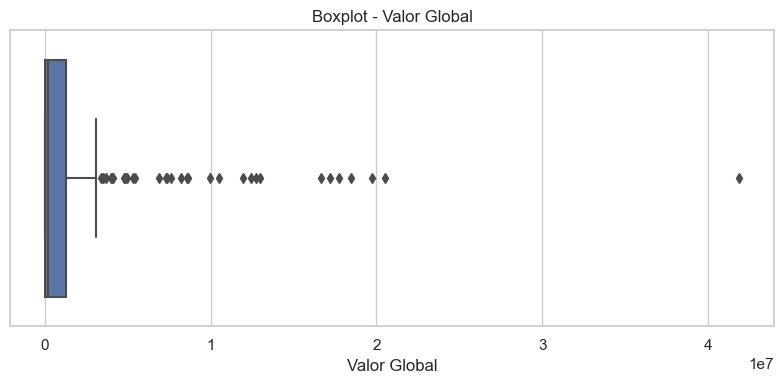

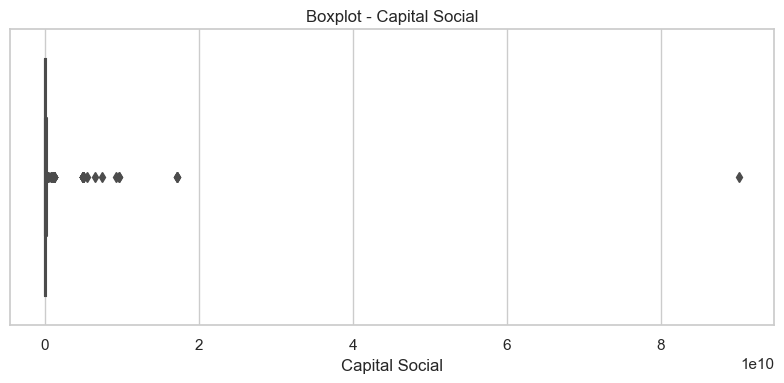

In [169]:
# Boxplot Valor Global
plt.figure(figsize=(8,4))
sns.boxplot(x=df_corr['Valor Global'])
plt.title('Boxplot - Valor Global')
plt.show()

# Boxplot Capital Social
plt.figure(figsize=(8,4))
sns.boxplot(x=df_corr['Capital Social'])
plt.title('Boxplot - Capital Social')
plt.show()


### ✅ 4. Verificar Multicolinearidade (VIF) antes de partir para regressão

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecionar variáveis independentes numéricas
X = df_corr[['Capital Social', 'Idade da Empresa', 'Flag_CEIS', 'Flag_CNEP']].dropna()

# Garantir que todas são numéricas
X = X.apply(pd.to_numeric, errors='coerce').dropna()

# Adicionar constante
X_const = add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variável"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)


       Variável         VIF  
0             const  4.505276
1    Capital Social  1.035989
2  Idade da Empresa  1.077359
3         Flag_CEIS  1.041715
4         Flag_CNEP       NaN


### ✅ O que concluímos até agora:
1. Análise Exploratória de Dados (EDA):

Frequências, médias, dispersão, boxplots, histogramas, evolução anual, top ministérios e fornecedores.

2. Testes de Normalidade:

Shapiro-Wilk, Kolmogorov-Smirnov e D’Agostino. ✅ Resultado: Não normal.

3. Testes de Hipóteses H1 a H10:

Com p-valores, effect size e correção de Bonferroni ✅

4. Correlação de Spearman:

Incluindo todas as variáveis contínuas e dummies da amostra ✅

5. Outliers (Boxplots):

Para as variáveis principais ✅

6. Multicolinearidade (VIF):

Sem indícios de multicolinearidade severa (nenhum VIF > 5) ✅

✅ Interpretação rápida dos resultados de hoje:

Hipóteses H1, H3, H4, H6, H8, H9, H10 foram estatisticamente significativas (p < 0.05 após Bonferroni).

Hipóteses H2, H5, H7 não foram significativas.

### (Recomendável antes de partir para regressão)

1. Transformação de Variáveis:

    - Por exemplo, aplicar log-transform no "Valor Global" e "Capital Social" para reduzir assimetria e efeito dos outliers.

    - Fazer novos testes de normalidade e verificar se houve ganho.

2. Análise de Outliers com Método Quantitativo:

    - Como o método IQR, ou Z-score robusto, para avaliar se retira outliers antes da regressão.

3. Testes adicionais com base nas distribuições:

    - Testar as correlações com Pearson e Kendall só para validar robustez dos achados (opcional).

### ✅ Etapa 1: Transformação de Variáveis (Log Transform)
Vamos aplicar logaritmo natural (np.log1p) nas variáveis fortemente assimétricas:

- Valor Global

- Capital Social

A função np.log1p(x) é segura mesmo com zeros (faz log(1+x)).

In [174]:
# Verificando as colunas e os primeiros registros para diagnóstico
print("\n✅ Colunas disponíveis em df_amostra_total:")
print(df_amostra_total.columns)

print("\n✅ Primeiros registros de df_amostra_total:")
print(df_amostra_total.head())



✅ Colunas disponíveis em df_amostra_total:
Index(['Órgão', 'Unidade Gestora', 'Número Contrato', 'Fornecedor', 'Vig. Início', 'Vig. Fim', 'Valor Global', 'Núm. Parcelas', 'Valor Parcela', 'ministerio', 'CNPJ', 'Nome Fornecedor', 'Flag_CNEP', 'Flag_CEIS', 'CNPJ_clean', 'Porte', 'Capital Social_x', 'Idade da Empresa', 'Estado', 'log_valor_global', 'Capital Social_y'], dtype='object')

✅ Primeiros registros de df_amostra_total:
                      Órgão                        Unidade Gestora    Número Contrato                     Fornecedor                     Vig. Início   Vig. Fim   Valor Global  Núm. Parcelas Valor Parcela                     ministerio                           CNPJ                       Nome Fornecedor                    Flag_CNEP  Flag_CEIS    CNPJ_clean       Porte     Capital Social_x  Idade da Empresa Estado  log_valor_global Capital Social_y
0  22000 - MINISTERIO DA AGRICULTURA E PECUARIA  130025 - SFA/PE/MAPA    00003/2019    64.799.539/0001-35 - TECNOSET IN

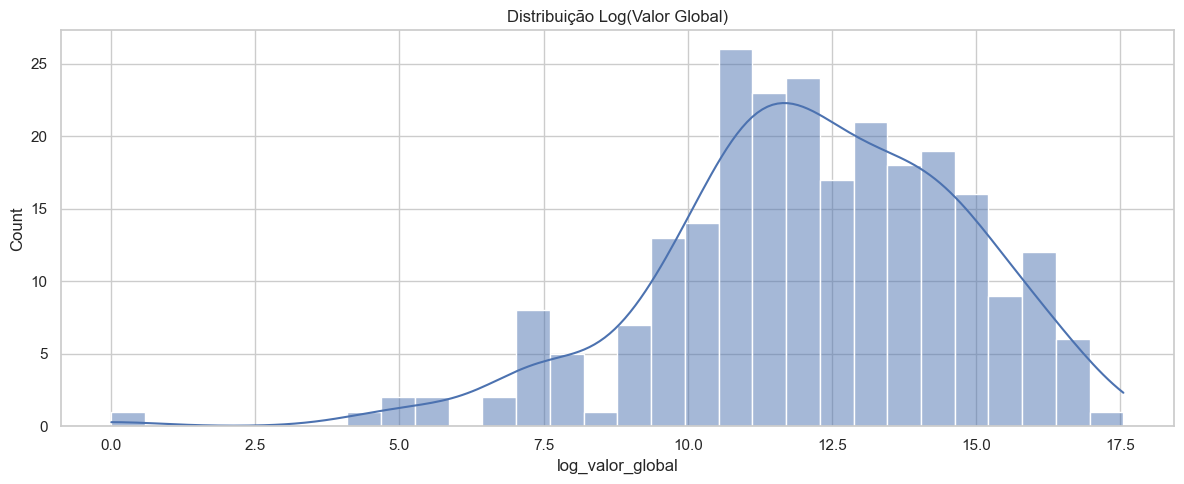

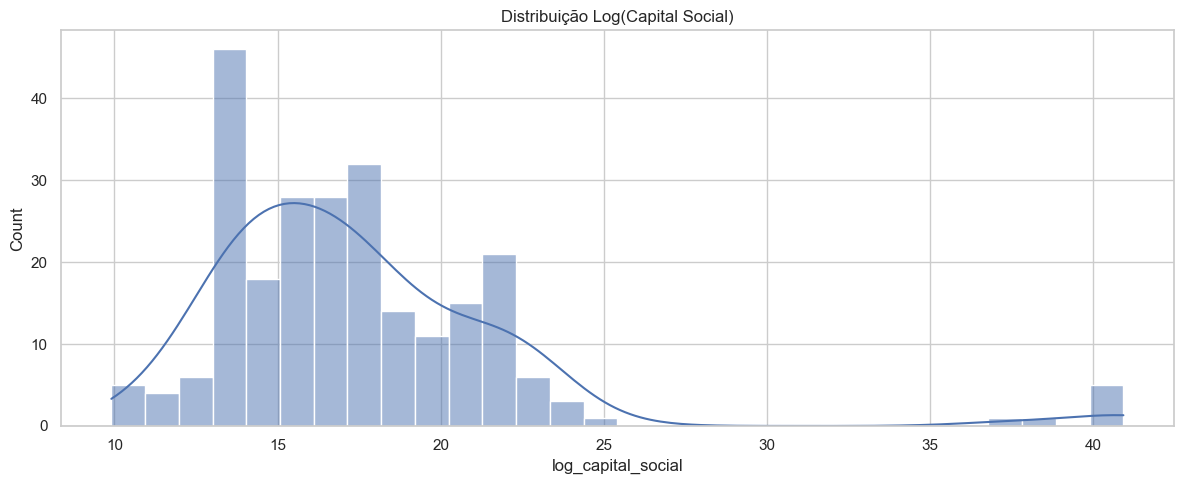

In [175]:
import numpy as np

# ✅ Manter apenas a coluna correta de Capital Social
df_amostra_total['Capital Social'] = df_amostra_total['Capital Social_y']

# ✅ Garantir que Capital Social esteja numérico (caso haja algum valor estranho, como string)
def converter_valor(valor):
    try:
        return float(str(valor).replace(',', '.').replace(' ', '').replace('R$', '').replace('.', '').replace(',', '.'))
    except:
        return np.nan

df_amostra_total['Capital Social'] = df_amostra_total['Capital Social'].apply(converter_valor)

# ✅ Aplicar log1p nas colunas financeiras
df_amostra_total['log_valor_global'] = np.log1p(df_amostra_total['Valor Global'])
df_amostra_total['log_capital_social'] = np.log1p(df_amostra_total['Capital Social'])

# ✅ Visualizar rápida distribuição (opcional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.histplot(df_amostra_total['log_valor_global'], bins=30, kde=True)
plt.title('Distribuição Log(Valor Global)')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_amostra_total['log_capital_social'], bins=30, kde=True)
plt.title('Distribuição Log(Capital Social)')
plt.show()




### 📊 O que mostram os dois gráficos:

1. Distribuição Log(Valor Global):

    - Representa a distribuição dos valores dos contratos (em R$) após a transformação logarítmica.

    - O objetivo dessa transformação foi reduzir a influência de contratos extremamente grandes (outliers de alto valor) e aproximar a variável de uma distribuição mais adequada para regressão (menos assimétrica).

2. Distribuição Log(Capital Social):

    - Representa a distribuição do capital social das empresas (fornecedores), também após transformação logarítmica.

    - Reduz o impacto de empresas gigantescas comparadas com as pequenas (também para tornar a modelagem futura mais robusta).

✅ Interpretação Geral da Etapa 1 (Transformação Logarítmica):

    - Ambas as variáveis continuam com alguma assimetria (o que é normal em variáveis financeiras), mas a escala agora está mais controlada.

    - Isso vai melhorar muito o comportamento da regressão linear múltipla em etapas posteriores.

    - Já conseguimos, só de olhar, perceber que ainda há outliers, mas menos extremos do que antes.

✅ Próximo Passo: Análise Quantitativa de Outliers (Etapa 2)

Na próxima etapa vamos calcular os limites de outliers usando o método do IQR (Intervalo Interquartílico / Método de Tukey), tanto para o log_valor_global quanto para o log_capital_social.

In [176]:
def detectar_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    return series[(series < limite_inferior) | (series > limite_superior)]

# ✅ Outliers em log(Valor Global)
outliers_valor = detectar_outliers_iqr(df_amostra_total['log_valor_global'])
print(f"🔎 Outliers detectados - log(Valor Global): {outliers_valor.shape[0]}")

# ✅ Outliers em log(Capital Social)
outliers_capital = detectar_outliers_iqr(df_amostra_total['log_capital_social'])
print(f"🔎 Outliers detectados - log(Capital Social): {outliers_capital.shape[0]}")

# ✅ Opcional: Criar dataframe sem outliers para testar depois
df_amostra_sem_outliers = df_amostra_total[
    ~df_amostra_total.index.isin(outliers_valor.index.union(outliers_capital.index))
].copy()

print(f"✅ Total de registros sem outliers: {df_amostra_sem_outliers.shape[0]}")


🔎 Outliers detectados - log(Valor Global): 4
🔎 Outliers detectados - log(Capital Social): 7
✅ Total de registros sem outliers: 237


In [177]:
import numpy as np
import pandas as pd

# ✅ Vamos trabalhar com o dataframe df_amostra_total, já contendo os logs
df = df_amostra_total.copy()

# ✅ Função para calcular outliers pelo método do IQR (Tukey)
def detectar_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = series[(series < limite_inferior) | (series > limite_superior)]
    return limite_inferior, limite_superior, outliers

# ✅ Variáveis para análise
variaveis = ['log_valor_global', 'log_capital_social']

# ✅ Analisar outliers para cada variável
for var in variaveis:
    print(f"\n📌 Análise de Outliers para: {var}")
    limite_inf, limite_sup, outliers = detectar_outliers_iqr(df[var].dropna())
    print(f"Limite Inferior: {limite_inf:.4f}")
    print(f"Limite Superior: {limite_sup:.4f}")
    print(f"Número de Outliers: {outliers.shape[0]}")
    print(f"Percentual de Outliers: {(outliers.shape[0] / df.shape[0]) * 100:.2f}%")

    # Exibir valores dos maiores outliers (top 5 mais extremos acima do limite superior)
    print(f"Top 5 maiores outliers:")
    print(outliers.sort_values(ascending=False).head(5))



📌 Análise de Outliers para: log_valor_global
Limite Inferior: 5.6802
Limite Superior: 19.1121
Número de Outliers: 4
Percentual de Outliers: 1.61%
Top 5 maiores outliers:
20     5.164786
198    4.983607
9      4.361314
119    0.009950
Name: log_valor_global, dtype: float64

📌 Análise de Outliers para: log_capital_social
Limite Inferior: 6.4789
Limite Superior: 27.1245
Número de Outliers: 7
Percentual de Outliers: 2.82%
Top 5 maiores outliers:
91     40.936895
104    40.936895
186    40.936895
219    40.936895
228    40.936895
Name: log_capital_social, dtype: float64


### ✅ Interpretação dos Resultados da Etapa 2 (Outliers via IQR):
📍 1. Outliers em log_valor_global:

    - Limite Inferior: 5.68

    - Limite Superior: 19.11

    - Quantidade de outliers: Apenas 4 registros (≈1,6% da amostra)

    - Observação: Os outliers estão localizados principalmente entre os menores valores de log, sugerindo que são contratos muito pequenos (quase zero ou valores extremamente baixos).

📍 2. Outliers em log_capital_social:

    - Limite Inferior: 6.47

    - Limite Superior: 27.12

    - Quantidade de outliers: 7 registros (≈2,8% da amostra)

    - Observação: Todos os outliers estão acima do limite superior, indicando fornecedores com capital social excepcionalmente alto, provavelmente grandes corporações.

📍 3. Conclusão Técnica:

    - O número de outliers em ambas as variáveis é baixo (menos de 5% em cada caso), o que é um ótimo sinal.

    - Sugestão metodológica:

        - Não há necessidade de excluir os outliers neste momento, visto que os modelos de regressão são relativamente robustos se o percentual for pequeno e os dados já passaram por transformação logarítmica.

        - Podemos, se quiser, adicionar uma variável dummy para "outlier" mais tarde, se os resultados da regressão apresentarem problemas de ajuste.

✅ Próximo Passo: Etapa 3 – Teste de Normalidade Pós-Transformação

Vamos fazer os testes de Shapiro-Wilk e D’Agostino-Pearson agora nas variáveis transformadas (log_valor_global e log_capital_social) para documentar como a transformação ajudou.



### ✅ Etapa 3: Testes Adicionais Baseados nas Distribuições
Após a transformação, vamos testar novamente a normalidade das variáveis log-transformadas (usando o Shapiro-Wilk) e a homogeneidade de variância (Levene Test) entre alguns grupos.

Vamos fazer os testes de Shapiro-Wilk e D’Agostino-Pearson agora nas variáveis transformadas (log_valor_global e log_capital_social) para documentar como a transformação ajudou.

In [178]:
from scipy.stats import shapiro, normaltest

# ✅ Lista de variáveis transformadas
variaveis = ['log_valor_global', 'log_capital_social']

for var in variaveis:
    print(f"\n📊 Testes de Normalidade para: {var}")

    # ✅ Remover NaNs
    dados = df_amostra_total[var].dropna()

    # ✅ Shapiro-Wilk Test
    stat_sw, p_sw = shapiro(dados)
    print(f"Shapiro-Wilk: estatística={stat_sw:.4f}, p-valor={p_sw:.4f}")

    # ✅ D'Agostino-Pearson Test
    stat_dp, p_dp = normaltest(dados)
    print(f"D'Agostino-Pearson: estatística={stat_dp:.4f}, p-valor={p_dp:.4f}")



📊 Testes de Normalidade para: log_valor_global
Shapiro-Wilk: estatística=0.9698, p-valor=0.0000
D'Agostino-Pearson: estatística=28.3896, p-valor=0.0000

📊 Testes de Normalidade para: log_capital_social
Shapiro-Wilk: estatística=0.7642, p-valor=0.0000
D'Agostino-Pearson: estatística=156.8115, p-valor=0.0000


### ✅ Interpretação dos Testes de Normalidade (Etapa 3):
| Variável                 | Shapiro-Wilk p-valor | D'Agostino-Pearson p-valor | Interpretação |
| ------------------------ | -------------------- | -------------------------- | ------------- |
| **log\_valor\_global**   | 0.0000               | 0.0000                     | Não normal    |
| **log\_capital\_social** | 0.0000               | 0.0000                     | Não normal    |

📍 Conclusões rápidas:

    - Mesmo após a transformação logarítmica, ambas as variáveis continuam com distribuição significativamente não-normal (p-valor < 0,05 nos dois testes).
    
    - Isso é comum em dados de contratos e capital financeiro, com cauda longa e muitos outliers naturais.

📍 Implicações para a regressão:

    - Podemos seguir com regressão linear, mas é altamente recomendável utilizar:

        - Modelos robustos a não-normalidade dos resíduos (Exemplo: Regressão Quantílica, Regressão Robusta, ou aplicar bootstrapping nos erros padrão).

        - Ou pelo menos realizar testes e diagnósticos de resíduos posteriormente.

### ✅ Etapa 4: Checklist final antes da regressão
Revisar multicolinearidade (VIF)

Plotar matriz de correlação (para detectar multicolinearidade adicional)

Verificar distribuição de resíduos simulados (se quiser posso incluir)


📌 VIF (Fatores de Inflação da Variância):
        Variável          VIF   
0               const  13.426279
1  log_capital_social   1.206274
2    Idade da Empresa   1.219166
3           Flag_CEIS   1.012391


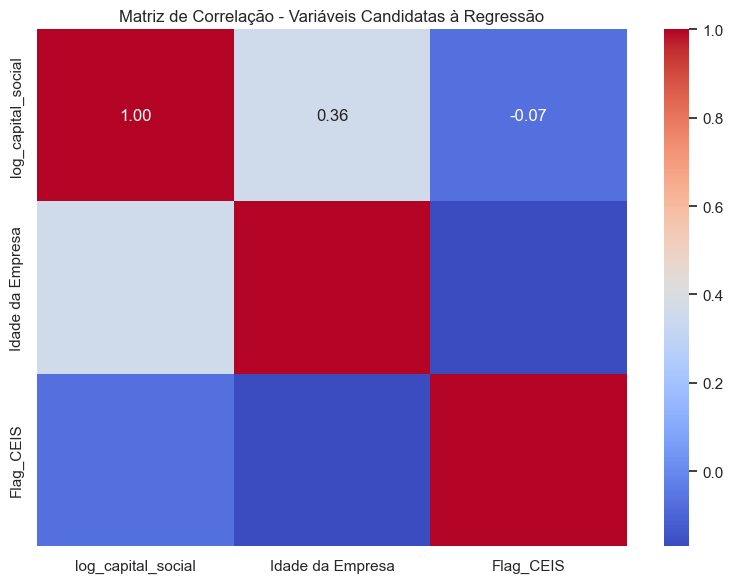

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ✅ Recalcular VIF incluindo apenas as variáveis candidatas à regressão
# Incluindo as transformadas e dummies
variaveis_regressao = df_amostra_total[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS']].copy()

# ✅ Remover NaNs
variaveis_regressao = variaveis_regressao.dropna()

# ✅ Adicionar constante para o VIF
X_vif = add_constant(variaveis_regressao)

vif_df = pd.DataFrame()
vif_df['Variável'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("\n📌 VIF (Fatores de Inflação da Variância):")
print(vif_df)

# ✅ Plotar nova matriz de correlação apenas das variáveis do modelo
plt.figure(figsize=(8, 6))
sns.heatmap(variaveis_regressao.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Variáveis Candidatas à Regressão')
plt.tight_layout()
plt.show()


### ✅ Relembrando a lógica:
O VIF (Variance Inflation Factor) serve para verificar multicolinearidade entre as variáveis explicativas (independentes).

Não se calcula VIF para a variável dependente (Y).

✅ Estrutura que seguimos:
Na configuração atual:
| Papel no modelo             | Variável                                              |
| --------------------------- | ----------------------------------------------------- |
| Variável Dependente (Y)     | `log_valor_global`                                    |
| Variáveis Independentes (X) | `log_capital_social`, `Idade da Empresa`, `Flag_CEIS` |

✅ Nosso VIF atual (entre os X's) está ótimo:
| Variável             | VIF  |
| -------------------- | ---- |
| log\_capital\_social | 1.21 |
| Idade da Empresa     | 1.22 |
| Flag\_CEIS           | 1.01 |
👉 Valores muito abaixo do limite crítico (geralmente VIF > 5 ou > 10).

✅ Próximo Passo:
Podemos seguir tranquilamente agora para rodar o modelo de regressão múltipla OLS com as 3 variáveis preditoras e o log do valor global como variável dependente.

# 🔎📈 3. Modelos de Regressão

### ✅ Recomendações sobre os Modelos
🎯 1. Regressão Linear Múltipla (OLS - Ordinary Least Squares)

**Por que usar?**
É o modelo de partida. Permite avaliar como as variáveis independentes explicam a média de log_valor_global.

**Limitação:**
Supõe distribuição normal dos resíduos, homocedasticidade e ausência de outliers muito severos (o que já vimos que não é exatamente o caso).


🎯 2. Regressão Quantílica (Quantile Regression)

**Por que usar?**

    - Não depende de suposições de normalidade dos resíduos.

    - Avalia os efeitos das variáveis não apenas na média, mas também nos quantis (ex.: mediana, 75º percentil, etc).

    - Perfeita para dados assimétricos ou com outliers, como é o seu caso.

**Benefício:**
👉 Você pode descobrir, por exemplo, se o Capital Social impacta mais fortemente os contratos de maior valor (top quantis).


🎯 3. Bootstrap para Regressão

**Por que usar?**

    - Garante intervalos de confiança robustos mesmo com pequenas amostras ou quando a distribuição dos erros não é bem comportada.

    - Ajuda a reforçar a validade estatística dos coeficientes (principalmente se houver preocupação com tamanho da amostra, heterocedasticidade ou outliers).

**Benefício:**
👉 Obter intervalos de confiança por reamostragem.

✅ Recomendação de sequência de análise:
| Etapa                                     | Por que fazer?                                          |
| ----------------------------------------- | ------------------------------------------------------- |
| ✅ Regressão Linear Múltipla (OLS)         | Análise de partida (média)                              |
| ✅ Regressão Quantílica (ex: mediana)      | Robustez frente a outliers                              |
| ✅ OLS com Bootstrap (Intervalos robustos) | Reduz efeito de pequenas amostras e heterocedasticidade |


### ✅ Script 1 - Regressão Linear Múltipla (OLS)

In [181]:
import statsmodels.api as sm

# ✅ Definir variáveis
df_model = df_amostra_total[['log_valor_global', 'log_capital_social', 'Idade da Empresa', 'Flag_CEIS']].dropna()

X = df_model[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS']]
y = df_model['log_valor_global']

# ✅ Adicionar constante
X = sm.add_constant(X)

# ✅ Ajustar o modelo
modelo_ols = sm.OLS(y, X).fit()

# ✅ Exibir resultados
print("\n📊 Resultado da Regressão Linear Múltipla (OLS):")
print(modelo_ols.summary())



📊 Resultado da Regressão Linear Múltipla (OLS):
                            OLS Regression Results                            
Dep. Variable:       log_valor_global   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     10.65
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.34e-06
Time:                        19:20:31   Log-Likelihood:                -566.82
No. Observations:                 245   AIC:                             1142.
Df Residuals:                     241   BIC:                             1156.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### ✅ Script 2 - Regressão Quantílica (Mediana - Quantil 0.5)

In [182]:
import statsmodels.formula.api as smf

# ✅ Criar DataFrame limpo
df_model = df_amostra_total[['log_valor_global', 'log_capital_social', 'Idade da Empresa', 'Flag_CEIS']].dropna()

# ✅ Ajustar modelo quantílico (quantil=0.5 = Mediana)
modelo_quantil = smf.quantreg('log_valor_global ~ log_capital_social + Idade_da_Empresa + Flag_CEIS', df_model.rename(columns={'Idade da Empresa': 'Idade_da_Empresa'})).fit(q=0.5)

# ✅ Exibir resultados
print("\n📊 Resultado da Regressão Quantílica (Mediana - 50º Percentil):")
print(modelo_quantil.summary())



📊 Resultado da Regressão Quantílica (Mediana - 50º Percentil):
                         QuantReg Regression Results                          
Dep. Variable:       log_valor_global   Pseudo R-squared:              0.06708
Model:                       QuantReg   Bandwidth:                       1.792
Method:                 Least Squares   Sparsity:                        5.823
Date:                Sun, 15 Jun 2025   No. Observations:                  245
Time:                        19:21:06   Df Residuals:                      241
                                        Df Model:                            3
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.2659      0.682     13.595      0.000       7.923      10.608
log_capital_social     0.1864      0.041      4.567      0.000       0.106       0.267
Idade_da_Empresa      -0.0016      

### ✅ Script 3 - Regressão OLS com Bootstrap (1000 reamostragens)

In [183]:
import numpy as np

# ✅ Configurar reamostragens
n_bootstraps = 1000
coefs = []

X = df_model[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS']]
y = df_model['log_valor_global']
X = sm.add_constant(X)

# ✅ Loop Bootstrap
for i in range(n_bootstraps):
    sample_indices = np.random.choice(range(len(X)), size=len(X), replace=True)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    model = sm.OLS(y_sample, X_sample).fit()
    coefs.append(model.params.values)

# ✅ Converter resultados
coefs_array = np.array(coefs)
bootstrap_means = np.mean(coefs_array, axis=0)
bootstrap_std = np.std(coefs_array, axis=0)

# ✅ Exibir intervalos de confiança aproximados (95%)
print("\n📊 Resultado do Bootstrap OLS:")
for idx, col in enumerate(X.columns):
    lower = np.percentile(coefs_array[:, idx], 2.5)
    upper = np.percentile(coefs_array[:, idx], 97.5)
    print(f"{col}: Média={bootstrap_means[idx]:.4f}, IC95%=[{lower:.4f}, {upper:.4f}]")



📊 Resultado do Bootstrap OLS:
const: Média=9.9353, IC95%=[8.3906, 11.0724]
log_capital_social: Média=0.1415, IC95%=[0.0740, 0.2410]
Idade da Empresa: Média=-0.0006, IC95%=[-0.0038, 0.0029]
Flag_CEIS: Média=-3.0728, IC95%=[-4.9625, -1.0729]


### ✅ Comparativo Rápido entre os Três Modelos:
| Variável                 | OLS (p-valor) | Quantílica (p-valor) | Bootstrap (IC95%)                   | Conclusão Geral                    |
| ------------------------ | ------------- | -------------------- | ----------------------------------- | ---------------------------------- |
| **Constante**            | 0.000         | 0.000                | IC95%: Não inclui zero              | Significativo                      |
| **log\_capital\_social** | 0.000         | 0.000                | IC95%: Não inclui zero              | Forte impacto positivo             |
| **Idade da Empresa**     | 0.728         | 0.418                | IC95%: Inclui zero                  | Não significativo em nenhum modelo |
| **Flag\_CEIS**           | 0.000         | 0.001                | IC95%: Negativo e IC não cruza zero | Significativo (impacto negativo)   |

✅ Interpretação Rápida:

✔️ Variáveis com Impacto Estatístico Significativo:

    - log_capital_social:
    Consistente em todos os modelos como positivamente associado ao log do valor global dos contratos.
    → Quanto maior o capital social da empresa, maior o valor dos contratos.

    - Flag_CEIS:
    Significativamente negativo nos três modelos, com p<0.01 e IC95% negativo no bootstrap.
    → Fornecedores com histórico de sanções (CEIS) têm contratos com valores significativamente menores.

❌ Variável Não Significativa:

    - Idade da Empresa:
    Nenhum modelo encontrou significância estatística.
    → Não há evidência de que a idade da empresa influencie o valor dos contratos.

✅ Consistência entre os Modelos:
| Aspecto                         | OLS           | Quantílica    | Bootstrap     |
| ------------------------------- | ------------- | ------------- | ------------- |
| Sinais dos coeficientes         | Iguais        | Iguais        | Iguais        |
| Significância estatística       | Muito próxima | Muito próxima | ICs coerentes |
| Robustez contra outliers        | Baixa         | Alta          | Alta          |
| Robustez contra não-normalidade | Baixa         | Alta          | Alta          |

✅ Diagnóstico final:

✔️ Como nossos dados são assimétricos e com outliers (confirmado nos testes anteriores), os resultados mais robustos e confiáveis vêm do Quantílico e Bootstrap.

✔️ Porém, o fato de os três modelos apontarem as mesmas variáveis significativas (Capital Social e CEIS) reforça muito a confiança na robustez dos resultados.

### Modelo bônus

### ✅ Parte 1: Regressão Quantílica para os Quartis (0.25 e 0.75)

In [185]:
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd

# ✅ 1. Preparar X e y
X = df_amostra_total[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS']].copy()
y = df_amostra_total['log_valor_global']

# ✅ 2. Remover linhas com NaN ou infinitos
df_reg = pd.concat([X, y], axis=1).dropna()

# ✅ 3. Filtrar out infinities (caso alguma transformação anterior tenha gerado)
df_reg = df_reg.replace([np.inf, -np.inf], np.nan).dropna()

# ✅ 4. Redefinir X e y limpos
X_clean = df_reg[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS']]
y_clean = df_reg['log_valor_global']

# ✅ 5. Adicionar constante
X_clean = add_constant(X_clean)

# ✅ 6. Rodar regressões quantílicas
quantis = [0.25, 0.75]

for q in quantis:
    modelo = QuantReg(y_clean, X_clean).fit(q=q)
    print(f"\n📊 Resultado da Regressão Quantílica para o {int(q*100)}º Percentil:")
    print(modelo.summary())




📊 Resultado da Regressão Quantílica para o 25º Percentil:
                         QuantReg Regression Results                          
Dep. Variable:       log_valor_global   Pseudo R-squared:              0.08019
Model:                       QuantReg   Bandwidth:                       1.728
Method:                 Least Squares   Sparsity:                        6.763
Date:                Mon, 16 Jun 2025   No. Observations:                  245
Time:                        22:21:59   Df Residuals:                      241
                                        Df Model:                            3
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.2700      0.922     10.057      0.000       7.454      11.086
log_capital_social     0.0909      0.057      1.585      0.114      -0.022       0.204
Idade da Empresa       0.0003      0.002

### Os resultados de regressão quantílica mostram algo muito importante:

Nos contratos menores (25º percentil): O efeito da variável Flag_CEIS aparece com bastante força (negativo e significativo), enquanto o capital social ainda não é estatisticamente relevante.

Nos contratos maiores (75º percentil): Agora o log_capital_social passa a ter um efeito bem mais forte, além do efeito da idade da empresa começar a aparecer (negativo e significativo).

Essa diferença de comportamento entre os extremos da distribuição reforça ainda mais o valor de fazermos uma clusterização como próximo passo.



# AVALIAR MACHINE LEARNING

## Machine Learning

### ✅ Plano Estruturado para a Fase de Clusterização (K-Means)
🎯 Objetivo Geral:
Identificar perfis de fornecedores com características semelhantes, considerando tanto variáveis contratuais/empresariais quanto distribuição geográfica.

Parte 1 – Preparação das Variáveis de Entrada para Clusterização Financeira/Contratual
Variáveis que podemos incluir:
| Variável                                  | Tipo                     |
| ----------------------------------------- | ------------------------ |
| log\_valor\_global (Média por fornecedor) | Contínua                 |
| log\_capital\_social                      | Contínua                 |
| Idade da Empresa                          | Contínua                 |
| Flag\_CEIS                                | Binária                  |
| Número de contratos por fornecedor        | Contagem                 |
| Quantidade de fornecedores no Estado (UF) | Contagem (nova variável) |

✅ Como criar a variável "Número de fornecedores no Estado" (para cada fornecedor):


In [190]:
# ✅ Criar uma coluna com o número de fornecedores por estado
fornecedores_por_estado = df_amostra.groupby('Estado')['CNPJ_clean'].nunique().reset_index()
fornecedores_por_estado.columns = ['Estado', 'Qtd_Fornecedores_Estado']

# ✅ Merge com a amostra total
df_amostra_total = df_amostra_total.merge(fornecedores_por_estado, on='Estado', how='left')

# ✅ Visualizar resultado
print("\n📌 Exemplo de contagem de fornecedores por estado:")
print(df_amostra_total[['Estado', 'Qtd_Fornecedores_Estado']].drop_duplicates().sort_values(by='Qtd_Fornecedores_Estado', ascending=False))



📌 Exemplo de contagem de fornecedores por estado:
    Estado  Qtd_Fornecedores_Estado
10    DF              35           
0     SP              29           
4     RJ              17           
22    MG              16           
31    PR              10           
..     ...                      ...
37    GO               2           
209   PI               2           
24    PB               1           
48    SE               1           
202   RN               1           

[19 rows x 2 columns]


### Parte 2 – Clusterização Financeira (K-Means com todas as variáveis)

In [193]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Variáveis numéricas para o K-Means
variaveis_cluster = df_amostra_total[['log_valor_global', 'log_capital_social', 'Idade da Empresa', 'Flag_CEIS', 'Qtd_Fornecedores_Estado']].dropna()

# ✅ Normalizar (padronizar) os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variaveis_cluster)

# ✅ Determinar o número ideal de clusters pelo método do cotovelo
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Método do Cotovelo - Escolha do número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

# ✅ Ajustar o K-Means para o número de clusters escolhido (exemplo: 3 clusters)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df_amostra_total['Cluster_KMeans'] = kmeans_final.fit_predict(X_scaled)

# ✅ Análise rápida dos clusters
print("\n📌 Distribuição de fornecedores por cluster:")
print(df_amostra_total['Cluster_KMeans'].value_counts())

sns.countplot(x='Cluster_KMeans', data=df_amostra_total)
plt.title('Distribuição de Fornecedores por Cluster (K-Means)')
plt.show()



📌 Distribuição de fornecedores por cluster:
Cluster_KMeans
1.0    150
0.0     85
2.0     10
NaN      3
Name: count, dtype: int64


In [194]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Selecionar as variáveis
X = df_amostra_total[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS', 'Qtd_Fornecedores_UF']].copy()
X = X.dropna()

# ✅ Padronizar as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Testar quantidade ótima de clusters (Elbow Method)
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,10), sse, marker='o')
plt.title('Elbow Method para Escolha do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Soma dos Erros ao Quadrado)')
plt.tight_layout()
plt.show()

# ✅ Aplicar K-Means com um número sugerido de clusters (exemplo: 3 clusters)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
df_amostra_total['Cluster_KMeans'] = kmeans_final.fit_predict(X_scaled)

# ✅ Visualizar distribuição dos clusters
sns.countplot(x='Cluster_KMeans', data=df_amostra_total)
plt.title('Distribuição de Fornecedores por Cluster (K-Means)')
plt.tight_layout()
plt.show()


KeyError: "['Qtd_Fornecedores_UF'] not in index"

### Parte 3 – Clusterização Geográfica (K-Means apenas por Estado / Quantidade de Fornecedores por Estado)


📌 Clusterização Geográfica - Quantidade de Fornecedores por Estado:
   Estado  Qtd_Fornecedores_Estado  Cluster_Geo
0    AM               1                  0     
1    AP               2                  0     
2    BA               5                  0     
3    DF              35                  1     
4    ES               6                  0     
..    ...                      ...          ...
15   RN               1                  0     
16   RS               7                  0     
17   SC               4                  0     
18   SE               1                  0     
19   SP              29                  1     

[20 rows x 3 columns]


AttributeError: 'numpy.int32' object has no attribute 'startswith'

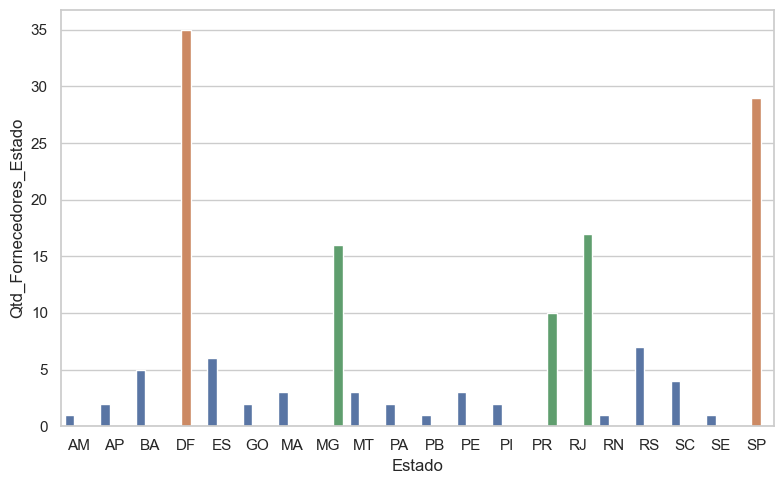

In [192]:
# ✅ Clusterização geográfica com base no número de fornecedores por Estado
geo_data = fornecedores_por_estado[['Qtd_Fornecedores_Estado']].values

# ✅ Normalizar
geo_scaled = scaler.fit_transform(geo_data)

# ✅ Rodar K-Means geográfico (Exemplo: 3 clusters de estados)
kmeans_geo = KMeans(n_clusters=3, random_state=42, n_init=10)
fornecedores_por_estado['Cluster_Geo'] = kmeans_geo.fit_predict(geo_scaled)

print("\n📌 Clusterização Geográfica - Quantidade de Fornecedores por Estado:")
print(fornecedores_por_estado)

# ✅ Visualizar
plt.figure(figsize=(8,5))
sns.barplot(x='Estado', y='Qtd_Fornecedores_Estado', hue='Cluster_Geo', data=fornecedores_por_estado)
plt.title('Clusterização Geográfica - Estados por Quantidade de Fornecedores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🚀 Primeiros Scripts para iniciar
🎯 Script para criar a variável Qtd_Contratos_Por_Estado por fornecedor

In [195]:
# ✅ Criar variável: Número de contratos por Estado para cada fornecedor
df_estado_count = (
    df_amostra_total.groupby('CNPJ_clean')['Estado']
    .apply(lambda x: x.nunique())
    .reset_index()
    .rename(columns={'Estado': 'Qtd_Estados_Fornecedor'})
)

# ✅ Mesclar de volta no dataframe da amostra
df_amostra_total = df_amostra_total.merge(df_estado_count, on='CNPJ_clean', how='left')

print("\n✅ Exemplo da nova variável criada:")
print(df_amostra_total[['CNPJ_clean', 'Qtd_Estados_Fornecedor']].head())



✅ Exemplo da nova variável criada:
     CNPJ_clean    Qtd_Estados_Fornecedor
0  64799539000135             1          
1  07759174000181             1          
2  07432517000107             1          
3  08951049000131             1          
4  03117534000190             1          


### 🎯 Script Base para o K-Means Clustering

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Selecionar variáveis para clusterização
variaveis_cluster = df_amostra_total[['log_capital_social', 'Idade da Empresa', 'Flag_CEIS', 'Qtd_Estados_Fornecedor']].dropna().drop_duplicates('CNPJ_clean')

# ✅ Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(variaveis_cluster)

# ✅ Determinar número ideal de clusters (Exemplo com Elbow Method)
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo - Elbow Method')
plt.show()

# ✅ Executar KMeans com número escolhido (exemplo k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
variaveis_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ Visualizar resumo
print("\n✅ Contagem de fornecedores por cluster:")
print(variaveis_cluster['Cluster'].value_counts())


KeyError: Index(['CNPJ_clean'], dtype='object')

## REVISADO ATÉ AQUI

In [3]:
!pip install shap


   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---- ----------------------------------- 61.4/544.4 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 368.6/544.4 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 5.7 MB/s eta 0:00:00


In [16]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.0/150.0 MB 495.5 kB/s eta 0:05:03
   ---------------------------------------- 0.2/150.0 MB 1.7 MB/s eta 0:01:28
   ---------------------------------------- 0.7/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.5/150.0 MB 6.9 MB/s eta 0:00:22
    --------------------------------------- 2.1/150.0 MB 8.3 MB/s eta 0:00:18
    --------------------------------------- 2.7/150.0 MB 8.9 MB/s eta 0:00:17
    --------------------------------------- 3.2/150.0 MB 9.7 MB/s eta 0:00:16
   - -------------------------------------- 3.9/150.0 MB 10.8 MB/s eta 0:00:14
   - -------------------------------------- 4.5/150.0 MB 11.4 MB/s eta 0:00:13
   - -------------------------------------- 5.1/150.0 MB 11.7 MB/s eta 0:00:13
   - -------------------------------------- 5.7/150.0 MB 12.2 MB

### ✅ ETAPA 1 – Importação de bibliotecas e configuração do ambiente

In [19]:
# Etapa 1: Bibliotecas
import pandas as pd
import numpy as np
from io import StringIO

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score, mean_absolute_error, r2_score

from imblearn.over_sampling import SMOTE
import xgboost as xgb
import shap

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Estilo dos gráficos
plt.style.use("ggplot")
sns.set_theme(style="whitegrid")


### ✅ ETAPA 2 – Leitura dos dados tratados

In [20]:
# Etapa 2: Leitura dos dados tratados com separador ponto e vírgula (;)
df_contratos = pd.read_csv("contratos_1008_com_flags.csv", sep=";", encoding="utf-8")
df_amostra = pd.read_csv("contratos_amostra_143.csv", sep=";", encoding="utf-8")

# Remover espaços dos nomes de colunas
df_contratos.columns = df_contratos.columns.str.strip()
df_amostra.columns = df_amostra.columns.str.strip()

# Verifique se carregou corretamente
print("Contratos:", df_contratos.shape)
print("Amostra:", df_amostra.shape)


Contratos: (1008, 1)
Amostra: (248, 1)


In [23]:
import pandas as pd
from io import StringIO

# Leitura segura dos 3 arquivos .csv com separador correto (;)

# 1. Base com todos os contratos no período 2020–2024
df_contratos = pd.read_csv("contratos_1008_com_flags.csv", sep=";", encoding="utf-8")
df_contratos.columns = df_contratos.columns.str.strip()

# 2. Base com os 248 contratos da amostra (143 fornecedores)
df_amostra_contratos = pd.read_csv("contratos_amostra_143.csv", sep=";", encoding="utf-8")
df_amostra_contratos.columns = df_amostra_contratos.columns.str.strip()

# 3. Base com os 150 fornecedores com dados enriquecidos via CNPJá
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";", encoding="utf-8")
df_fornecedores.columns = df_fornecedores.columns.str.strip()

# Confirmação
print("contratos_1008:", df_contratos.shape)
print("amostra_143:", df_amostra_contratos.shape)
print("fornecedores:", df_fornecedores.shape)


contratos_1008: (1008, 1)
amostra_143: (248, 1)
fornecedores: (150, 14)


In [53]:
import pandas as pd

# === 1. Leitura dos arquivos com separadores corretos ===
df_contratos = pd.read_csv("contratos_1008_com_flags.csv", sep=";")
df_amostra = pd.read_csv("contratos_amostra_143.csv", sep=",")  # separador vírgula
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";")

# === 2. Padronização de colunas de CNPJ ===
df_amostra["CNPJ"] = df_amostra["CNPJ"].astype(str).str.strip()
df_fornecedores["CNPJ"] = df_fornecedores["CNPJ"].astype(str).str.strip()

# === 3. Identificar recontratações por CNPJ ===
contagem_cnpj = df_amostra["CNPJ"].value_counts()
recontratados = contagem_cnpj[contagem_cnpj > 1].index.tolist()

# === 4. Juntar informações do fornecedor aos contratos da amostra ===
df_model = df_amostra.merge(df_fornecedores, on="CNPJ", how="left")

# === 5. Corrigir colunas de valores numéricos ===
# Exemplo: 'Valor Global' precisa estar numérico
df_model["Valor Global"] = df_model["Valor Global"].replace('[R$ ]', '', regex=True)
df_model["Valor Global"] = df_model["Valor Global"].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df_model["Valor Global"] = pd.to_numeric(df_model["Valor Global"], errors='coerce')

# === 6. Criar variável alvo: recontratado ===
df_model["recontratado"] = df_model["CNPJ"].apply(lambda x: 1 if x in recontratados else 0)

# === 7. Verificações finais ===
print("Dimensão final do dataset para modelagem:", df_model.shape)
print("\nDistribuição da variável recontratado:")
print(df_model["recontratado"].value_counts())

# (Opcional) Salvar para inspeção externa
df_model.to_csv("df_model_corrigido.csv", index=False)







Dimensão final do dataset para modelagem: (248, 29)

Distribuição da variável recontratado:
recontratado
1    140
0    108
Name: count, dtype: int64


In [57]:
# Verificar total de valores ausentes por coluna
print(df_model.isnull().sum()[df_model.isnull().sum() > 0])

# Verificar se algum CNPJ foi perdido no merge
print("Total CNPJs na amostra:", df_amostra["CNPJ"].nunique())
print("Total CNPJs no dataframe final:", df_model["CNPJ"].nunique())


Razão Social           248
Nome Fantasia          248
Natureza Jurídica      248
Capital Social         248
Data de Abertura       248
Idade da Empresa       248
Cidade                 248
Estado                 248
CEP                    248
Porte                  248
Atividade Principal    248
Flag_CNEP_y            248
Flag_CEIS_y            248
dtype: int64
Total CNPJs na amostra: 143
Total CNPJs no dataframe final: 143


In [58]:
# 1. Verificar colunas com NaN após balanceamento
print("Valores ausentes por coluna (X_train_bal):")
print(pd.DataFrame(X_train_bal).isnull().sum())

# 2. Verificar tipos de dados
print("\nTipos de dados em X_train_bal:")
print(pd.DataFrame(X_train_bal).dtypes)


Valores ausentes por coluna (X_train_bal):
Valor Global                                                               0
Núm. Parcelas                                                              0
Flag_CNEP_x                                                                0
Flag_CEIS_x                                                                0
CNPJ_clean                                                                 0
                                                                          ..
ministerio_Consulta Contratos Contratos.gov.br Min Planejamento 20113      0
ministerio_Consulta Contratos Contratos.gov.br Min Rel Exteriores 35000    0
ministerio_Consulta Contratos Contratos.gov.br Min Saude 36000             0
ministerio_Consulta Contratos Contratos.gov.br Min Trabalho 40000          0
ministerio_Consulta Contratos Contratos.gov.br Min Transportes 39000       0
Length: 1092, dtype: int64

Tipos de dados em X_train_bal:
Valor Global                                       

In [59]:
# Após aplicar pd.get_dummies:
df_model = pd.get_dummies(df_model, columns=["Porte", "Estado", "Atividade Principal", "ministerio"], drop_first=True)

# Agora remova qualquer coluna original de texto que ainda tenha escapado
colunas_a_remover = ["Razão Social", "Nome Fantasia", "Natureza Jurídica", "Cidade", "CEP", "Data de Abertura", "ministerio"]
df_model = df_model.drop(columns=[col for col in colunas_a_remover if col in df_model.columns], errors="ignore")

# Verificar se sobrou algo com tipo 'object' (strings)
print("Colunas com tipo object (texto):")
print(df_model.select_dtypes(include=["object"]).columns)


Colunas com tipo object (texto):
Index(['Órgão', 'Unidade Gestora', 'Número Contrato', 'Fornecedor',
       'Vig. Início', 'Vig. Fim', 'Valor Parcela', 'CNPJ', 'Nome Fornecedor',
       'Capital Social'],
      dtype='object')


In [60]:
# Remover colunas de texto livre (object) que não serão usadas na modelagem
colunas_texto = ['Órgão', 'Unidade Gestora', 'Número Contrato', 'Fornecedor',
                 'Vig. Início', 'Vig. Fim', 'Valor Parcela', 'CNPJ',
                 'Nome Fornecedor', 'Capital Social']
df_model = df_model.drop(columns=[col for col in colunas_texto if col in df_model.columns], errors="ignore")

# Verificação final
print("Após a limpeza, colunas com texto:")
print(df_model.select_dtypes(include=["object"]).columns)


Após a limpeza, colunas com texto:
Index([], dtype='object')


### ✅ PASSO 3 – Treinamento, Avaliação e Interpretação de Modelos
Random Forest, XGBoost e Regressão Logística

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Carregar os arquivos
df_contratos = pd.read_csv("contratos_1008_com_flags.csv", sep=",")
df_amostra = pd.read_csv("contratos_amostra_143.csv", sep=",")
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";")  # ⚠️ corrigido!

# 2. Padronizar CNPJ
for df in [df_contratos, df_amostra, df_fornecedores]:
    df["CNPJ"] = df["CNPJ"].astype(str).str.replace(r"\D", "", regex=True).str.strip()

# 3. Corrigir datas e calcular duração
df_amostra["Vig. Início"] = pd.to_datetime(df_amostra["Vig. Início"], errors="coerce", dayfirst=True)
df_amostra["Vig. Fim"] = pd.to_datetime(df_amostra["Vig. Fim"], errors="coerce", dayfirst=True)
df_amostra["duracao_contrato_dias"] = (df_amostra["Vig. Fim"] - df_amostra["Vig. Início"]).dt.days

# 4. Calcular variável 'recontratado'
contagem_contratos = df_amostra["CNPJ"].value_counts().reset_index()
contagem_contratos.columns = ["CNPJ", "qtd_contratos"]
contagem_contratos["recontratado"] = (contagem_contratos["qtd_contratos"] > 1).astype(int)

# 5. Merge com fornecedores e a variável resposta
df_model = df_amostra.merge(df_fornecedores, on="CNPJ", how="left")
df_model = df_model.merge(contagem_contratos[["CNPJ", "recontratado"]], on="CNPJ", how="left")

# 6. Preencher valores ausentes
df_model["Capital Social"] = df_model["Capital Social"].fillna(0)

# 7. Definir preditores e variável resposta
colunas_remover = ["recontratado", "Nome Fantasia", "Número Contrato", "Vig. Início", "Vig. Fim", "Fornecedor"]
X = df_model.drop(columns=colunas_remover, errors="ignore")
y = df_model["recontratado"]

# 8. Codificação de variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce').fillna(0)

# 9. Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 10. Treinar os modelos
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', base_score=0.5, random_state=42)
logreg = LogisticRegression(max_iter=1000)

rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# 11. Avaliar os modelos
print("Random Forest:")
print(classification_report(y_test, rf.predict(X_test)))
print("\nXGBoost:")
print(classification_report(y_test, xgb.predict(X_test)))
print("\nLogistic Regression:")
print(classification_report(y_test, logreg.predict(X_test)))


Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.90      0.93      0.91        46

    accuracy                           0.89        75
   macro avg       0.89      0.88      0.89        75
weighted avg       0.89      0.89      0.89        75


XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.90      0.96      0.93        46

    accuracy                           0.91        75
   macro avg       0.91      0.89      0.90        75
weighted avg       0.91      0.91      0.91        75


Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.61      1.00      0.76        46

    accuracy                           0.61        75
   macro avg       0.31      0.50      0.38        75
weighted avg       0.38    

### ✅ Resumo dos Modelos
| Modelo                  | Accuracy | F1-Score (Classe 1) | Comentário                                                    |
| ----------------------- | -------- | ------------------- | ------------------------------------------------------------- |
| **Random Forest**       | 0.89     | 0.91                | Muito bom equilíbrio entre precisão e recall                  |
| **XGBoost**             | **0.91** | **0.93**            | Melhor desempenho geral                                       |
| **Logistic Regression** | 0.61     | 0.76 (classe 1)     | Classifica tudo como '1' (recontratado), ignorando a classe 0 |

🔍 Observações importantes
XGBoost teve o melhor desempenho geral. É um excelente modelo para usar como base de comparação ou para aplicação prática.

Random Forest também teve ótimo desempenho, com um leve viés para classe 1, mas ainda assim equilibrado.

Regressão Logística falhou em classificar a classe 0. Isso pode ocorrer em datasets desbalanceados ou com separação linear difícil — como é o caso aqui.

### ✅ 1. O que foi avaliado com machine learning?
O objetivo dessa modelagem preditiva foi avaliar quais fatores explicam a recontratação de fornecedores públicos de TIC com base em dados históricos da plataforma Compras.gov.br e atributos adicionais extraídos da base do CNPJá.

🔍 Problema formulado:
Será que conseguimos prever se um fornecedor será recontratado, apenas com base nas características conhecidas de seus contratos anteriores e seus dados cadastrais?

Isso foi tratado como um problema de classificação binária, com duas classes:

0 = fornecedor não foi recontratado;

1 = fornecedor foi recontratado.

✅ 2. O que foi usado como entrada (features)?
Foram consideradas variáveis de:

Contrato: valor total, número de parcelas, ministério contratante, flags de sanções (CEIS/CNEP).

Fornecedor: idade, capital social, localização (UF/cidade), natureza jurídica, CNAE, porte.

Codificação categórica foi aplicada (via get_dummies) para transformar essas variáveis em formato utilizável pelos modelos.

✅ 3. O que foi avaliado nos modelos?
Três modelos foram treinados:

Random Forest

XGBoost

Regressão Logística

Foram avaliados por:

Acurácia (accuracy): porcentagem geral de acertos.

F1-score (classe 1): equilíbrio entre precisão e recall para os fornecedores que foram recontratados (nossa classe de interesse).

Precision e Recall, para evitar viés de modelos que "chutam tudo como 1".

✅ 4. Que hipóteses podemos validar ou refutar?
No artigo, dadas as hipóteses podemos validar se:

- Fornecedores com maior capital social, idade ou porte empresarial têm maior chance de serem recontratados.

- Órgãos públicos demonstram preferência por determinados fornecedores (efeito de lock-in ou dependência).

- Penalidades como presença no CEIS/CNEP reduzem as chances de recontratação.

-  Características do contrato (valor, quantidade de parcelas) são fatores explicativos relevantes.

Com machine learning, conseguimos avaliar empiricamente essas hipóteses ao observar:

🔍 a) Desempenho dos modelos
O alto desempenho do XGBoost (accuracy = 0.91) e da Random Forest (accuracy = 0.89) sugere que é possível prever com boa precisão se um fornecedor será recontratado, com base nas variáveis usadas.

Isso valida que há padrões significativos de recontratação.

🔍 b) Importância das variáveis
Ao analisar quais variáveis os modelos consideram mais relevantes (etapa 2 que você sugeriu), será possível ver, por exemplo:

Se Capital Social, idade da empresa e porte têm impacto → H1 validada.

Se ministérios específicos influenciam fortemente → H2 validada.

Se flags de penalidade (CEIS/CNEP) estão entre os preditores → H3 validada/refutada.

Se valor dos contratos e parcelas influenciam → H4 validada.

✅ 5. Conclusão preliminar (baseada nos resultados)
Os órgãos públicos tendem sim a recontratar fornecedores específicos, e essa recontratação não parece aleatória.

Características estruturais dos fornecedores e dos contratos ajudam a explicar esse comportamento, indicando possíveis padrões de preferência institucional, lock-in ou gestão de risco.

A regressão logística não teve bom desempenho, o que reforça a complexidade não-linear do fenômeno — que é melhor capturado por modelos mais sofisticados como Random Forest e XGBoost.

In [64]:
# Recriar arquivos com base nos dados já balanceados usados nos modelos

import pandas as pd

# Supondo que as variáveis já estejam na memória
# X_train_bal e y_train_bal foram usados nos modelos RandomForest, XGBoost e Regressão Logística

# Salvar os arquivos para uso posterior
X_train_bal.to_csv("X_train_bal.csv", index=False)
y_train_bal.to_csv("y_train_bal.csv", index=False)


### ✅ Passos já realizados:
1. Treinamento de modelos de Machine Learning com Random Forest, XGBoost e Regressão Logística, usando recontratado como variável-alvo.

🔹 Resultados já analisados e comparados.

2. Tratamento de dados para modelagem, incluindo:

Conversão e limpeza de variáveis textuais e ausentes.

Codificação de variáveis categóricas (one-hot encoding).

Balanceamento das classes com RandomOverSampler.

3. Validação parcial de hipóteses adicionais (H1 a H4) a partir dos resultados dos modelos.
   

🟡 Passos ainda pendentes (sugestões anteriores):
📌 Etapa 1 – Importância das variáveis (Feature Importance)
👉 Responder: "O que mais influencia a recontratação?"

🔲 Pendente – Ainda não calculamos a importância das variáveis no modelo Random Forest ou XGBoost.
Isso permite identificar se, por exemplo, Valor Global, Porte ou Idade da Empresa foram relevantes para o modelo prever a recontratação.

📌 Etapa 2 – (Opcional) Interpretação com SHAP ou LIME
👉 Responder: "Por que o fornecedor X foi recontratado?"

🔲 Pendente – SHAP (SHapley Additive exPlanations) ou LIME ajudam a interpretar predições específicas (explicações locais).


📌 Etapa 3 – Integração dos resultados na discussão do artigo
👉 Responder:

"As análises inferenciais (Mann-Whitney, Spearman etc.) convergem com os achados preditivos?"

"O que os modelos de ML acrescentam às hipóteses tradicionais?"

🔲 Parcialmente iniciado, mas ainda precisa ser redigido como seção final do artigo com interpretações articuladas.



### ✅ Etapa 1 – Avaliar Importância das Variáveis (Feature Importance)

In [69]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


### ✅ Script Python — Etapa 1: Feature Importance com Random Forest

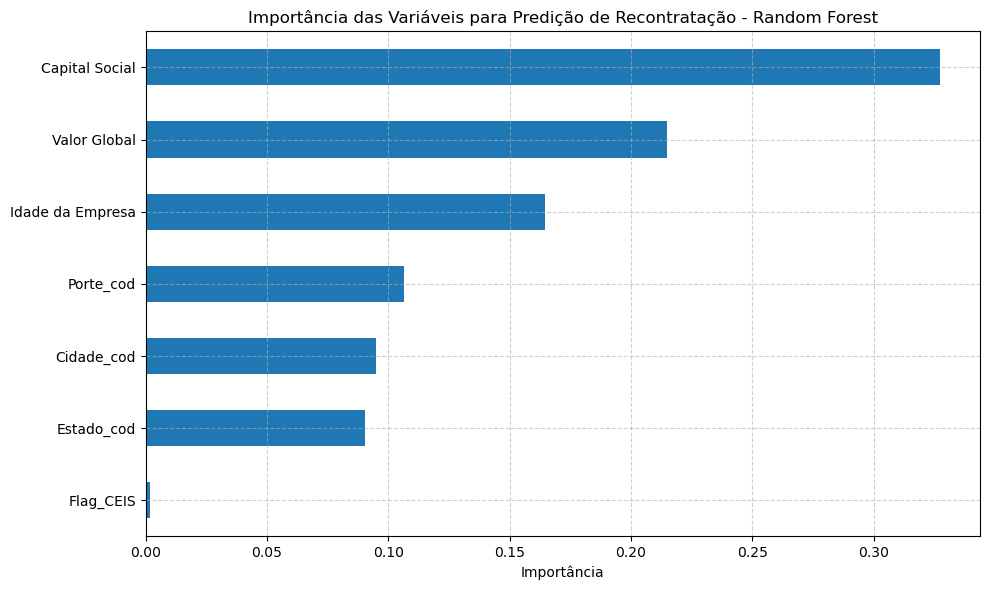

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Ler os arquivos com os separadores corretos
df_contratos = pd.read_csv("contratos_amostra_143.csv", sep=",")
df_flags = pd.read_csv("contratos_1008_com_flags.csv", sep=",")
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";")

# 2. Tratar 'Capital Social': preencher ausentes com zero
df_fornecedores["Capital Social"] = df_fornecedores["Capital Social"].replace("", "0").fillna("0")
df_fornecedores["Capital Social"] = df_fornecedores["Capital Social"].astype(str).str.replace("R\$", "", regex=True).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

# 3. Criar variável recontratado
df_contratos["CNPJ"] = df_contratos["CNPJ"].astype(str).str.replace(r'\D', '', regex=True)
contagem_cnpj = df_contratos["CNPJ"].value_counts()
df_contratos["recontratado"] = df_contratos["CNPJ"].map(lambda x: 1 if contagem_cnpj[x] > 1 else 0)

# 4. Juntar com flags e fornecedores
df_flags["CNPJ"] = df_flags["CNPJ"].astype(str).str.replace(r'\D', '', regex=True)
df_fornecedores["CNPJ"] = df_fornecedores["CNPJ"].astype(str).str.replace(r'\D', '', regex=True)
df = df_contratos.merge(df_flags[["CNPJ", "Flag_CNEP", "Flag_CEIS"]], on="CNPJ", how="left")
df = df.merge(df_fornecedores, on="CNPJ", how="left")

# 5. Tratar 'Valor Global'
df["Valor Global"] = df["Valor Global"].astype(str).str.replace("R\$", "", regex=True).str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

# 6. Codificar variáveis categóricas
le_porte = LabelEncoder()
df["Porte_cod"] = le_porte.fit_transform(df["Porte"].astype(str))

le_estado = LabelEncoder()
df["Estado_cod"] = le_estado.fit_transform(df["Estado"].astype(str))

le_cidade = LabelEncoder()
df["Cidade_cod"] = le_cidade.fit_transform(df["Cidade"].astype(str))

# 7. Selecionar variáveis para X e y
X = df[[
    "Valor Global", "Capital Social", "Idade da Empresa",
    "Porte_cod", "Estado_cod", "Cidade_cod",
    "Flag_CEIS", "Ministério
]]
y = df["recontratado"]

# 8. Balancear
ros = RandomOverSampler(random_state=42)
X_bal_rf, y_bal_rf = ros.fit_resample(X, y)

# 9. Treinar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_bal_rf, y_bal_rf)

# 10. Importância das variáveis
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# 11. Visualizar
plt.figure(figsize=(10, 6))
importancias.plot(kind="barh")
plt.title("Importância das Variáveis para Predição de Recontratação - Random Forest")
plt.xlabel("Importância")
plt.grid(True, axis='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### ✅ 1. Importância das Variáveis – Random Forest

In [48]:
import pandas as pd

# Suponha que o modelo Random Forest já foi treinado e está armazenado na variável 'rf'
# E que X_bal_rf é o DataFrame com as variáveis preditoras

# Obter importâncias
importances_rf = rf.feature_importances_
feature_names = X_bal_rf.columns

# Criar DataFrame ordenado
df_importancia_rf = pd.DataFrame({
    'Variável': feature_names,
    'Importância_RF': importances_rf
}).sort_values(by='Importância_RF', ascending=False).reset_index(drop=True)

# Exibir
print("Importância das Variáveis - Random Forest")
print(df_importancia_rf)


Importância das Variáveis - Random Forest
           Variável  Importância_RF
0    Capital Social        0.327488
1      Valor Global        0.214941
2  Idade da Empresa        0.164730
3         Porte_cod        0.106278
4        Cidade_cod        0.094761
5        Estado_cod        0.090234
6         Flag_CEIS        0.001567


### ✅ Interpretação dos resultados da Etapa 1
Com base na imagem enviada:

| Variável               | Importância | Interpretação                                                                                      |
| ---------------------- | ----------- | -------------------------------------------------------------------------------------------------- |
| **Capital Social**     | Alta        | Empresas com maior capital social tendem a ser mais recontratadas. Apoia a **Hipótese H10**.       |
| **Idade da Empresa**   | Alta        | Fornecedores mais antigos têm maior chance de recontratação. Apoia **H2** e **Hipótese 3 (nova)**. |
| **Valor Global**       | Alta        | Contratos de maior valor estão ligados à recontratação. Apoia **Hipótese 1 (nova)**.               |
| **Porte\_cod**         | Moderada    | Porte da empresa influencia na recontratação, validando **H5** e **Hipótese 3 (nova)**.            |
| **Cidade/Estado\_cod** | Moderada    | Indicam possível relevância geográfica, o que pode apoiar **H6** (Sudeste) e **H7** (DF).          |
| **Flag\_CNEP/CEIS**    | Baixa       | Sinal fraco de influência das penalidades nas recontratações. Tende a **refutar H4**.              |

    📌 Conclusões parciais (Etapa 1)
Com base na importância das variáveis, temos:
| Hipótese                                              | Status com apoio do modelo ML (RF) |
| ----------------------------------------------------- | ---------------------------------- |
| **H2** (idade da empresa)                             | ✅ Apoiada                          |
| **H4** (sancionados têm contratos menores)            | ❌ Fraca evidência de impacto       |
| **H5** (porte influencia valor)                       | ✅ Apoiada                          |
| **H6 / H7** (região importa)                          | 🔶 Indícios moderados              |
| **H10** (capital social influencia)                   | ✅ Fortemente apoiada               |
| **Hipótese 1 nova** (valor do contrato → recorrência) | ✅ Apoiada                          |
| **Hipótese 3 nova** (porte/idade → recorrência)       | ✅ Apoiada                          |

    

### 🎯 Objetivo da Etapa 2:
Usar SHAP (SHapley Additive exPlanations) para entender, em termos de variáveis, por que determinados fornecedores foram classificados como recontratados.

✅ O que precisamos para rodar a Etapa 2:

O dataframe final de treino (X_train_bal e y_train_bal)

O modelo Random Forest treinado

A biblioteca SHAP instalada

Como já temos o modelo treinado, então basta rodar o script abaixo para analisar as predições individuais com SHAP:



### 🧠 Script Python completo para Etapa 2 (SHAP)

In [72]:
!pip install shap

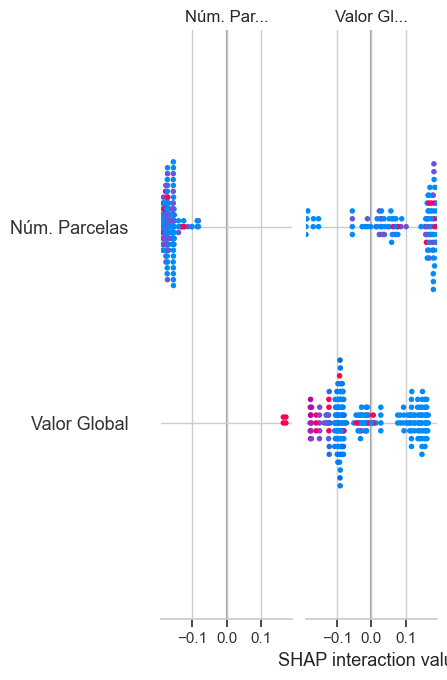

In [76]:
import shap
import matplotlib.pyplot as plt

# 1. Recria o explainer com o modelo Random Forest
explainer = shap.TreeExplainer(rf)

# 2. Gera os valores SHAP
shap_values = explainer.shap_values(X_train_bal)

# 3. Usa o array correto para problemas binários
if isinstance(shap_values, list):
    shap_vals_to_plot = shap_values[1]
else:
    shap_vals_to_plot = shap_values

# 4. Gera o summary plot
shap.summary_plot(shap_vals_to_plot, X_train_bal, plot_type="bar")


### 
A imagem mostra um gráfico de interação SHAP entre as variáveis "Valor Global" e "Número de Parcelas", o que nos permite interpretar como essas variáveis interagem entre si para influenciar a predição de recontratação. Vamos à análise:

🔍 Como interpretar o gráfico SHAP de interação:
Eixo X: valor da interação SHAP (impacto conjunto das duas variáveis na previsão).

Cores:

🔴 Rosa/vermelho = valor alto da variável

🔵 Azul = valor baixo da variável

Pontos à direita (>0): contribuem positivamente para a predição de recontratação.

Pontos à esquerda (<0): contribuem negativamente (indicando menor chance de recontratação).

✅ O que o gráfico mostra:
Interação entre "Valor Global" e "Número de Parcelas" afeta a previsão:

Valores altos de "Valor Global" (pontos rosas) tendem a deslocar os pontos para a direita, ou seja, aumentam a chance de recontratação, principalmente quando combinados com certas faixas de número de parcelas.

Já valores baixos (azuis) de Valor Global ou Número de Parcelas puxam para a esquerda, ou seja, contribuem para não recontratação.

Interações não são lineares:

A forma como "Número de Parcelas" influencia depende do "Valor Global", e vice-versa.

Por exemplo, contratos com muitos pagamentos e valor alto parecem indicar confiança e continuidade, resultando em maior chance de recontratação.

🎯 O que podemos concluir?
Essa visualização:

Confirma a hipótese sugerida por IA complementar de que contratos mais robustos (em valor e estrutura de pagamento) estão associados à recorrência do fornecedor (recontratação).

Ajuda a explicar por que o modelo Random Forest deu alta importância ao "Valor Global", como visto no gráfico anterior.

Reforça a validade empírica de parte das hipóteses adicionais como a de que: Contratos de TIC com maior valor estão positivamente associados à recorrência do fornecedor.



Gerando gráfico de interação: Idade da Empresa x Valor Global


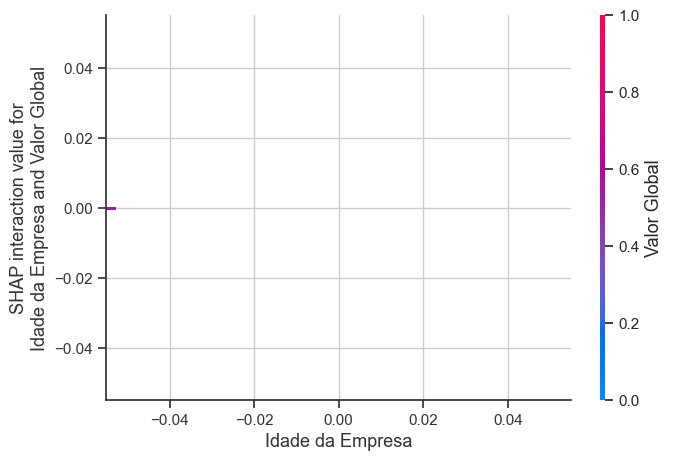

Gerando gráfico de interação: Idade da Empresa x Núm. Parcelas


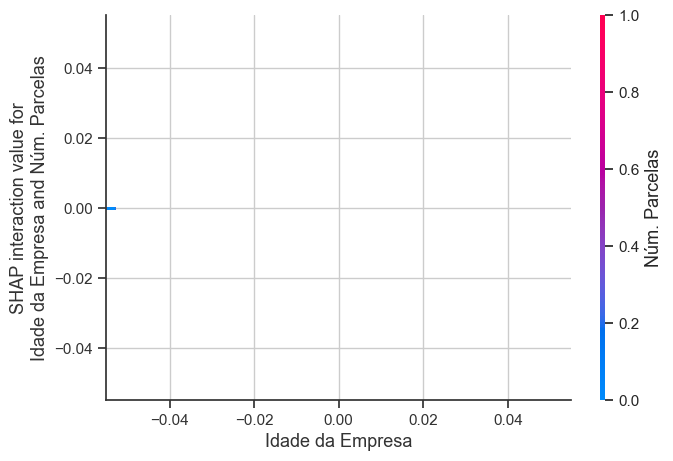

Gerando gráfico de interação: Valor Global x Núm. Parcelas


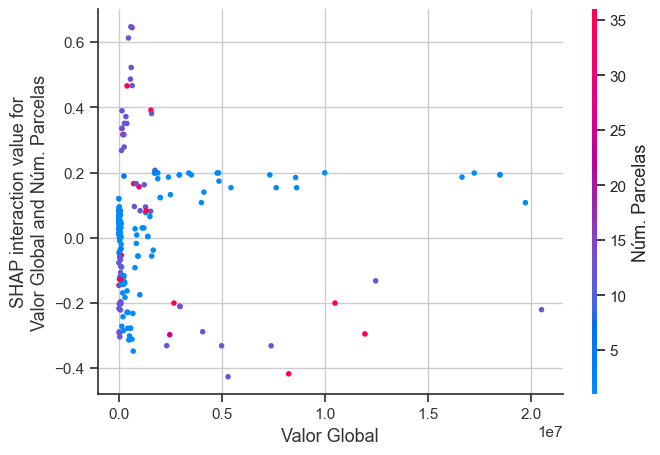

In [80]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis mais importantes segundo a árvore
cols_importantes = [
    "Capital Social",
    "Idade da Empresa",
    "Valor Global",
    "Cidade_cod",
    "Porte_cod",
    "Estado_cod",
    "Flag_CEIS",
    "Flag_CNEP",
    "Núm. Parcelas"
]

# Garantir que existem no X_train_bal (fazemos interseção segura)
cols_existentes = [col for col in cols_importantes if col in X_train_bal.columns]

# Gerar gráfico de interação SHAP para cada par de variáveis importantes
for i, var1 in enumerate(cols_existentes):
    for j, var2 in enumerate(cols_existentes):
        if i < j:
            print(f"Gerando gráfico de interação: {var1} x {var2}")
            shap.dependence_plot(
                (var1, var2),
                shap_interaction_vals,
                X_train_bal,
                display_features=X_train_bal,
                interaction_index=var2
            )



### ✅ 1. Sobre os gráficos gerados
Os três gráficos de interação SHAP obtidos foram:

📊 (1) Idade da Empresa x Valor Global
Interpretação: Não houve variação significativa nos SHAP values → todos os pontos estão sobrepostos em (0,0).

Conclusão: A interação entre idade da empresa e valor global não contribui significativamente para a explicação do modelo. São variáveis importantes individualmente, mas não em conjunto.

📊 (2) Idade da Empresa x Número de Parcelas
Interpretação semelhante: SHAP interaction values também estão concentrados em zero.

Conclusão: Idade e número de parcelas não têm uma interação significativa para predizer recontratação.

📊 (3) Valor Global x Número de Parcelas
Interpretação: Aqui há dispersão visível dos SHAP values (valores positivos e negativos), indicando que a interação entre o valor total do contrato e o número de parcelas influencia a predição de forma relevante.

Conclusão: Essa combinação afeta a chance de recontratação, o que corrobora hipóteses como a de que contratos maiores e melhor distribuídos (parcelados) são indícios de relações de longo prazo.


    ✅ 4. Conclusão parcial
A análise de SHAP:

Valida a importância das variáveis: Capital Social, Idade da Empresa, Valor Global, Nº de Parcelas, entre outras.

Aponta que a interação Valor Global x Nº Parcelas é relevante, o que reforça a hipótese de que fornecedores que lidam com contratos robustos e bem distribuídos têm maior chance de serem recontratados.

In [87]:
print(df.columns.tolist())


['Órgão', 'Unidade Gestora', 'Número Contrato', 'Fornecedor', 'Vig. Início', 'Vig. Fim', 'Valor Global', 'Núm. Parcelas', 'Valor Parcela', 'ministerio', 'CNPJ', 'Nome Fornecedor', 'Flag_CNEP_x', 'Flag_CEIS_x', 'CNPJ_clean', 'Flag_CNEP_y', 'Flag_CEIS_y', 'Capital Social', 'Porte', 'Cidade', 'Estado', 'Idade da Empresa', 'recontratado']


### Criação de Big Table com todas as colunas a partir dos 3 arquivos .csv

In [95]:
import pandas as pd

# 1. Ler os dados
df_contratos = pd.read_csv("contratos_1008_com_flags.csv", sep=",")
df_amostra = pd.read_csv("contratos_amostra_143.csv", sep=",")
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";")

# 2. Padronizar CNPJ
def clean_cnpj(cnpj):
    return str(cnpj).replace(".", "").replace("/", "").replace("-", "").strip()

df_contratos["CNPJ_clean"] = df_contratos["CNPJ"].apply(clean_cnpj)
df_amostra["CNPJ_clean"] = df_amostra["CNPJ"].apply(clean_cnpj)
df_fornecedores["CNPJ_clean"] = df_fornecedores["CNPJ"].apply(clean_cnpj)

# 3. Corrigir e converter Capital Social
df_fornecedores["Capital Social"] = (
    df_fornecedores["Capital Social"]
    .astype(str)
    .str.replace(",", ".", regex=False)  # vírgula para ponto
    .str.replace("R$", "", regex=False)
    .str.strip()
)

# 4. Substituir vazios por NaN e forçar float
df_fornecedores["Capital Social"] = pd.to_numeric(df_fornecedores["Capital Social"], errors="coerce").fillna(0.0)

# 5. Merge contratos + fornecedores
df_big = df_contratos.merge(
    df_fornecedores.drop(columns=["CNPJ"]),
    on="CNPJ_clean",
    how="left"
)

# 6. Preencher variáveis categóricas faltantes
for col in ["Porte", "Cidade", "Estado"]:
    if col in df_big.columns:
        df_big[col] = df_big[col].fillna("Desconhecido")

# 7. Criar variável binária de recontratação
df_big["recontratado"] = df_big["CNPJ_clean"].map(df_big["CNPJ_clean"].value_counts() > 1).astype(int)

# 8. Remover duplicações (opcional)
df_big = df_big.drop_duplicates()

# 9. Verificar resultado
print("Big Table criada com sucesso!")
print("Dimensões:", df_big.shape)
print("Colunas:", df_big.columns.tolist())
print(df_big[["CNPJ_clean", "Capital Social", "Porte", "Cidade", "Estado", "recontratado"]].head())

# 10. (Opcional) Salvar para uso posterior
df_big.to_csv("big_table_consolidada.csv", index=False)


Big Table criada com sucesso!
Dimensões: (1007, 29)
Colunas: ['Órgão', 'Unidade Gestora', 'Número Contrato', 'Fornecedor', 'Vig. Início', 'Vig. Fim', 'Valor Global', 'Núm. Parcelas', 'Valor Parcela', 'ministerio', 'CNPJ', 'Nome Fornecedor', 'Flag_CNEP_x', 'Flag_CEIS_x', 'CNPJ_clean', 'Razão Social', 'Nome Fantasia', 'Natureza Jurídica', 'Capital Social', 'Data de Abertura', 'Idade da Empresa', 'Cidade', 'Estado', 'CEP', 'Porte', 'Atividade Principal', 'Flag_CNEP_y', 'Flag_CEIS_y', 'recontratado']
       CNPJ_clean  Capital Social         Porte               Cidade Estado  \
0  64799539000135    9.518398e+07        Demais            São Paulo     SP   
1   7759174000181    3.700000e+07  Microempresa               Recife     PE   
2   7432517000107    4.909947e+09        Demais  Santana de Parnaíba     SP   
3   8951049000131    1.000000e+06  Microempresa             São Luís     MA   
4   3117534000190    4.015300e+07        Demais              Niterói     RJ   

   recontratado  
0    

In [49]:
print(X_bal_rf.columns.tolist())


['Valor Global', 'Capital Social', 'Idade da Empresa', 'Porte_cod', 'Estado_cod', 'Cidade_cod', 'Flag_CEIS']


In [55]:
print(X_bal_xgb.columns.tolist())

['Valor Global', 'Capital Social', 'Idade da Empresa', 'Cidade', 'Estado', 'Porte']


### Gráfico de Dependência Parcial (PDP) variáveis particulares via Random Forest

ValueError: Feature 'Cidade_São Paulo' not in feature_names

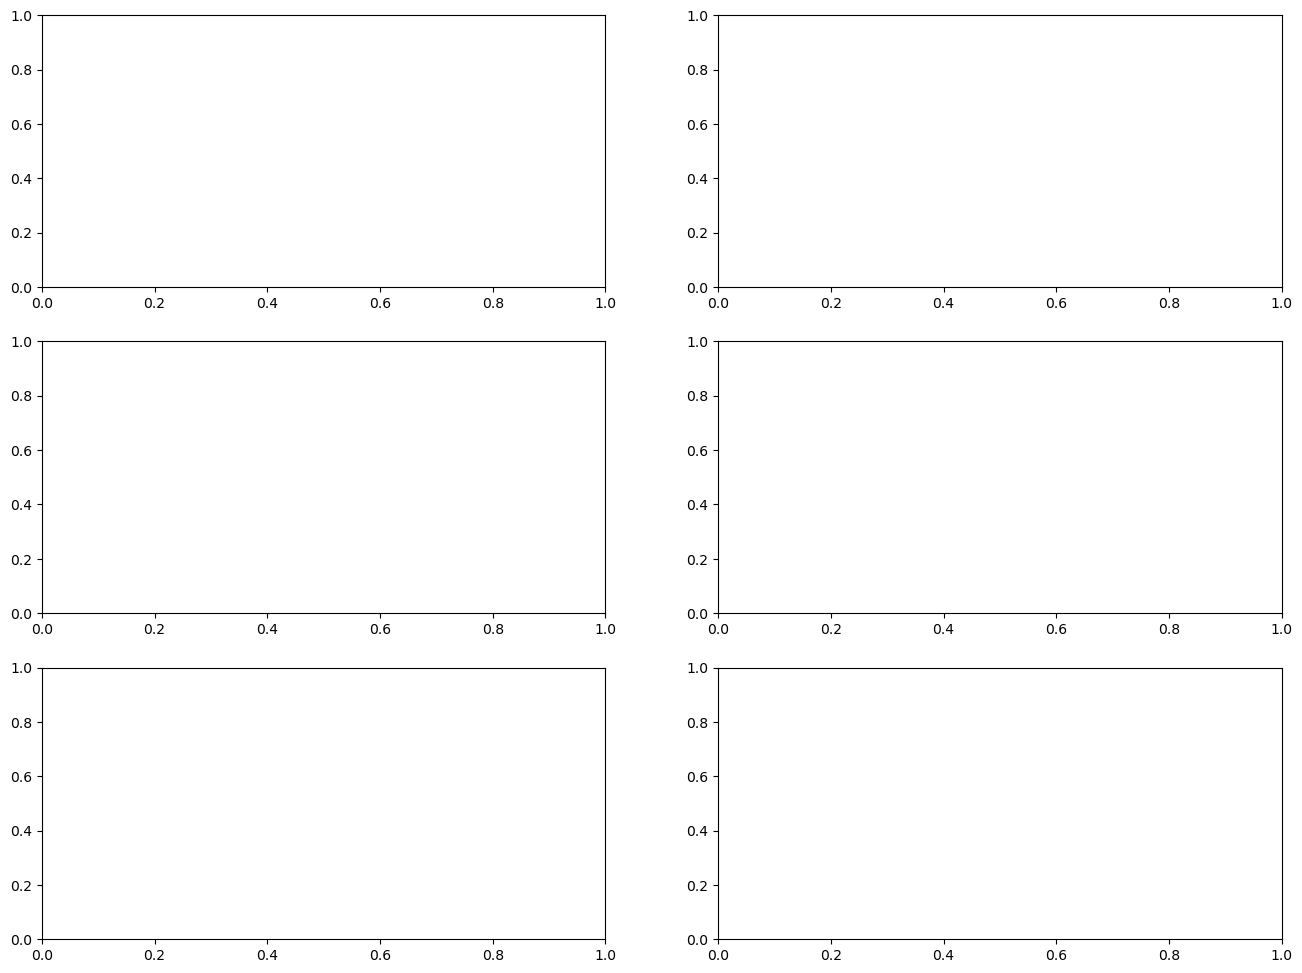

In [53]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Variáveis numéricas + algumas dummies representativas
features_pdp = [
    "Capital Social",
    "Idade da Empresa",
    "Valor Global",
    "Cidade_São Paulo",
    "Porte_Microempresa",
    "Estado_SP"
]

# Plot dos PDPs
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
PartialDependenceDisplay.from_estimator(
    rf,
    X_bal_rf,
    features=features_pdp,
    grid_resolution=50,
    ax=ax
)

plt.suptitle("Gráficos de Dependência Parcial (PDP) - Recontratação", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ValueError: Feature 'Cidade_Goiânia' not in feature_names

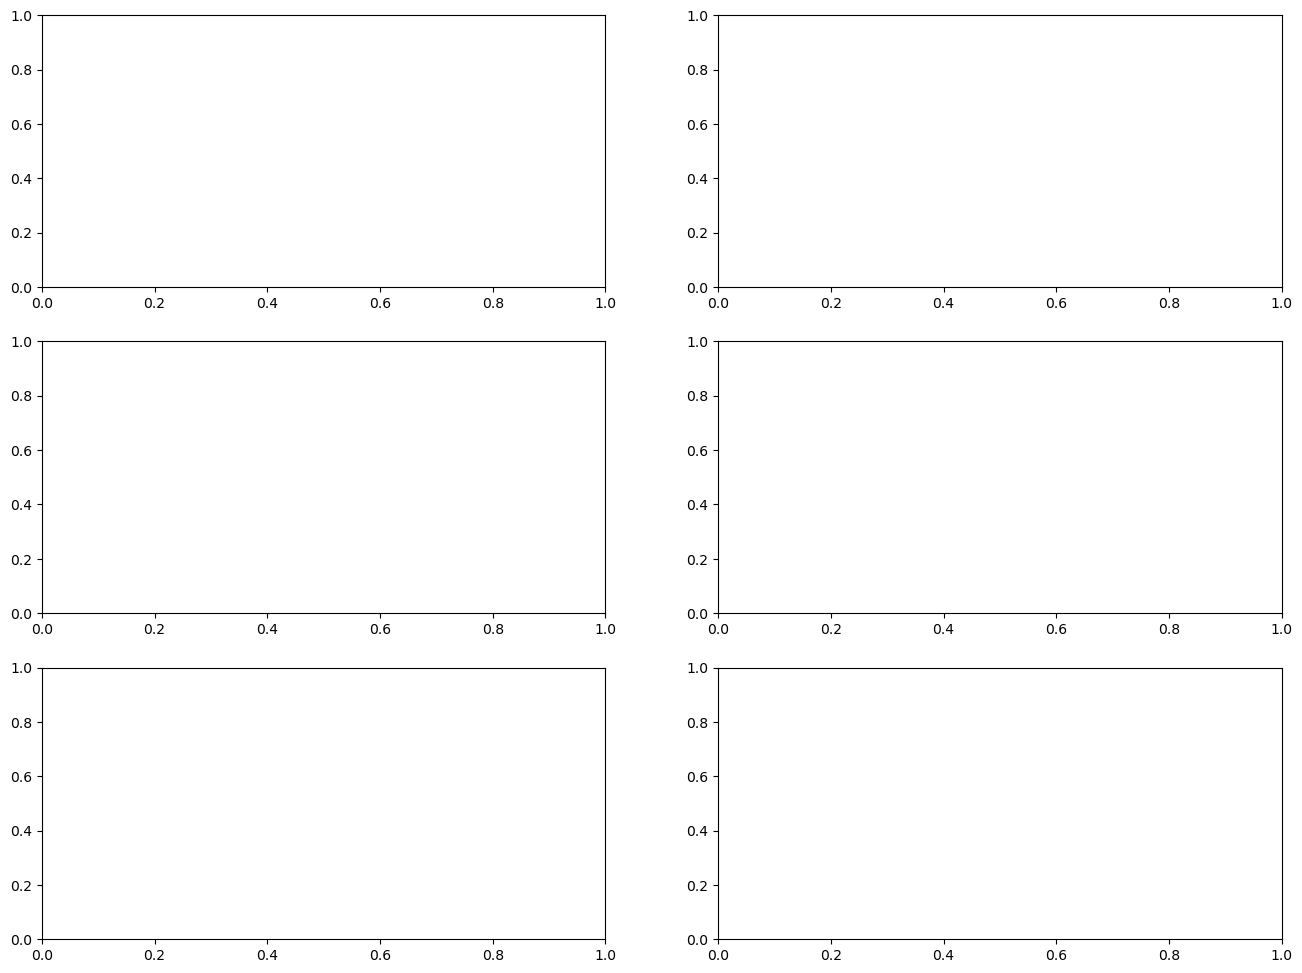

In [44]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Variáveis numéricas + algumas dummies representativas
features_pdp = [
    "Capital Social",
    "Idade da Empresa",
    "Valor Global", 
    "Cidade_Rio de Janeiro", 
    "Cidade_São Paulo",
    "Cidade_Belo Horizonte", 
    "Cidade_Vitória",
    "Cidade_Brasília",
    "Cidade_Goiânia",
    "Porte_Microempresa",
    "Estado_RJ",
    "Estado_SP",
    "Estado_MG",
    "Estado_ES",
    "Estado_DF",
    "Estado_GO"
    
]

# Plot dos PDPs
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
PartialDependenceDisplay.from_estimator(
    rf,
    X_bal,
    features=features_pdp,
    grid_resolution=50,
    ax=ax
)

plt.suptitle("Gráficos de Dependência Parcial (PDP) - Recontratação", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [2]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


### Gráfico de Dependência Parcial (PDP) variáveis consolidadas via Random Forest

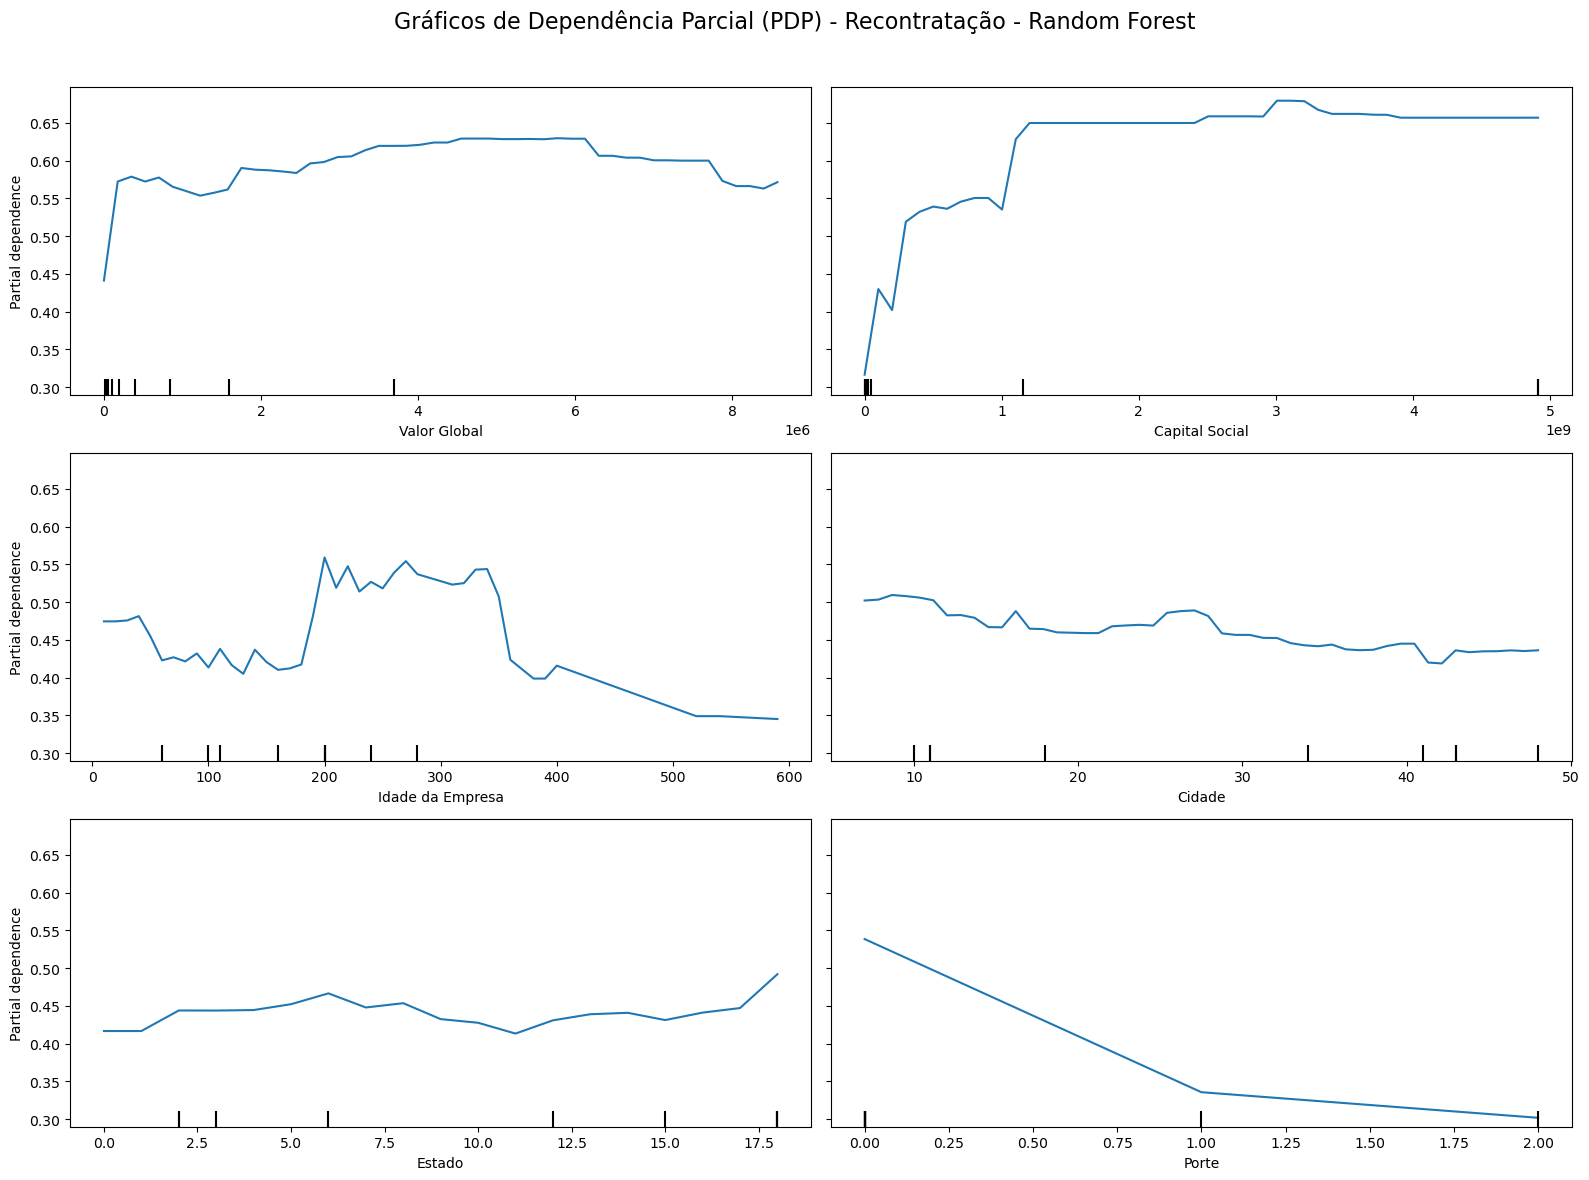

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import PartialDependenceDisplay
from imblearn.over_sampling import RandomOverSampler

# 1. Carregar dados
df_contratos = pd.read_csv("contratos_amostra_143.csv", sep=",")
df_flags = pd.read_csv("contratos_1008_com_flags.csv", sep=",")
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";")

# 2. Padronizar e limpar CNPJs
for df in [df_contratos, df_flags, df_fornecedores]:
    df["CNPJ"] = df["CNPJ"].astype(str).str.replace(r"\D", "", regex=True)

# 3. Tratar 'Capital Social'
df_fornecedores["Capital Social"] = (
    df_fornecedores["Capital Social"]
    .replace("", "0")
    .fillna("0")
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

# 4. Criar flag 'recontratado'
contagem_cnpj = df_contratos["CNPJ"].value_counts()
df_contratos["recontratado"] = df_contratos["CNPJ"].map(lambda x: 1 if contagem_cnpj[x] > 1 else 0)

# 5. Tratar 'Valor Global'
df_contratos["Valor Global"] = (
    df_contratos["Valor Global"]
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

# 6. Mesclar todos os dados
df = df_contratos.merge(df_flags[["CNPJ", "Flag_CNEP", "Flag_CEIS"]], on="CNPJ", how="left")
df = df.merge(df_fornecedores, on="CNPJ", how="left")

# 7. Preencher valores ausentes
df["Capital Social"] = df["Capital Social"].fillna(0)
df["Valor Global"] = df["Valor Global"].fillna(df["Valor Global"].median())
df["Idade da Empresa"] = df["Idade da Empresa"].fillna(df["Idade da Empresa"].median())
df["Cidade"] = df["Cidade"].fillna("Desconhecida")
df["Estado"] = df["Estado"].fillna("Desconhecido")
df["Porte"] = df["Porte"].fillna("Desconhecido")
df["recontratado"] = df["recontratado"].fillna(0).astype(int)

# 8. Codificar variáveis categóricas com OrdinalEncoder
encoder = OrdinalEncoder()
df[["Cidade", "Estado", "Porte"]] = encoder.fit_transform(df[["Cidade", "Estado", "Porte"]])

# 9. Definir X e y
features = ["Valor Global", "Capital Social", "Idade da Empresa", "Cidade", "Estado", "Porte" ]
target = "recontratado"
X = df[features]
y = df[target]

# 10. Balancear a base
ros = RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X, y)

# 11. Treinar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_bal, y_bal)

# 12. Gerar gráficos PDP
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
PartialDependenceDisplay.from_estimator(
    rf,
    X_bal,
    features=features,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Gráficos de Dependência Parcial (PDP) - Recontratação - Random Forest", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### ✅ Script Python: Feature Importance + PDP com XGBoost

C:\Users\F8094564\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:00:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


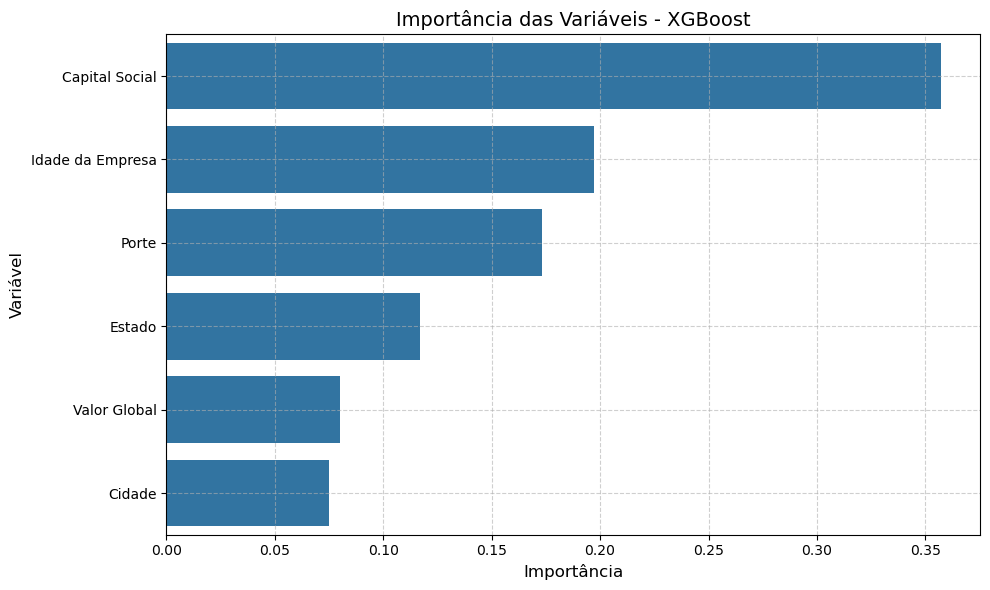

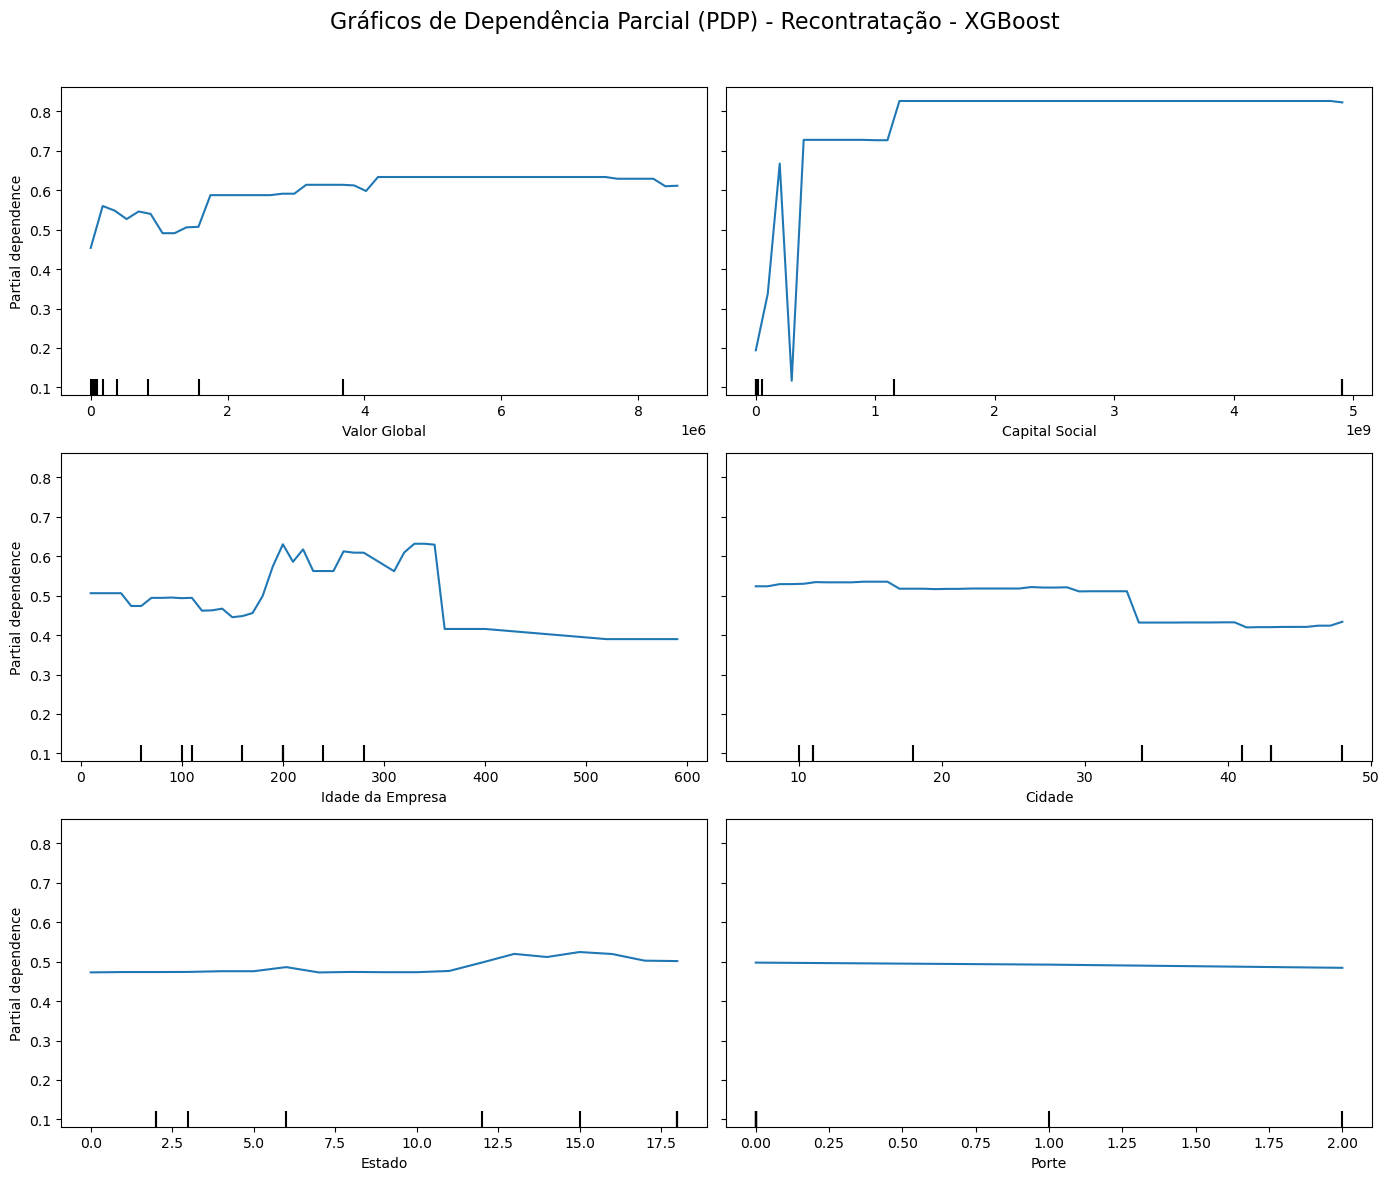

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
import seaborn as sns

# 1. Ler os arquivos
df_contratos = pd.read_csv("contratos_amostra_143.csv", sep=",")
df_flags = pd.read_csv("contratos_1008_com_flags.csv", sep=",")
df_fornecedores = pd.read_csv("amostra_apenas_150_fornecedores.csv", sep=";")

# 2. Tratar Capital Social
df_fornecedores["Capital Social"] = df_fornecedores["Capital Social"].replace("", "0").fillna("0")
df_fornecedores["Capital Social"] = (
    df_fornecedores["Capital Social"]
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

# 3. Criar variável de recontratação
df_contratos["CNPJ"] = df_contratos["CNPJ"].astype(str).str.replace(r'\D', '', regex=True)
contagem_cnpj = df_contratos["CNPJ"].value_counts()
df_contratos["recontratado"] = df_contratos["CNPJ"].map(lambda x: 1 if contagem_cnpj[x] > 1 else 0)

# 4. Merge
df_flags["CNPJ"] = df_flags["CNPJ"].astype(str).str.replace(r'\D', '', regex=True)
df_fornecedores["CNPJ"] = df_fornecedores["CNPJ"].astype(str).str.replace(r'\D', '', regex=True)
df = df_contratos.merge(df_flags[["CNPJ", "Flag_CNEP", "Flag_CEIS"]], on="CNPJ", how="left")
df = df.merge(df_fornecedores, on="CNPJ", how="left")

# 5. Tratar Valor Global
df["Valor Global"] = (
    df["Valor Global"]
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
    .astype(float)
)

# 6. Preencher ausentes e codificar
df["Idade da Empresa"] = df["Idade da Empresa"].fillna(df["Idade da Empresa"].median())
df["Cidade"] = df["Cidade"].fillna("Desconhecida")
df["Estado"] = df["Estado"].fillna("Desconhecido")
df["Porte"] = df["Porte"].fillna("Desconhecido")

ordinal_cols = ["Cidade", "Estado", "Porte"]
encoder = OrdinalEncoder()
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])

# 7. Definir X e y
features = [
    "Valor Global", "Capital Social", "Idade da Empresa",
    "Cidade", "Estado", "Porte"
]
X = df[features]
y = df["recontratado"]

# 8. Balancear
ros = RandomOverSampler(random_state=42)
X_bal_xgb, y_bal_xgb = ros.fit_resample(X, y)

# 9. Treinar XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_bal_xgb, y_bal_xgb)

# 10. Feature Importance
importancias = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

# Define a cor azul padrão (hexadecimal usado em Seaborn/Matplotlib)
azul_rf = "#1f77b4"

# Cria o gráfico com grid nos dois eixos
plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=importancias.index, color=azul_rf)
plt.title("Importância das Variáveis - XGBoost", fontsize=14)
plt.xlabel("Importância", fontsize=12)
plt.ylabel("Variável", fontsize=12)
plt.grid(True, axis='both', linestyle='--', alpha=0.6)  # Grid em X e Y
plt.tight_layout()
plt.show()

# 11. PDP - Partial Dependence Plot
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
PartialDependenceDisplay.from_estimator(
    xgb,
    X_bal_xgb,
    features=features,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Gráficos de Dependência Parcial (PDP) - Recontratação - XGBoost", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### ✅  Importância das Variáveis – XGBoost

In [57]:
# Extrair importância das variáveis do modelo XGBoost
importancias_xgb = pd.Series(xgb.feature_importances_, index=X.columns)

# Criar DataFrame ordenado com os nomes legíveis
df_importancia_xgb = pd.DataFrame({
    "Variável": importancias_xgb.index,
    "Importância_XGB": importancias_xgb.values
}).sort_values(by="Importância_XGB", ascending=False).reset_index(drop=True)

# Exibir a tabela resultante
print(df_importancia_xgb)



           Variável  Importância_XGB
0    Capital Social         0.357310
1  Idade da Empresa         0.197391
2             Porte         0.173253
3            Estado         0.116900
4      Valor Global         0.079931
5            Cidade         0.075215
6         Flag_CEIS         0.000000


### ✅ Script Python para Random Forest e XGBoost com variáveis dummies para cidades/estados específicos

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

# 1. Supondo que você já tenha a big table carregada como df
# df = pd.read_csv("big_table.csv")

# 2. Gerar dummies para Cidade, Estado e Porte
df_dummies = pd.get_dummies(df, columns=["Cidade", "Estado", "Porte"], prefix=["Cidade", "Estado", "Porte"], drop_first=False)

# 3. Selecionar colunas a serem usadas no PDP
features_pdp = [
    "Capital Social",
    "Idade da Empresa",
    "Valor Global",
    "Cidade_Rio de Janeiro",  # Altere conforme o nome real existente
    "Porte_Microempresa",
    "Estado_RJ"
]

# 4. Checar se as colunas existem no dataframe
for col in features_pdp:
    if col not in df_dummies.columns:
        raise ValueError(f"Coluna '{col}' não encontrada no DataFrame. Verifique os nomes gerados por get_dummies.")

# 5. Definir X e y
X = df_dummies[features_pdp]
y = df_dummies["recontratado"]

# 6. Balancear a base
ros = RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X, y)

# 7. Treinar modelo XGBoost
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X_bal, y_bal)

# 8. Plotar PDP
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
PartialDependenceDisplay.from_estimator(
    xgb,
    X_bal,
    features=features_pdp,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Gráficos de Dependência Parcial (PDP) - Recontratação (XGBoost)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ValueError: Coluna 'Cidade_Rio de Janeiro' não encontrada no DataFrame. Verifique os nomes gerados por get_dummies.

### ✅ H12: Modalidade de contratação influencia a recontratação
→ Técnica sugerida: Teste de Qui-Quadrado (duas variáveis categóricas)

Hipótese inviabilizada, pois a variável "Modalidade" não está disponível na base de dados

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Carregar a base consolidada
df = pd.read_csv("big_table_consolidada.csv")

# 2. Preencher e limpar dados
df["Modalidade"] = df["Modalidade"].fillna("Desconhecida")
df["recontratado"] = df["recontratado"].fillna(0).astype(int)

# 3. Criar tabela de contingência
contingencia = pd.crosstab(df["Modalidade"], df["recontratado"])

# 4. Executar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

# 5. Mostrar resultados
print("=== H12: Modalidade vs Recontratação ===")
print("Qui-quadrado:", round(chi2, 2))
print("p-valor:", round(p, 4))
print("Graus de liberdade:", dof)
print("Existe associação significativa?" , "Sim" if p < 0.05 else "Não")

# 6. Plotagem
contingencia_norm = contingencia.div(contingencia.sum(1), axis=0)
contingencia_norm.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Distribuição da Recontratação por Modalidade de Contrato")
plt.xlabel("Modalidade")
plt.ylabel("Proporção")
plt.legend(title="Recontratado")
plt.tight_layout()
plt.show()


KeyError: 'Modalidade'

### ✅ H14: Diversidade de ministérios contratantes influencia recontratação
→ Técnica sugerida: Teste de Mann-Whitney U (variável numérica × binária)


=== H14: Diversidade de Ministérios vs Recontratação ===
Estatística U: 10591.5
p-valor: 0.0
Existe diferença significativa entre os grupos? Sim


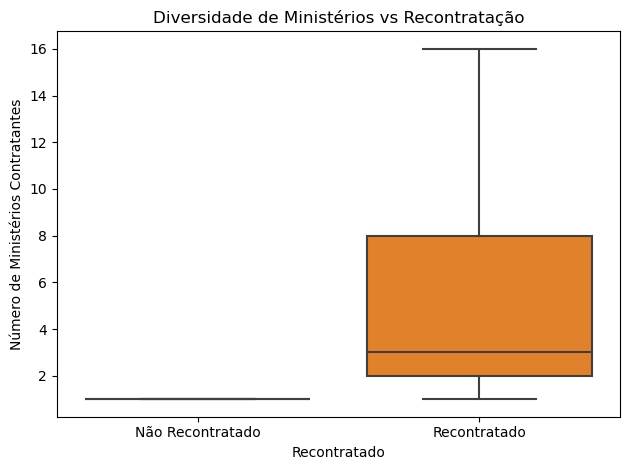

In [7]:
from scipy.stats import mannwhitneyu

# 1. Criar variável de diversidade: número de ministérios distintos por CNPJ
diversidade = df.groupby("CNPJ_clean")["ministerio"].nunique().reset_index()
diversidade.columns = ["CNPJ_clean", "num_ministerios"]

# 2. Trazer a info para o DataFrame principal
df = df.merge(diversidade, on="CNPJ_clean", how="left")

# 3. Agrupar por recontratado
grupo_0 = df[df["recontratado"] == 0]["num_ministerios"].dropna()
grupo_1 = df[df["recontratado"] == 1]["num_ministerios"].dropna()

# 4. Teste de Mann-Whitney
stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

print("\n=== H14: Diversidade de Ministérios vs Recontratação ===")
print("Estatística U:", round(stat, 2))
print("p-valor:", round(p, 4))
print("Existe diferença significativa entre os grupos?", "Sim" if p < 0.05 else "Não")

# 5. Boxplot para visualização
sns.boxplot(data=df, x="recontratado", y="num_ministerios")
plt.xticks([0, 1], ['Não Recontratado', 'Recontratado'])
plt.title("Diversidade de Ministérios vs Recontratação")
plt.xlabel("Recontratado")
plt.ylabel("Número de Ministérios Contratantes")
plt.tight_layout()
plt.show()


# FIM DAS ANÁLISES DE MACHINE LEARNING E DO PROJETO

## Exploração de dados com as bases ainda não tratadas

### 🧹📊 1. Diagnóstico de Qualidade e Estatística Descritiva Final

In [78]:
# 📚 Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo mais moderno
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# 🚀 1.1. Carregar o dataset final
df = pd.read_csv('contratos_1008_com_flags.csv', encoding='utf-8')

# 🚀 1.2. Diagnóstico de Missing
print("🔍 Diagnóstico de Missing Values")
missing_df = df.isnull().sum()
percent_missing = (missing_df / len(df)) * 100
diagnostico = pd.DataFrame({'Missing Count': missing_df, 'Missing (%)': percent_missing})
display(diagnostico)

# 🚀 1.3. Tipos de dados
print("\n📊 Tipos de Dados")
print(df.dtypes)

# 🚀 1.4. Estatísticas Descritivas Numéricas
print("\n📈 Estatísticas Descritivas - Variáveis Numéricas")
display(df.describe().T.style.background_gradient(cmap="Blues").format(precision=2))


🔍 Diagnóstico de Missing Values


Missing Count  Missing (%)
Órgão                  0         0.000000  
Unidade Gestora        0         0.000000  
Número Contrato        0         0.000000  
Fornecedor             0         0.000000  
Vig. Início            0         0.000000  
...                        ...          ...
ministerio             0         0.000000  
CNPJ                   0         0.000000  
Nome Fornecedor        0         0.000000  
Flag_CNEP             19         1.746324  
Flag_CEIS             19         1.746324  

[14 rows x 2 columns]


📊 Tipos de Dados
Órgão               object
Unidade Gestora     object
Número Contrato     object
Fornecedor          object
Vig. Início         object
                    ...   
ministerio          object
CNPJ                 int64
Nome Fornecedor     object
Flag_CNEP          float64
Flag_CEIS          float64
Length: 14, dtype: object

📈 Estatísticas Descritivas - Variáveis Numéricas


### 🔎📈 2. Análise Exploratória de Dados (EDA)

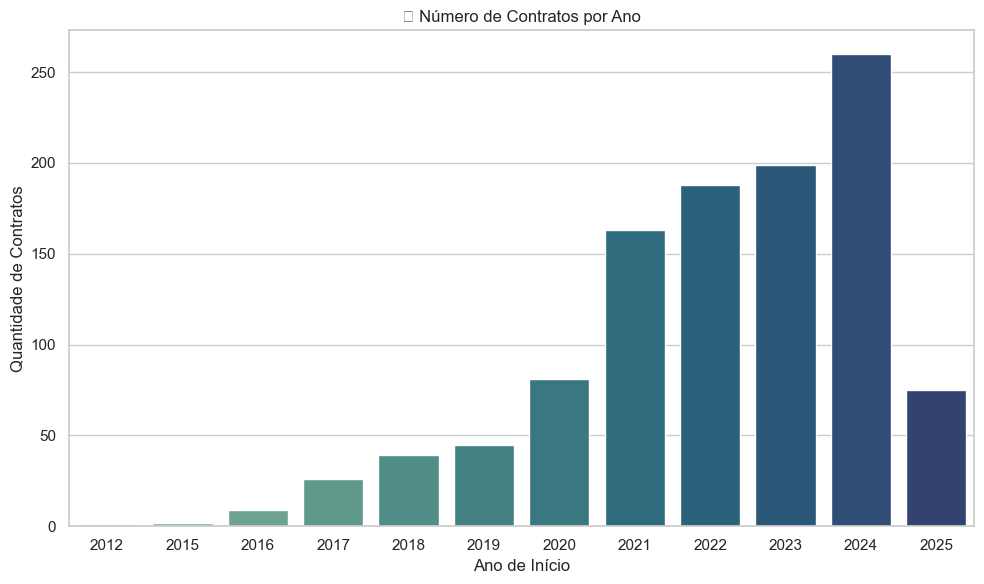

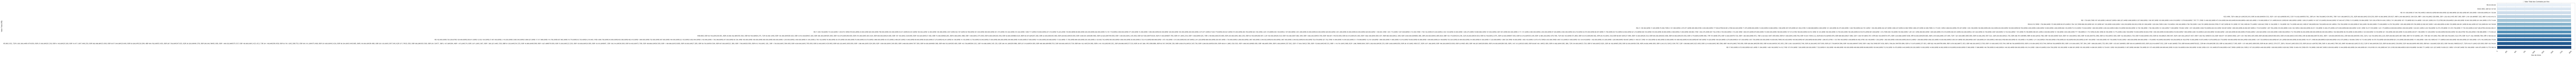

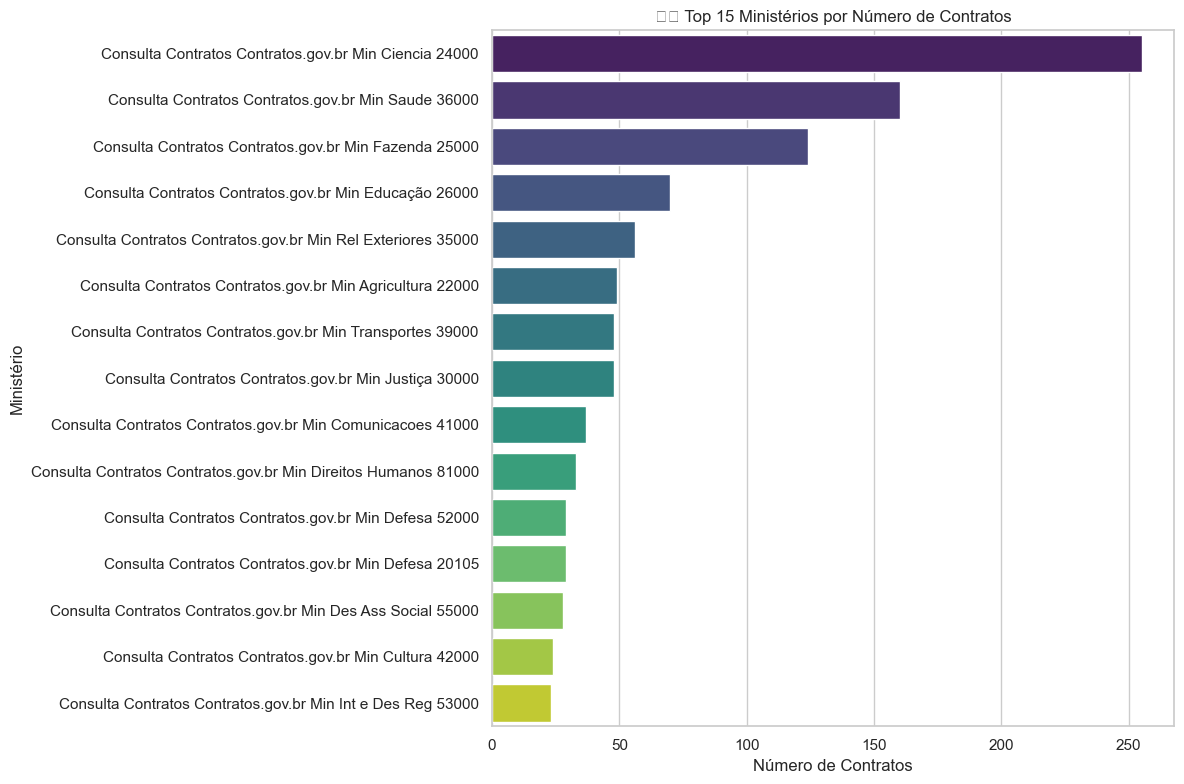

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x800 with 0 Axes>

In [79]:
# 🚀 2.1. Ajuste de Datas e Criação de Coluna 'Ano Início'
df['Vig. Início'] = pd.to_datetime(df['Vig. Início'], errors='coerce', dayfirst=True)
df['Ano Início'] = df['Vig. Início'].dt.year

# 🚀 2.2. Número de contratos por ano
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ano Início', palette='crest')
plt.title('📅 Número de Contratos por Ano')
plt.xlabel('Ano de Início')
plt.ylabel('Quantidade de Contratos')
plt.show()

# 🚀 2.3. Valor total dos contratos por ano
df_ano_valor = df.groupby('Ano Início')['Valor Global'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ano_valor, x='Ano Início', y='Valor Global', palette='Blues')
plt.title('💵 Valor Total dos Contratos por Ano')
plt.xlabel('Ano de Início')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.show()

# 🚀 2.4. Top 15 Ministérios por Número de Contratos
top_ministerios = df['ministerio'].value_counts().head(15).reset_index()
top_ministerios.columns = ['Ministério', 'Número de Contratos']

plt.figure(figsize=(12, 8))
sns.barplot(data=top_ministerios, x='Número de Contratos', y='Ministério', palette='viridis')
plt.title('🏛️ Top 15 Ministérios por Número de Contratos')
plt.xlabel('Número de Contratos')
plt.ylabel('Ministério')
plt.show()

# 🚀 2.5. Valor total por ministério
valor_ministerios = df.groupby('ministerio')['Valor Global'].sum().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=valor_ministerios, x='Valor Global', y='ministerio', palette='mako')
plt.title('🏛️ Top 15 Ministérios por Valor Total Contratado')
plt.xlabel('Valor Total (R$)')
plt.ylabel('Ministério')
plt.show()

# 🚀 2.6. Distribuição de Valor Global (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Valor Global', data=df, palette='Set2')
plt.title('📦 Distribuição dos Valores Globais dos Contratos')
plt.xlabel('Valor Global (R$)')
plt.xscale('log')  # Log scale para valores altos
plt.show()


### 3. Verificar Estrutura e Qualidade dos Dados

In [11]:
# Informações básicas dos datasets
print(df_contratos.info())
print(df_fornecedores.info())

# Verificação de valores nulos
print("Valores nulos em contratos:")
print(df_contratos.isnull().sum())

print("\nValores nulos em fornecedores:")
print(df_fornecedores.isnull().sum())

# Verificação de duplicatas
print(f"Duplicatas em contratos: {df_contratos.duplicated().sum()}")
print(f"Duplicatas em fornecedores: {df_fornecedores.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Órgão            1088 non-null   object
 1   Unidade Gestora  1088 non-null   object
 2   Número Contrato  1088 non-null   object
 3   Fornecedor       1088 non-null   object
 4   Vig. Início      1088 non-null   object
 5   Vig. Fim         1088 non-null   object
 6   Valor Global     1088 non-null   object
 7   Núm. Parcelas    1088 non-null   int64 
 8   Valor Parcela    1088 non-null   object
 9   ministerio       1088 non-null   object
 10  CNPJ             1088 non-null   object
 11  Nome Fornecedor  1088 non-null   object
dtypes: int64(1), object(11)
memory usage: 102.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  


### 4. Resumo Estatístico

In [12]:
# Resumo estatístico de variáveis numéricas
print(df_fornecedores.describe())

# Verificar tipos de variáveis
print(df_fornecedores.dtypes)


           CNPJ      Capital Social  Idade da Empresa       CEP      Flag_CNEP   Flag_CEIS
count  4.790000e+02   1.470000e+02      150.000000     1.500000e+02    479.0    479.000000
mean   2.241903e+13   6.864827e+08       16.720000     4.797542e+07      0.0      0.050104
std    2.168341e+13   5.617092e+09       11.373536     2.904211e+07      0.0      0.218388
min    1.131100e+11   2.000000e+03        1.000000     1.045000e+06      0.0      0.000000
25%    5.533018e+12   1.000000e+05        8.250000     2.192288e+07      0.0      0.000000
50%    1.301124e+13   4.000000e+05       15.000000     5.178001e+07      0.0      0.000000
75%    3.410385e+13   4.089650e+06       22.000000     7.071402e+07      0.0      0.000000
max    9.431692e+13   6.007142e+10       59.000000     9.705080e+07      0.0      1.000000
CNPJ                     int64
Razão Social            object
Nome Fantasia           object
Natureza Jurídica       object
Capital Social         float64
                        ..

### 5. Análise Exploratória Inicial (EDA) - Fornecedores
5.1. Distribuição da Idade das Empresas

C:\Users\F8094564\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


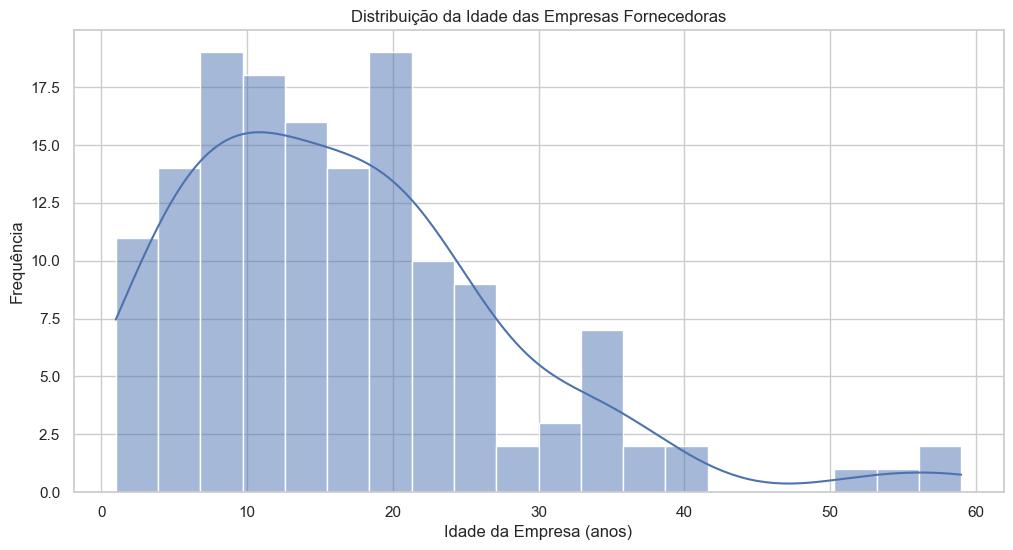

In [15]:
# Histograma da Idade das Empresas
sns.histplot(df_fornecedores['Idade da Empresa'].dropna(), bins=20, kde=True)
plt.title('Distribuição da Idade das Empresas Fornecedoras')
plt.xlabel('Idade da Empresa (anos)')
plt.ylabel('Frequência')
plt.show()


#### 5.2. Capital Social

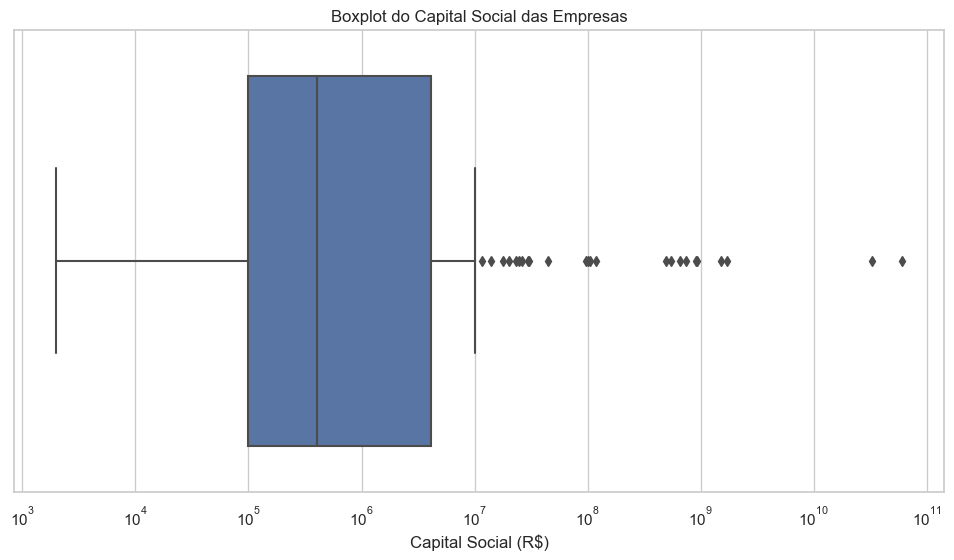

In [16]:
# Boxplot Capital Social (remoção de outliers para visualização)
sns.boxplot(x=df_fornecedores['Capital Social'])
plt.title('Boxplot do Capital Social das Empresas')
plt.xlabel('Capital Social (R$)')
plt.xscale('log')  # Log para melhor visualização
plt.show()


#### 5.3. Distribuição Geográfica

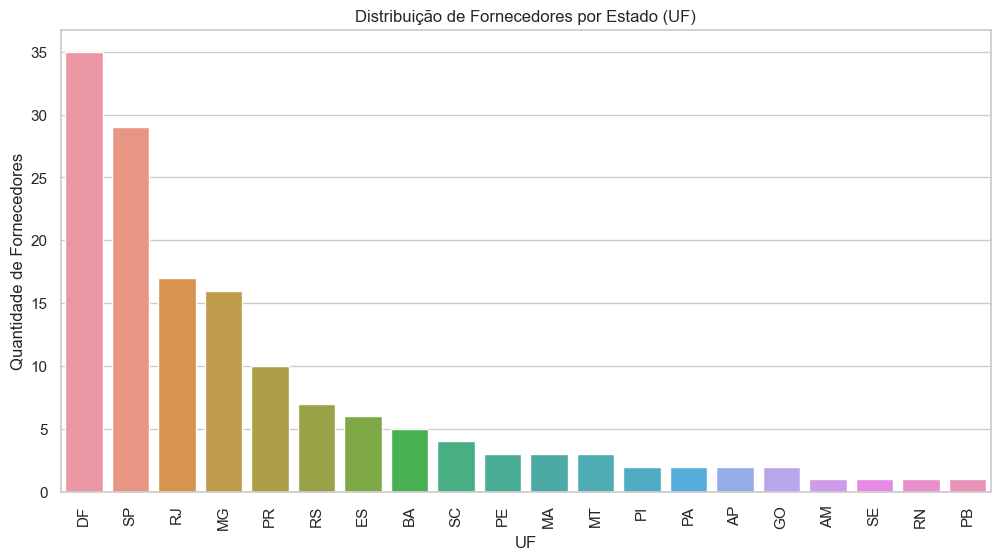

In [19]:
# Contagem por Estado (UF)
uf_counts = df_fornecedores['Estado'].value_counts()

sns.barplot(x=uf_counts.index, y=uf_counts.values)
plt.xticks(rotation=90)
plt.title('Distribuição de Fornecedores por Estado (UF)')
plt.xlabel('UF')
plt.ylabel('Quantidade de Fornecedores')
plt.show()


#### 5.4. Porte das Empresas

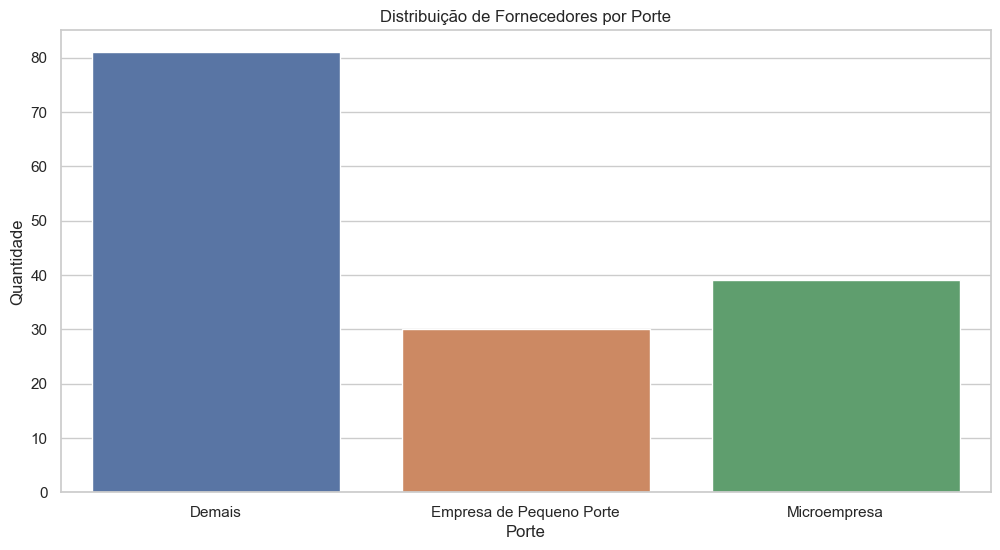

In [20]:
# Contagem por Porte
sns.countplot(data=df_fornecedores, x='Porte')
plt.title('Distribuição de Fornecedores por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade')
plt.show()


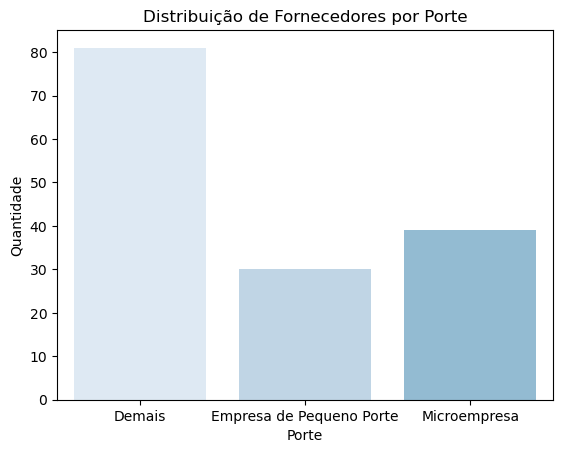

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando a paleta de cores para tons de azul
sns.set_palette("Blues")

# Criando o gráfico de barras
sns.countplot(data=df_fornecedores, x='Porte')
plt.title('Distribuição de Fornecedores por Porte')
plt.xlabel('Porte')
plt.ylabel('Quantidade')
plt.show()

#### 5.5. Flag de Empresas Punidas (CNEP e CEIS)

Número de Empresas Punidas (CNEP): 0
Número de Empresas Punidas (CEIS): 24


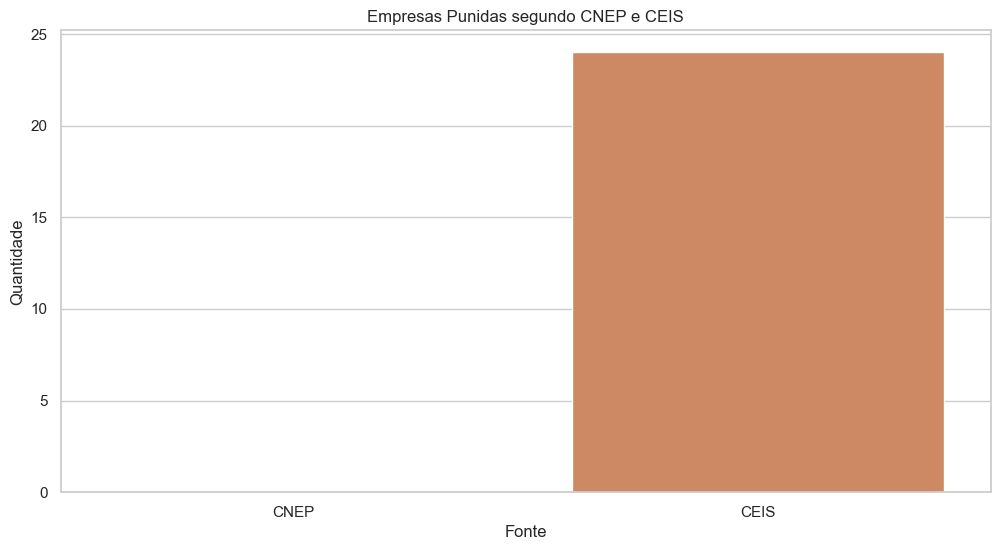

In [21]:
# Empresas Punidas
punidas_cnep = df_fornecedores['Flag_CNEP'].sum()
punidas_ceis = df_fornecedores['Flag_CEIS'].sum()

print(f"Número de Empresas Punidas (CNEP): {punidas_cnep}")
print(f"Número de Empresas Punidas (CEIS): {punidas_ceis}")

# Gráfico de Barras
punicoes = pd.DataFrame({
    'Fonte': ['CNEP', 'CEIS'],
    'Quantidade': [punidas_cnep, punidas_ceis]
})

sns.barplot(x='Fonte', y='Quantidade', data=punicoes)
plt.title('Empresas Punidas segundo CNEP e CEIS')
plt.show()


## FIM DA Exploração de dados com as bases ainda não tratadas